# Explore dataset

✅ Created 'price' column from 'log_price'


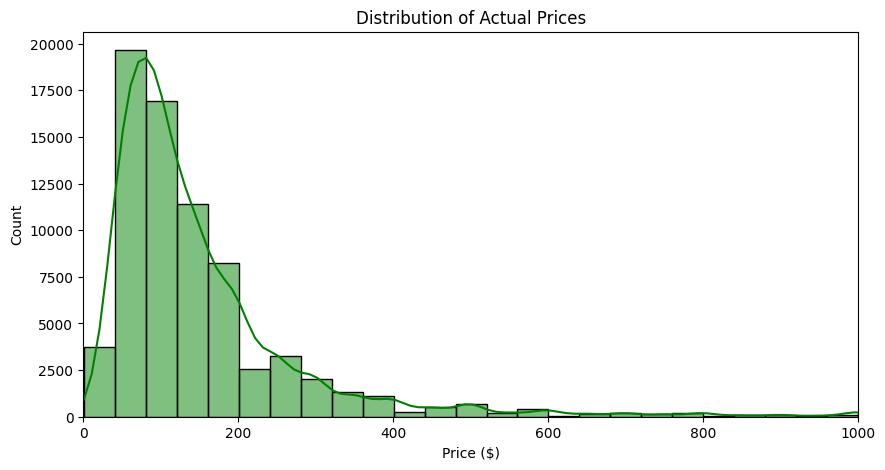

/tmp/ipython-input-4098623620.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='price', data=df, palette='viridis')


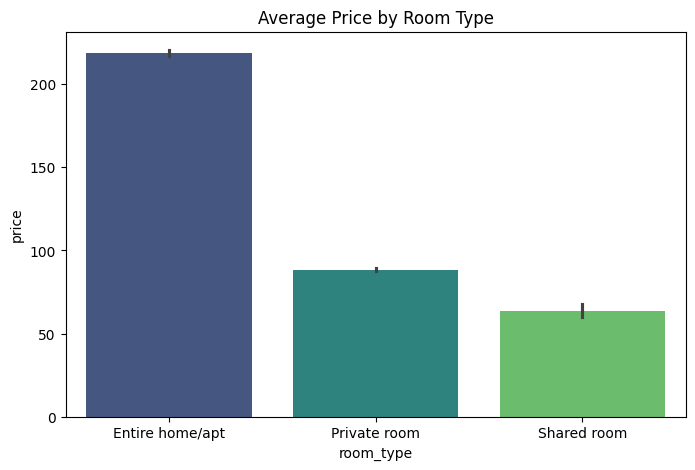

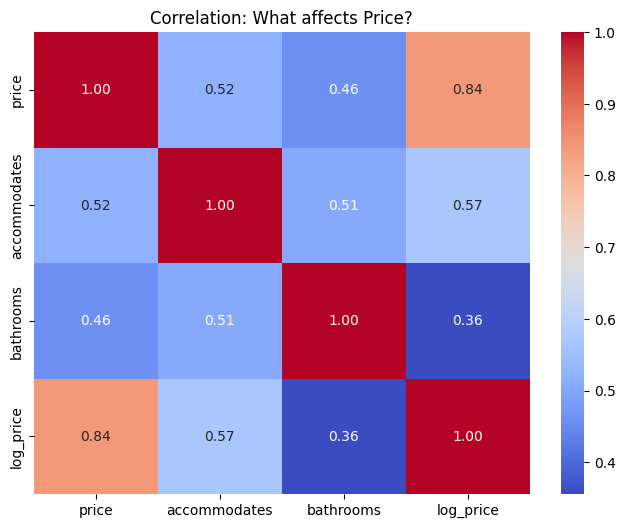

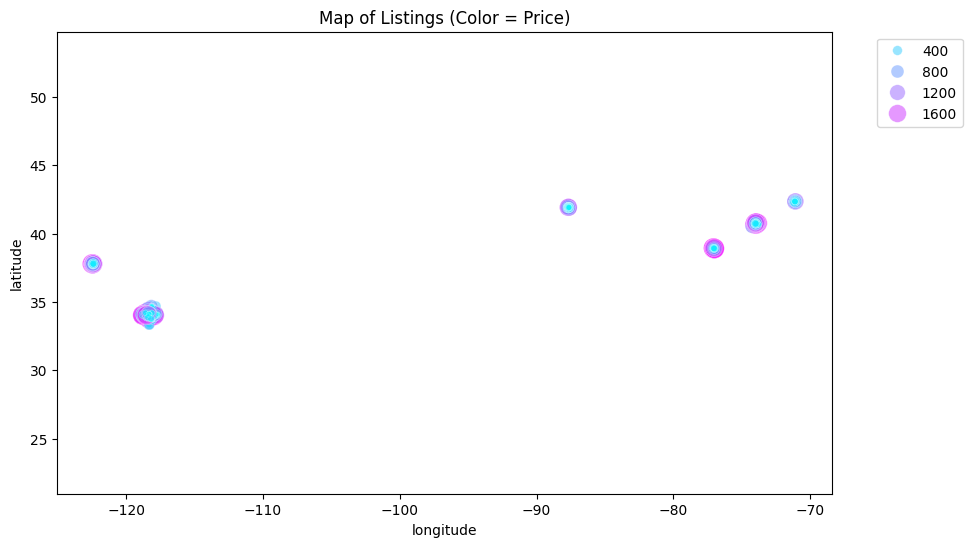


--- Top 5 Most Expensive Cities (Average Price) ---
city
SF        227.372552
DC        217.933368
Boston    165.631488
LA        155.388233
NYC       143.024576
Name: price, dtype: float64

--- Missing Values (Critical for Cleaning) ---
price             0
bathrooms       200
accommodates      0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATA
# Replace with your actual file path
filename = '/content/Airbnb_Data.csv'
df = pd.read_csv(filename)

# 2. FIX THE MISSING 'PRICE' COLUMN
# Your data has 'log_price', so we reverse it to get the actual 'price' for readable graphs
if 'price' not in df.columns and 'log_price' in df.columns:
    df['price'] = np.exp(df['log_price'])
    print(" Created 'price' column from 'log_price'")

# ==========================================
# 3. ESSENTIAL VISUALIZATIONS ONLY
# ==========================================

# A. Price Distribution (How expensive are the listings?)
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title("Distribution of Actual Prices")
plt.xlabel("Price ($)")
plt.xlim(0, 1000) # Limiting to $1000 to ignore extreme luxury outliers for better view
plt.show()

# B. Price vs. Room Type (Which rooms are most expensive?)
plt.figure(figsize=(8, 5))
sns.barplot(x='room_type', y='price', data=df, palette='viridis')
plt.title("Average Price by Room Type")
plt.show()

# C. Important Correlations (What drives the price?)
# We select only the most relevant numerical features
important_cols = ['price', 'accommodates', 'bathrooms', 'log_price']
# Filter only columns that actually exist in your dataframe
existing_cols = [c for c in important_cols if c in df.columns]

plt.figure(figsize=(8, 6))
sns.heatmap(df[existing_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: What affects Price?")
plt.show()

# D. Geospatial Map (Only if location data exists)
# This was where your error happened. We fixed it by ensuring 'price' now exists.
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='longitude', y='latitude',
        hue='price', size='price',
        sizes=(10, 200), palette='cool', alpha=0.5, data=df
    )
    plt.title("Map of Listings (Color = Price)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2) # Moves legend outside to keep map clean
    plt.axis('equal')
    plt.show()

# ==========================================
# 4. CLEAN DATA SUMMARY
# ==========================================
print("\n--- Top 5 Most Expensive Cities (Average Price) ---")
if 'city' in df.columns:
    print(df.groupby('city')['price'].mean().sort_values(ascending=False).head())

print("\n--- Missing Values (Critical for Cleaning) ---")
print(df[['price', 'bathrooms', 'accommodates']].isnull().sum())

✅ Data Loaded Successfully
   -> Converted 'log_price' to 'Price' ($)

--- 1. Missing Values Check ---


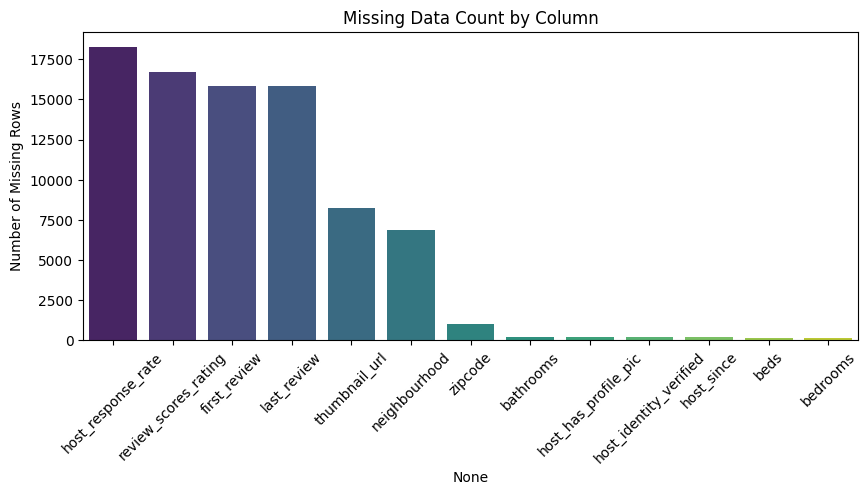


--- 2. Price Distribution ---


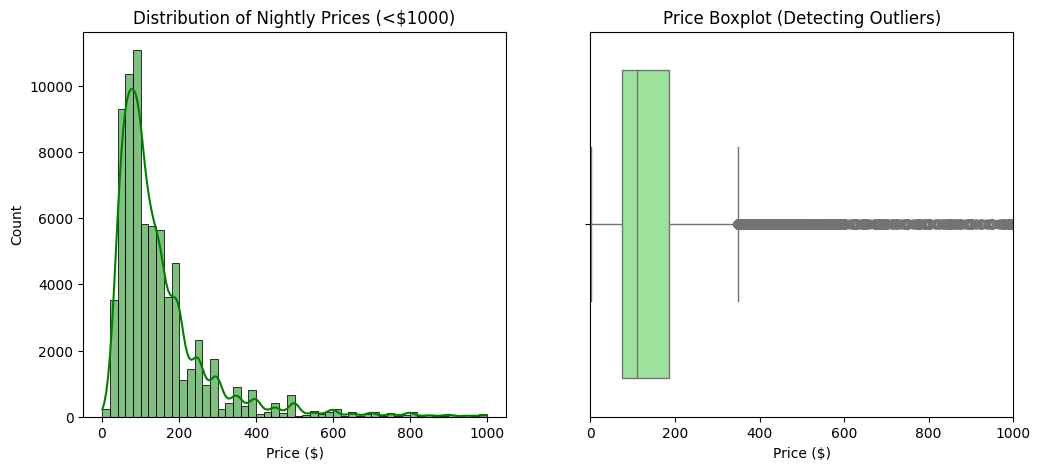

Average Price: $160.37
Median Price:  $111.00
Most Expensive: $1999.00

--- 3. What Features Drive Price? ---


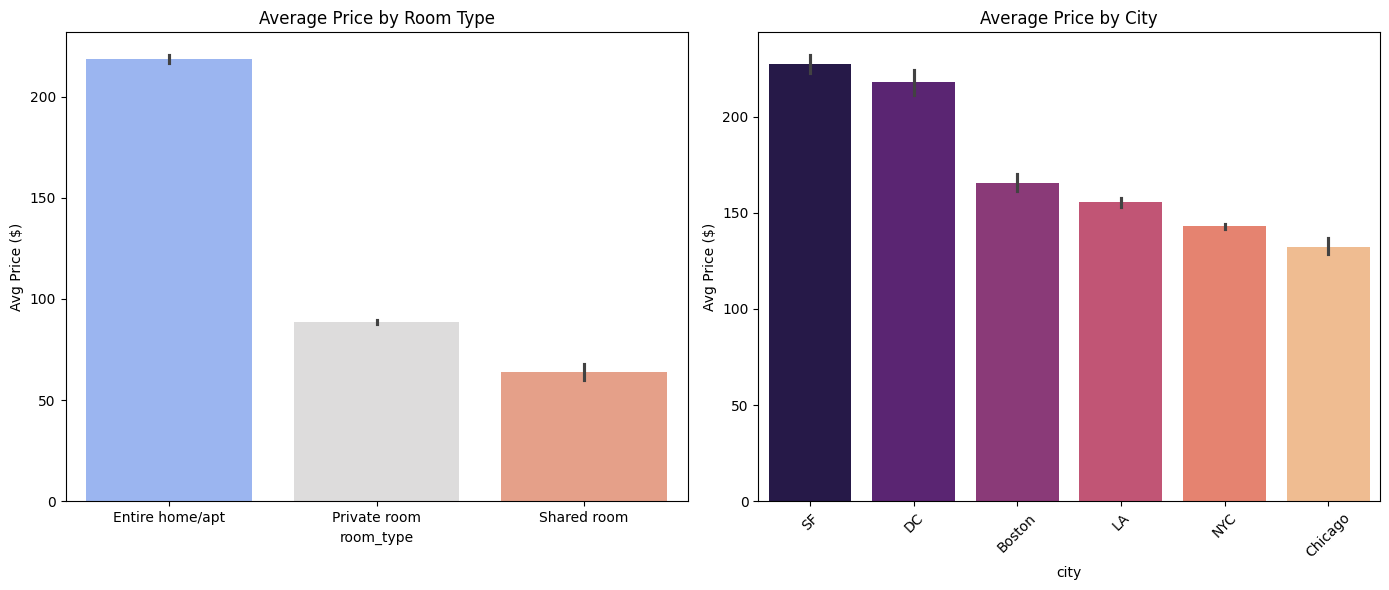


--- 4. Correlation Heatmap ---


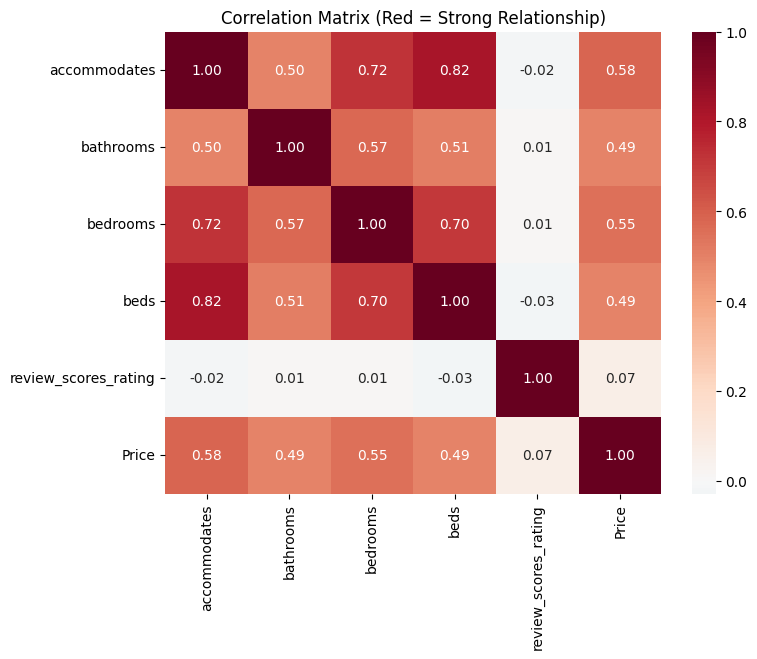


--- 5. Map of Listings ---


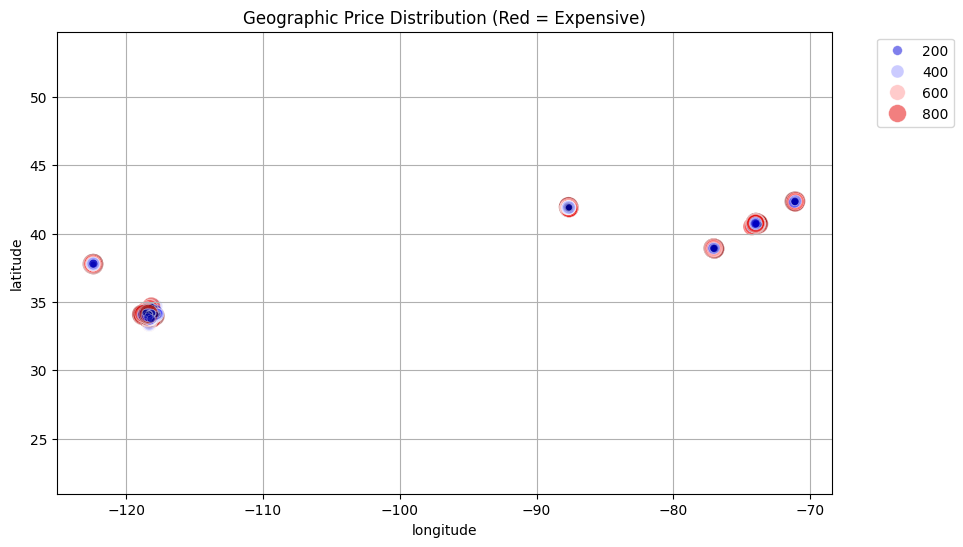

In [ ]:
# ==========================================
# ADVANCED EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATA
file_path = '/content/Airbnb_Data.csv' # Ensure this matches your uploaded file name

try:
    df = pd.read_csv(file_path)
    print(" Data Loaded Successfully")

    # CONVERT LOG PRICE TO REAL PRICE
    # The dataset uses 'log_price', which is hard to read ($4.5 vs $5.0).
    # We convert it back to real dollars ($90 vs $148) for better graphs.
    if 'log_price' in df.columns and 'Price' not in df.columns:
        df['Price'] = np.exp(df['log_price'])
        print("   -> Converted 'log_price' to 'Price' ($)")

except FileNotFoundError:
    print(f" Error: File not found at {file_path}")

# ==========================================
# 2. MISSING DATA ANALYSIS
# ==========================================
print("\n--- 1. Missing Values Check ---")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=missing.index, y=missing.values, palette='viridis')
    plt.title("Missing Data Count by Column")
    plt.xticks(rotation=45)
    plt.ylabel("Number of Missing Rows")
    plt.show()
else:
    print(" No missing data found!")

# ==========================================
# 3. PRICE ANALYSIS ( The Target )
# ==========================================
print("\n--- 2. Price Distribution ---")
# We filter out extreme luxury rentals (>$1000) just for the graph so it's readable
subset = df[df['Price'] < 1000]

plt.figure(figsize=(12, 5))

# Plot 1: Histogram
plt.subplot(1, 2, 1)
sns.histplot(subset['Price'], bins=50, kde=True, color='green')
plt.title("Distribution of Nightly Prices (<$1000)")
plt.xlabel("Price ($)")

# Plot 2: Boxplot (To see outliers)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'], color='lightgreen')
plt.title("Price Boxplot (Detecting Outliers)")
plt.xlabel("Price ($)")
plt.xlim(0, 1000)
plt.show()

print(f"Average Price: ${df['Price'].mean():.2f}")
print(f"Median Price:  ${df['Price'].median():.2f}")
print(f"Most Expensive: ${df['Price'].max():.2f}")

# ==========================================
# 4. CATEGORICAL ANALYSIS (Room Type, City)
# ==========================================
print("\n--- 3. What Features Drive Price? ---")

plt.figure(figsize=(14, 6))

# Graph: Price vs Room Type
plt.subplot(1, 2, 1)
sns.barplot(x='room_type', y='Price', data=df, palette='coolwarm')
plt.title("Average Price by Room Type")
plt.ylabel("Avg Price ($)")

# Graph: Price vs City (if 'city' exists)
if 'city' in df.columns:
    plt.subplot(1, 2, 2)
    order = df.groupby('city')['Price'].mean().sort_values(ascending=False).index
    sns.barplot(x='city', y='Price', data=df, order=order, palette='magma')
    plt.title("Average Price by City")
    plt.xticks(rotation=45)
    plt.ylabel("Avg Price ($)")

plt.tight_layout()
plt.show()

# ==========================================
# 5. NUMERICAL CORRELATION (Heatmap)
# ==========================================
print("\n--- 4. Correlation Heatmap ---")
# Select only number columns
cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'Price']
# Drop missing to avoid errors
corr_data = df[cols].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title("Correlation Matrix (Red = Strong Relationship)")
plt.show()

# ==========================================
# 6. GEOSPATIAL MAP (Latitude/Longitude)
# ==========================================
print("\n--- 5. Map of Listings ---")
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(10, 6))

    # We plot a scatter map
    sns.scatterplot(
        x='longitude', y='latitude',
        hue='Price', size='Price',
        sizes=(10, 200), palette='seismic',
        data=subset, alpha=0.5
    )
    plt.title("Geographic Price Distribution (Red = Expensive)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2) # Move legend outside
    plt.grid(True)
    plt.axis('equal') # Keep map proportions correct
    plt.show()
else:
    print("Skipping map: 'latitude' or 'longitude' columns missing.")

✅ Loaded: (74111, 29)


id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                                                                                                                                                                                                                                                                                                 amenities  \
0                                                                                                                                                                 {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}   
1                                                                                               {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}   
2  {TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Breakfast,"Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}   
3                                                                                                       {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Indoor fireplace","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials}   
4                                                                                                                                           {TV,Internet,"Wireless Internet","Air conditioning",Kitchen,"Elevator in building",Heating,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo}   

   accommodates  bathrooms  bed_type cancellation_policy  cleaning_fee  ...  \
0             3        1.0  Real Bed              strict          True  ...   
1             7        1.0  Real Bed              strict          True  ...   
2             5        1.0  Real Bed            moderate          True  ...   
3             4        1.0  Real Bed            flexible          True  ...   
4             2        1.0  Real Bed            moderate          True  ...   

    latitude   longitude                                      name  \
0  40.696524  -73.991617            Beautiful brownstone 1-bedroom   
1  40.766115  -73.989040  Superb 3BR Apt Located Near Times Square   
2  40.808110  -73.943756                          The Garden Oasis   
3  37.772004 -122.431619        Beautiful Flat in the Heart of SF!   
4  38.925627  -77.034596                Great studio in midtown DC   

      neighbourhood number_of_reviews review_scores_rating  \
0  Brooklyn Heights                 2                100.0   
1    Hell's Kitchen                 6                 93.0   
2            Harlem                10                 92.0   
3      Lower Haight                 0                  NaN   
4  Columbia Heights                 4                 40.0   

                                                                                   thumbnail_url  \
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small   
1  https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small   
2  https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small   
3  https://a0.muscache.com/im/pictures/72208dad-9c86-41ea-a735-43d933111063.jpg?aki_poli


--- Columns & Types ---


col    dtype
id                                          id    int64
log_price                            log_price  float64
property_type                    property_type   object
room_type                            room_type   object
amenities                            amenities   object
accommodates                      accommodates    int64
bathrooms                            bathrooms  float64
bed_type                              bed_type   object
cancellation_policy        cancellation_policy   object
cleaning_fee                      cleaning_fee     bool
city                                      city   object
description                        description   object
first_review                      first_review   object
host_has_profile_pic      host_has_profile_pic   object
host_identity_verified  host_identity_verified   object
host_response_rate          host_response_rate   object
host_since                          host_since   object
instant_bookable              instant_bookable   object
last_review                        last_review   object
latitude                              latitude  float64
longitude                            longitude  float64
name                                      name   object
neighbourhood                    neighbourhood   object
number_of_reviews            number_of_reviews    int64
review_scores_rating      review_scores_rating  float64
thumbnail_url                    thumbnail_url   object
zipcode                                zipcode   object
bedrooms                              bedrooms  float64
beds                                      beds  float64


--- Missing Values (count + %) ---


missing_count  missing_%
host_response_rate              18299      24.69
review_scores_rating            16722      22.56
first_review                    15864      21.41
last_review                     15827      21.36
thumbnail_url                    8216      11.09
neighbourhood                    6872       9.27
zipcode                           966       1.30
bathrooms                         200       0.27
host_identity_verified            188       0.25
host_has_profile_pic              188       0.25
host_since                        188       0.25
beds                              131       0.18
bedrooms                           91       0.12
description                         0       0.00
city                                0       0.00
cleaning_fee                        0       0.00
cancellation_policy                 0       0.00
accommodates                        0       0.00
bed_type                            0       0.00
room_type                           0       0.00
amenities                           0       0.00
id                                  0       0.00
log_price                           0       0.00
property_type                       0       0.00
instant_bookable                    0       0.00

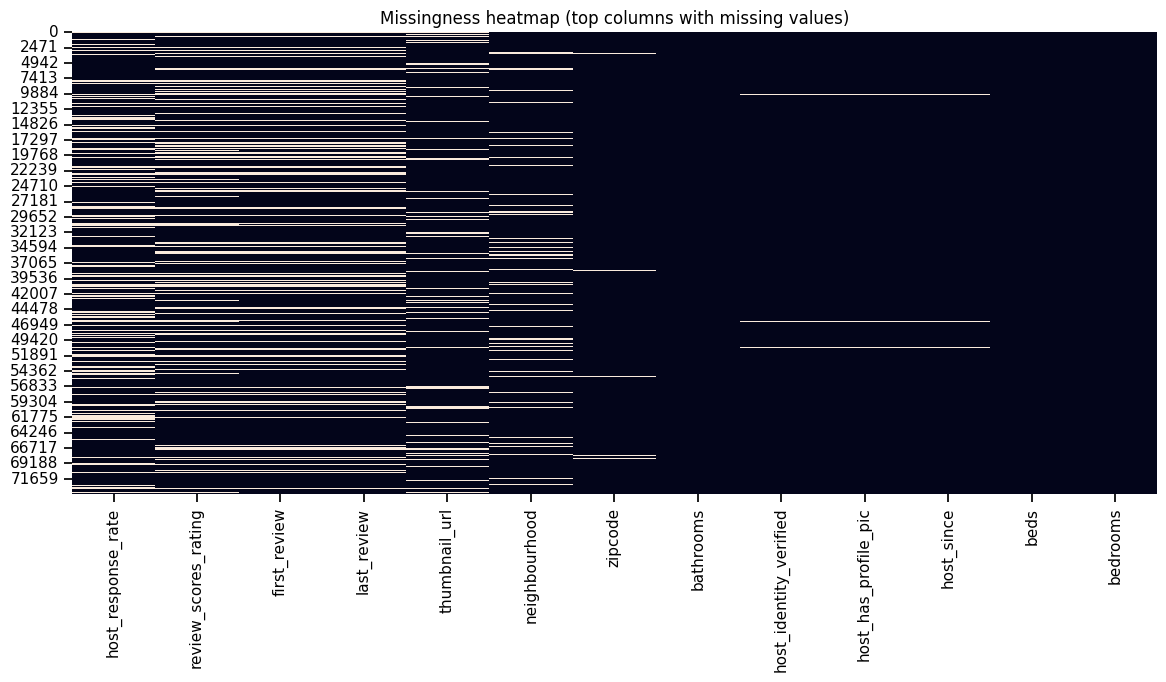


--- Price Summary ---


count        mean         std  min    1%    5%   25%    50%    75%  \
Price  74111.0  160.370849  168.580415  1.0  29.0  40.0  75.0  111.0  185.0   

         95%    99%     max  
Price  425.0  986.8  1999.0

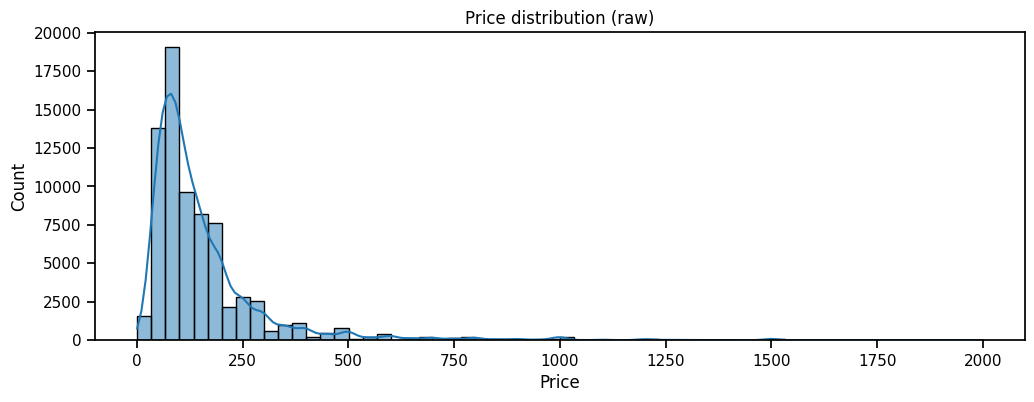

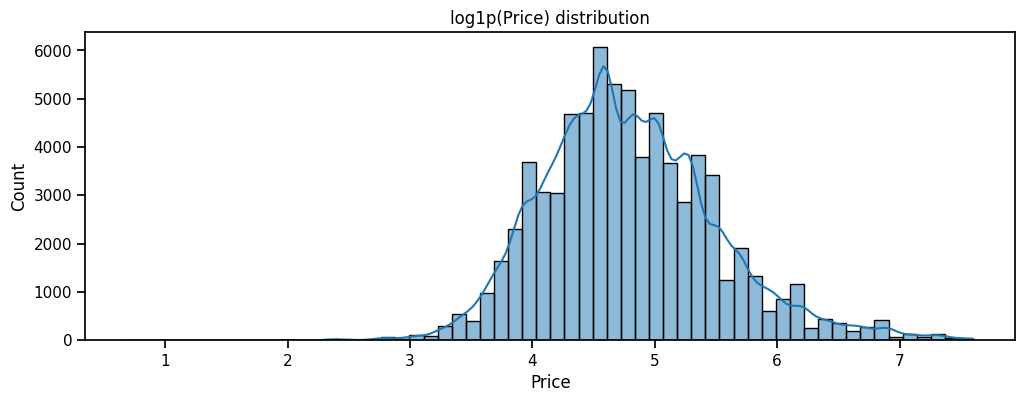

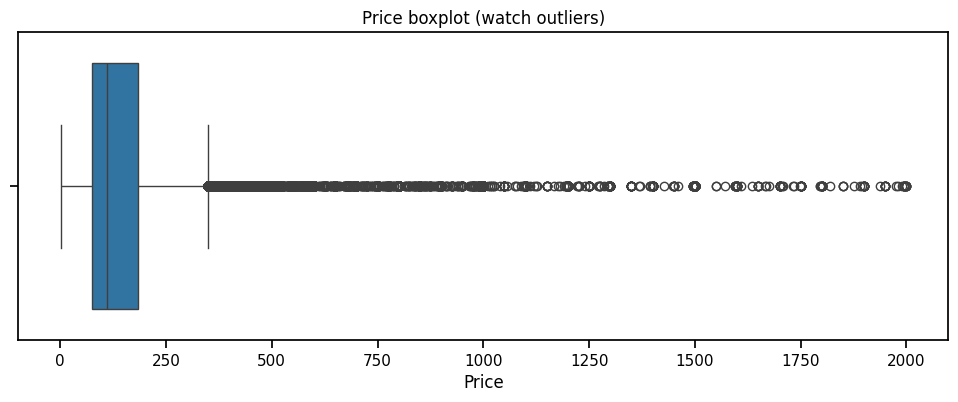

city  count
0      NYC  32349
1       LA  22453
2       SF   6434
3       DC   5688
4  Chicago   3719
5   Boston   3468

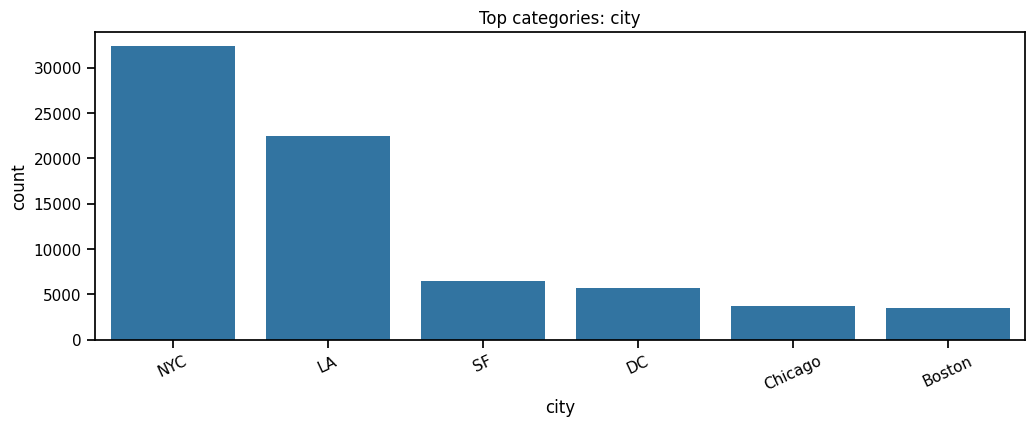

room_type  count
0  Entire home/apt  41310
1     Private room  30638
2      Shared room   2163

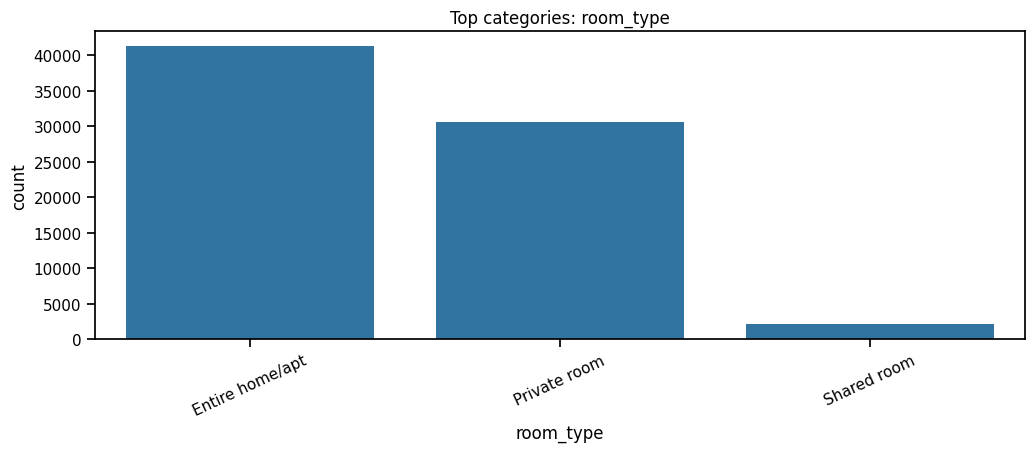

property_type  count
0         Apartment  49003
1             House  16511
2       Condominium   2658
3         Townhouse   1692
4              Loft   1244
5             Other    607
6        Guesthouse    498
7   Bed & Breakfast    462
8          Bungalow    366
9             Villa    179
10             Dorm    142
11      Guest suite    123
12        Camper/RV     94
13        Timeshare     77
14            Cabin     72

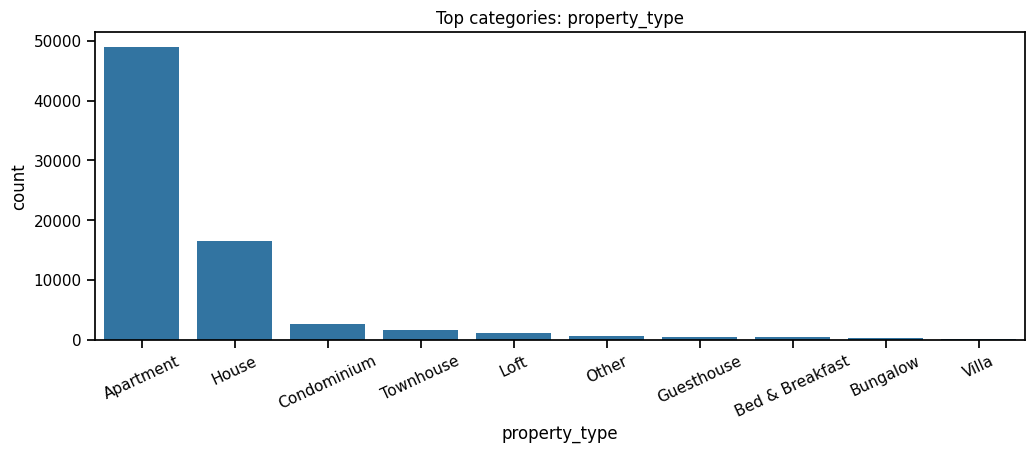

bed_type  count
0       Real Bed  72028
1          Futon    753
2  Pull-out Sofa    585
3         Airbed    477
4          Couch    268

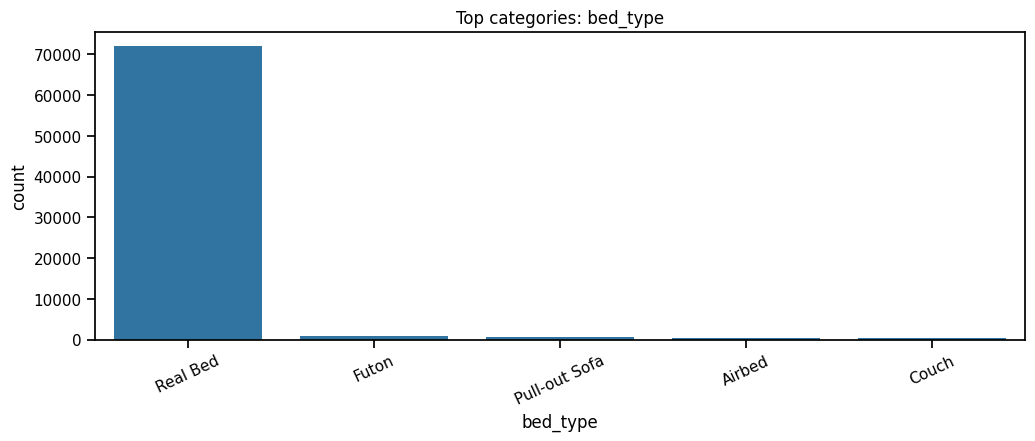

cancellation_policy  count
0              strict  32374
1            flexible  22545
2            moderate  19063
3     super_strict_30    112
4     super_strict_60     17

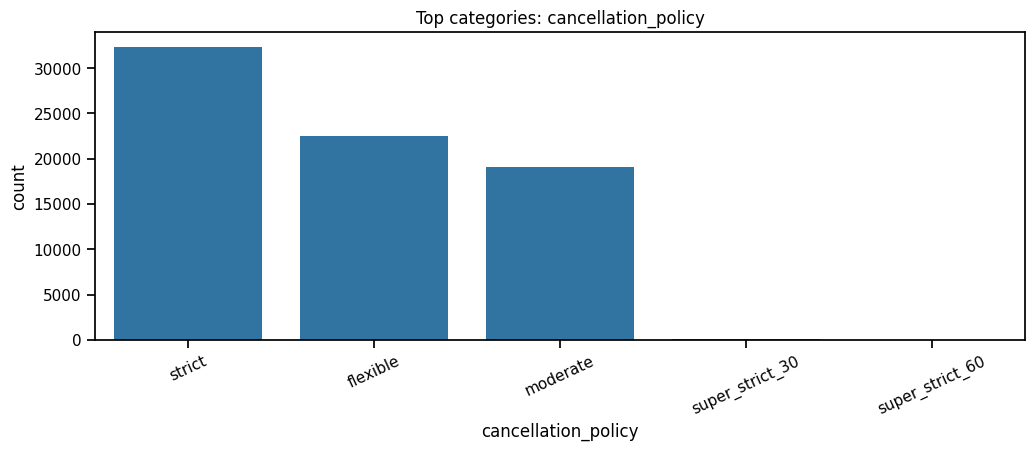

cleaning_fee  count
0         True  54403
1        False  19708

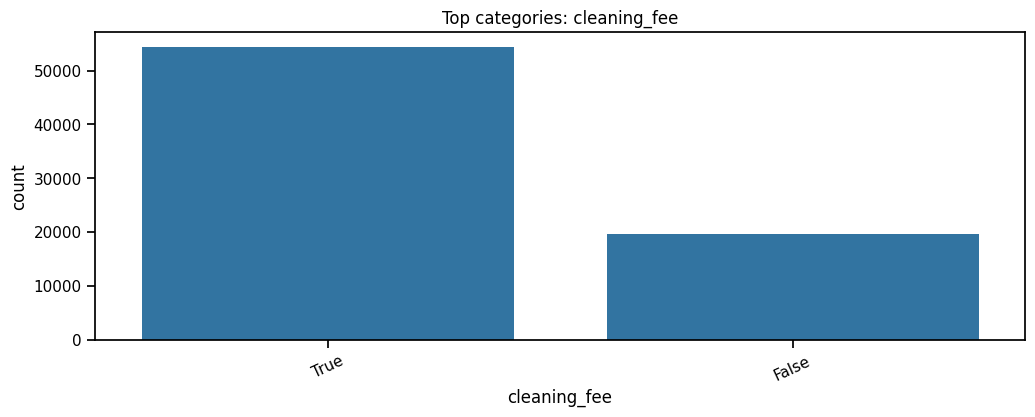

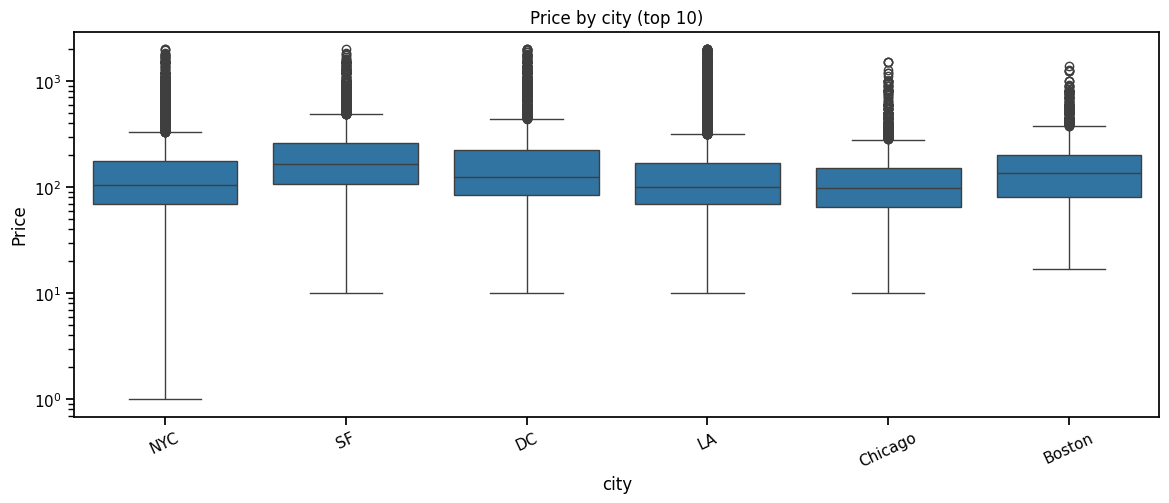

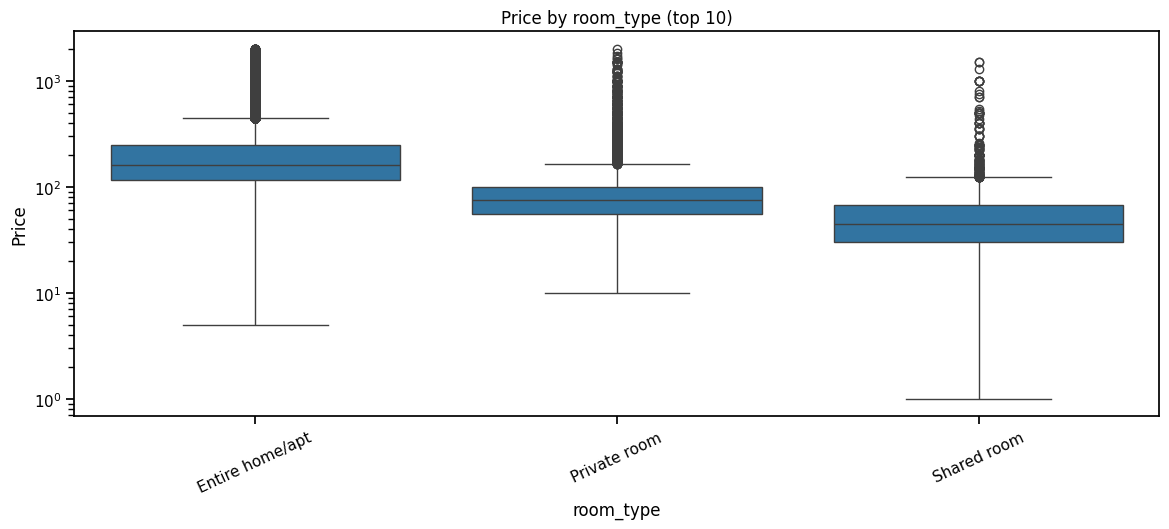

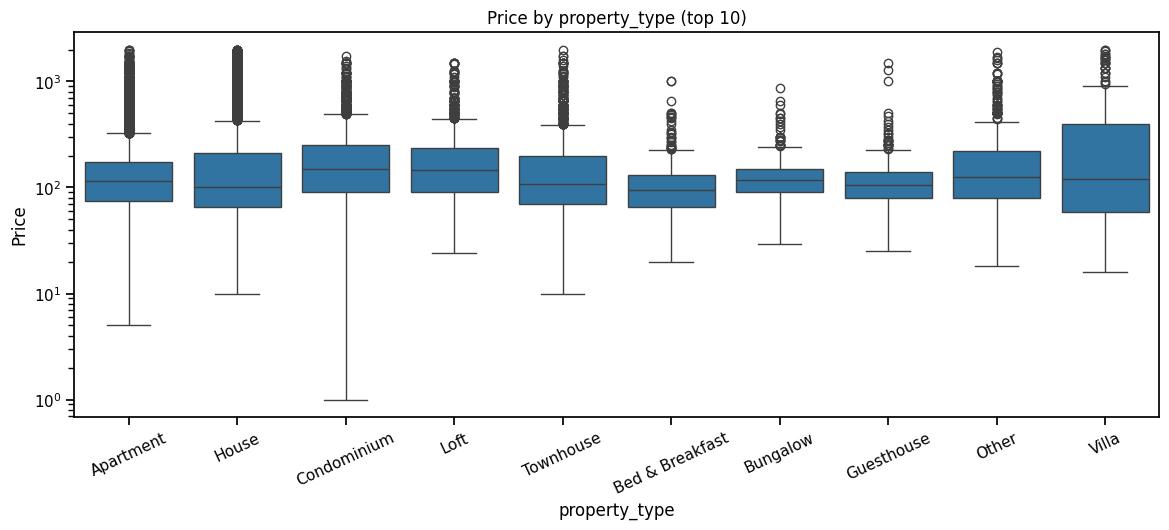


--- Numeric columns ---
['log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'Price']


count        mean         std         min         25%  \
log_price             74111.0    4.782069    0.717394    0.000000    4.317488   
accommodates          74111.0    3.155146    2.153589    1.000000    2.000000   
bathrooms             73911.0    1.235263    0.582044    0.000000    1.000000   
latitude              74111.0   38.445958    3.080167   33.338905   34.127908   
longitude             74111.0  -92.397525   21.705322 -122.511500 -118.342374   
number_of_reviews     74111.0   20.900568   37.828641    0.000000    1.000000   
review_scores_rating  57389.0   94.067365    7.836556   20.000000   92.000000   
bedrooms              74020.0    1.265793    0.852143    0.000000    1.000000   
beds                  73980.0    1.710868    1.254142    0.000000    1.000000   
Price                 74111.0  160.370849  168.580415    1.000000   75.000000   

                             50%         75%          max  
log_price               4.709530    5.220356     7.600402  
accommodates            2.000000    4.000000    16.000000  
bathrooms               1.000000    1.000000     8.000000  
latitude               40.662138   40.746096    42.390437  
longitude             -76.996965  -73.954660   -70.985047  
number_of_reviews       6.000000   23.000000   605.000000  
review_scores_rating   96.000000  100.000000   100.000000  
bedrooms                1.000000    1.000000    10.000000  
beds                    1.000000    2.000000    18.000000  
Price                 111.000000  185.000000  1999.000000

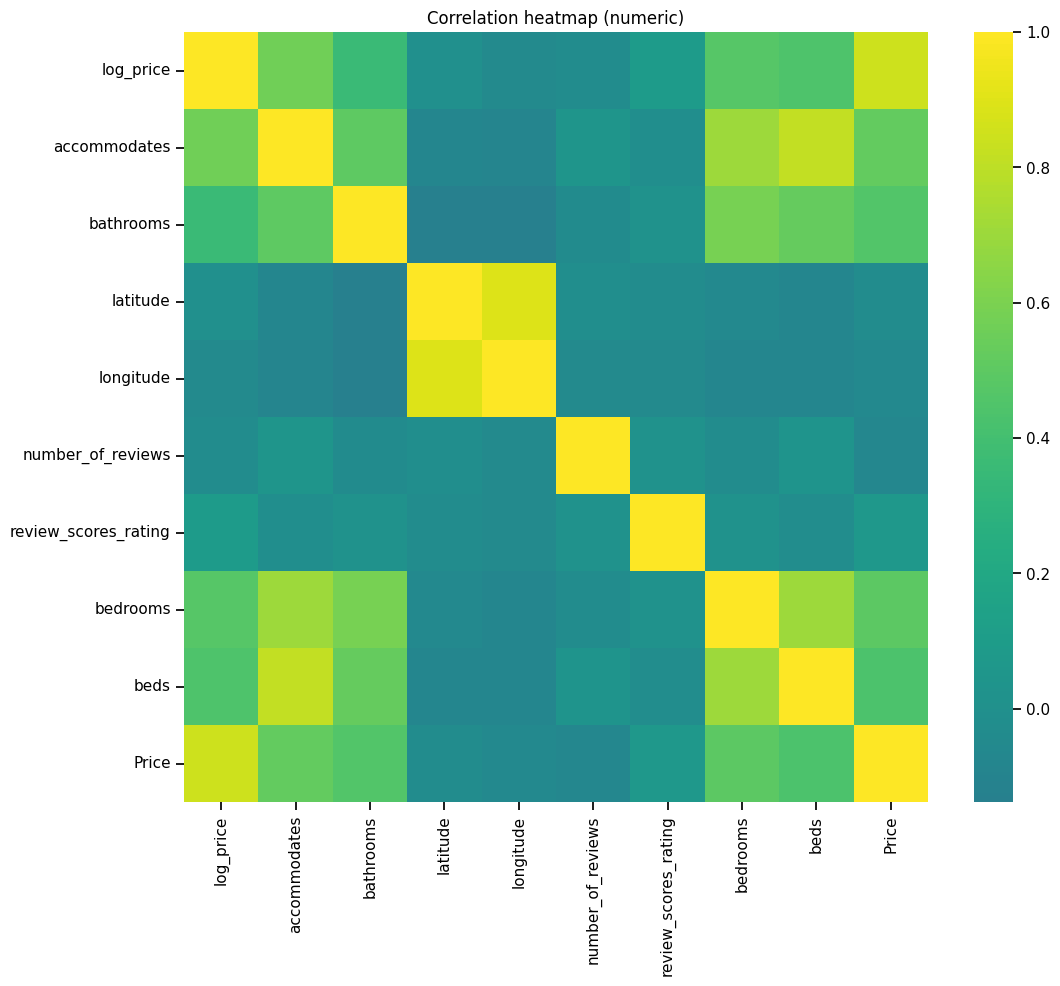

corr_with_Price
Price                        1.000000
log_price                    0.840001
accommodates                 0.519326
bedrooms                     0.494437
bathrooms                    0.459350
beds                         0.433162
review_scores_rating         0.067100
latitude                    -0.031344
longitude                   -0.057601
number_of_reviews           -0.070956

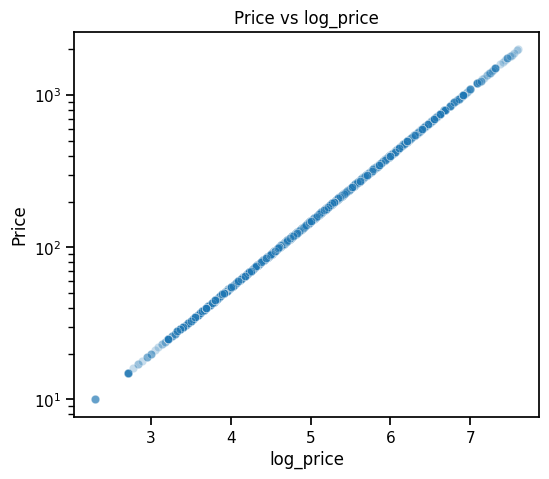

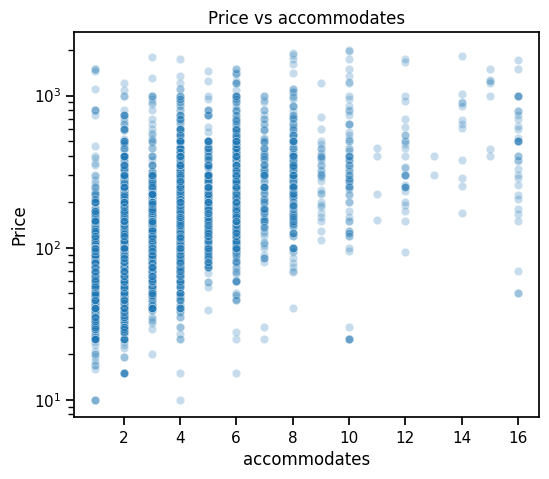

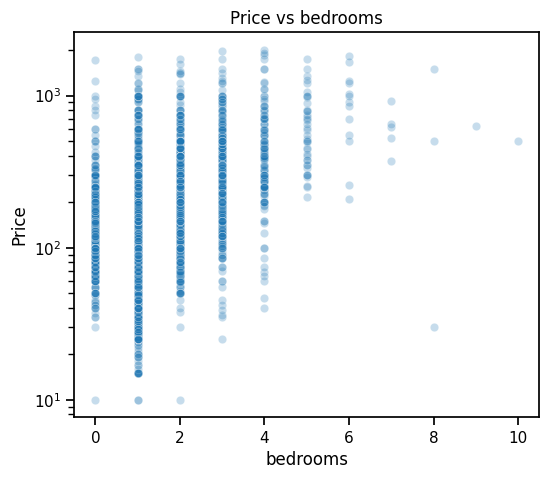

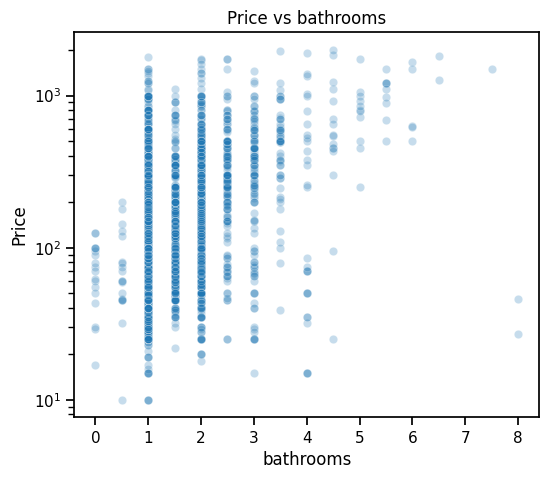

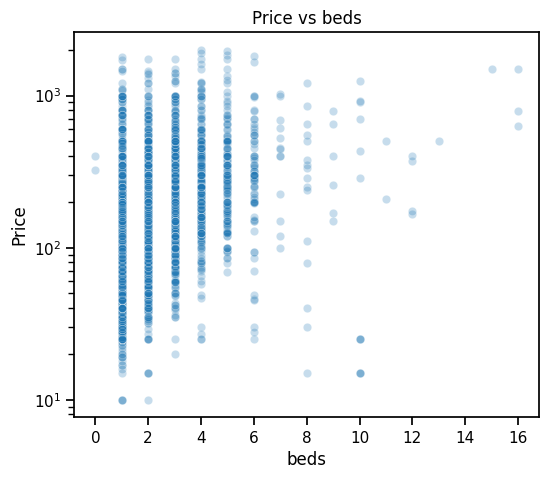

count       mean       std  min   25%   50%   75%   max
amenities_count  74111.0  17.602407  6.936947  1.0  13.0  17.0  22.0  86.0

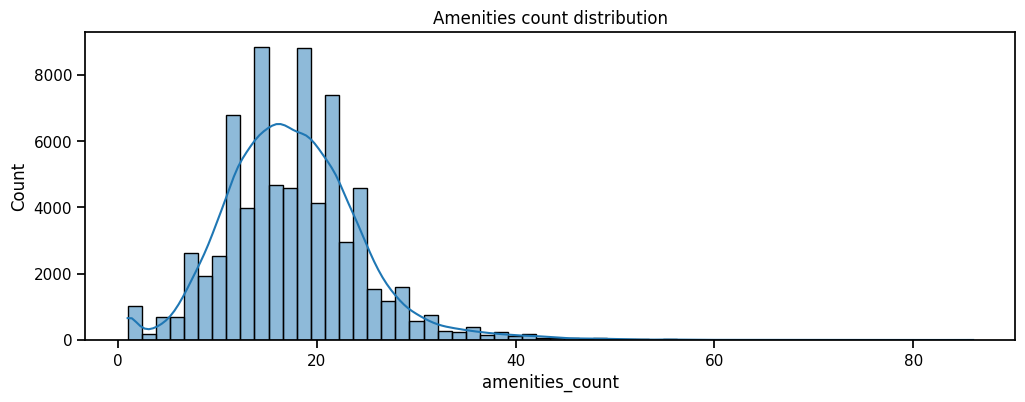

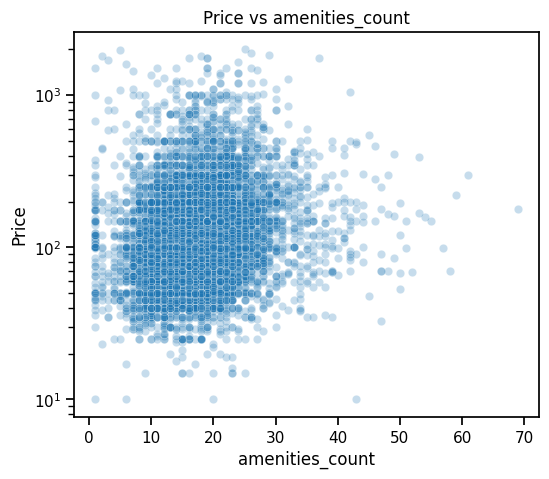


✅ EDA Finished. Next: run CODE #2 for full training + LLM.


In [ ]:
# ============================================================
# CODE #1: DEEP EDA for Airbnb Price Dataset (Kaggle)
# ============================================================
!pip -q install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (12, 5)

# -----------------------------
# 1) Load data
# -----------------------------
FILE_PATH = "/content/Airbnb_Data.csv"   # <-- upload your CSV to Colab or change path

df = pd.read_csv(FILE_PATH)
print(" Loaded:", df.shape)
display(df.head())

# -----------------------------
# 2) Basic info tables
# -----------------------------
print("\n--- Columns & Types ---")
display(pd.DataFrame({"col": df.columns, "dtype": df.dtypes.astype(str)}))

print("\n--- Missing Values (count + %) ---")
miss_cnt = df.isna().sum().sort_values(ascending=False)
miss_pct = (miss_cnt / len(df) * 100).round(2)
miss_table = pd.DataFrame({"missing_count": miss_cnt, "missing_%": miss_pct})
display(miss_table.head(25))

# Missingness heatmap (top missing cols)
top_missing_cols = miss_table[miss_table["missing_count"] > 0].head(25).index.tolist()
if len(top_missing_cols) > 0:
    plt.figure(figsize=(14, 6))
    sns.heatmap(df[top_missing_cols].isna(), cbar=False)
    plt.title("Missingness heatmap (top columns with missing values)")
    plt.show()

# -----------------------------
# 3) Target creation: Price from log_price if present
# -----------------------------
if "log_price" in df.columns:
    df["Price"] = np.exp(df["log_price"])
elif "price" in df.columns:
    df["Price"] = df["price"]
else:
    raise ValueError("Could not find 'log_price' or 'price' column!")

print("\n--- Price Summary ---")
display(df["Price"].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).to_frame().T)

# Price distribution
plt.figure(figsize=(12,4))
sns.histplot(df["Price"], bins=60, kde=True)
plt.title("Price distribution (raw)")
plt.show()

# Log view for skew
plt.figure(figsize=(12,4))
sns.histplot(np.log1p(df["Price"]), bins=60, kde=True)
plt.title("log1p(Price) distribution")
plt.show()

# -----------------------------
# 4) Outliers / cleaning suggestion (visual only)
# -----------------------------
plt.figure(figsize=(12,4))
sns.boxplot(x=df["Price"])
plt.title("Price boxplot (watch outliers)")
plt.show()

# -----------------------------
# 5) Categorical exploration
# -----------------------------
cat_candidates = [
    "city","room_type","property_type","bed_type","cancellation_policy",
    "cleaning_fee","instant_bookable","host_identity_verified","host_has_profile_pic"
]
cat_cols = [c for c in cat_candidates if c in df.columns]

for c in cat_cols[:6]:
    vc = df[c].value_counts(dropna=False).head(15)
    display(pd.DataFrame({c: vc.index.astype(str), "count": vc.values}))
    plt.figure(figsize=(12,4))
    sns.countplot(data=df, x=c, order=df[c].value_counts().head(10).index)
    plt.title(f"Top categories: {c}")
    plt.xticks(rotation=25)
    plt.show()

# Price by some categories
for c in [x for x in ["city","room_type","property_type"] if x in df.columns]:
    plt.figure(figsize=(14,5))
    top = df[c].value_counts().head(10).index
    sns.boxplot(data=df[df[c].isin(top)], x=c, y="Price")
    plt.title(f"Price by {c} (top 10)")
    plt.xticks(rotation=25)
    plt.yscale("log")
    plt.show()

# -----------------------------
# 6) Numeric exploration & correlation
# -----------------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# remove id-like columns if present
num_cols = [c for c in num_cols if c.lower() not in ["id"]]

print("\n--- Numeric columns ---")
print(num_cols)

display(df[num_cols].describe().T)

# Correlation heatmap (numeric only)
corr = df[num_cols].corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="viridis", center=0)
plt.title("Correlation heatmap (numeric)")
plt.show()

# Relationship with Price (numeric)
if "Price" in df.columns:
    rel = corr["Price"].sort_values(ascending=False)
    display(rel.to_frame("corr_with_Price").head(20))

    top_num = [c for c in rel.index[1:6] if c in df.columns]
    for c in top_num:
        plt.figure(figsize=(6,5))
        sns.scatterplot(data=df.sample(min(8000, len(df)), random_state=42), x=c, y="Price", alpha=0.25)
        plt.title(f"Price vs {c}")
        plt.yscale("log")
        plt.show()

# -----------------------------
# 7) Amenities quick feature engineering preview
# -----------------------------
if "amenities" in df.columns:
    # count items inside amenities text
    amenities_str = df["amenities"].fillna("")
    df["amenities_count"] = amenities_str.apply(lambda s: s.count(",") + (1 if len(s.strip()) > 0 else 0))
    display(df["amenities_count"].describe().to_frame().T)

    plt.figure(figsize=(12,4))
    sns.histplot(df["amenities_count"], bins=60, kde=True)
    plt.title("Amenities count distribution")
    plt.show()

    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df.sample(min(8000, len(df)), random_state=42),
                    x="amenities_count", y="Price", alpha=0.25)
    plt.title("Price vs amenities_count")
    plt.yscale("log")
    plt.show()

print("\n✅ EDA Finished. Next: run CODE #2 for full training + LLM.")


# Phase 2 code

Using Device: cpu
✅ Data loaded successfully.
   -> Converting 'log_price' to 'Price'...
   -> Class Mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
✅ Data Split Created: Train (51877, 8), Test (11117, 8)

--- 🧠 Training Neural Network ---
Epoch 1/20
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5413 - loss: 0.9221 - val_accuracy: 0.6004 - val_loss: 0.8516
Epoch 2/20
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5889 - loss: 0.8577 - val_accuracy: 0.6029 - val_loss: 0.8425
Epoch 3/20
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5955 - loss: 0.8455 - val_accuracy: 0.6015 - val_loss: 0.8388
Epoch 4/20
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5967 - loss: 0.8421 - val_accuracy: 0.6018 - val_loss: 0.8378
Epoch 5/20
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5985 - loss: 0.8370 - val_accuracy: 0.6053 - val_loss: 0.8366
Epoch 6/20
1622/1622 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6017 - loss: 0.8

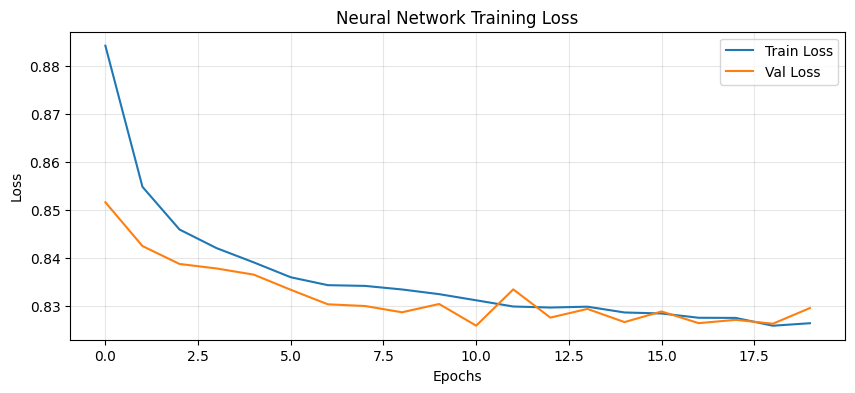

🏆 Neural Network Test Accuracy: 60.23%

--- 🤖 Loading Local LLM (Flan-T5-Base) ---

--- Testing LLM on Raw Data ---
Sample 1: True[Low] vs LLM[High] ❌
Sample 2: True[Medium] vs LLM[High] ❌
Sample 3: True[High] vs LLM[High] ✅
Sample 4: True[Medium] vs LLM[High] ❌
Sample 5: True[Medium] vs LLM[High] ❌
Sample 6: True[High] vs LLM[High] ✅
Sample 7: True[Medium] vs LLM[High] ❌
Sample 8: True[Low] vs LLM[High] ❌
Sample 9: True[High] vs LLM[High] ✅
Sample 10: True[Low] vs LLM[High] ❌

🎯 FINAL RESULTS SUMMARY
1. Neural Network Accuracy: 60.23%
2. LLM Few-Shot Accuracy:   30.00%
----------------------------------------
Conclusion: The Neural Network won. It is specialized for numerical patterns.


🚀 Device: cpu
✅ Data Loaded.
📊 Training Samples: 51410 | Test Samples: 11017

🧠 Training Regression Model...
Epoch 1/30
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 15704.0410 - mae: 79.7521 - val_loss: 9750.1738 - val_mae: 60.0109
Epoch 2/30
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 10078.0664 - mae: 63.1468 - val_loss: 9692.5293 - val_mae: 62.0743
Epoch 3/30
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 10084.7412 - mae: 63.1188 - val_loss: 9554.6299 - val_mae: 61.9183
Epoch 4/30
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9706.7998 - mae: 62.5314 - val_loss: 9608.3525 - val_mae: 63.0194
Epoch 5/30
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 9851.2412 - mae: 62.2387 - val_loss: 9497.7822 - val_mae: 59.4378
Epoch 6/30
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 9953.9287 - mae: 62.5129 - val_loss: 9458.3486 - val_mae: 61.7028
Epoch 7/30
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 9983.8770 - mae: 62.8608 - val_loss: 9414.5918 - val_m

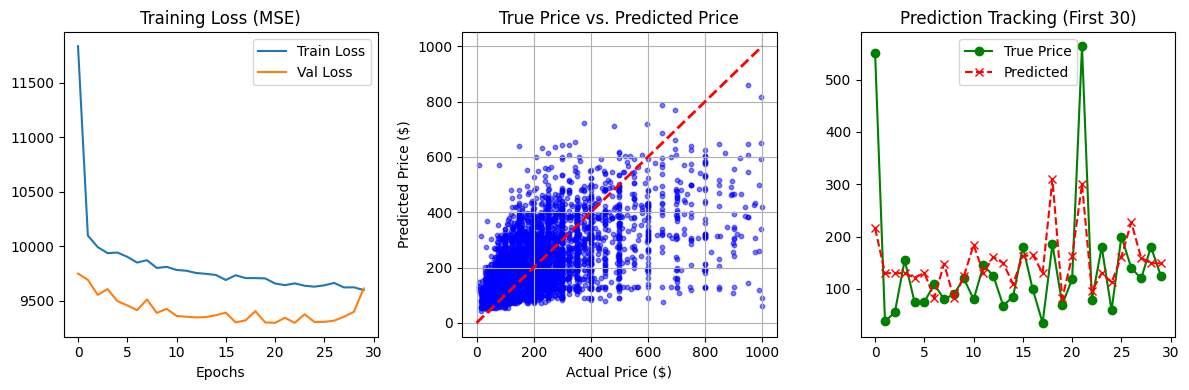

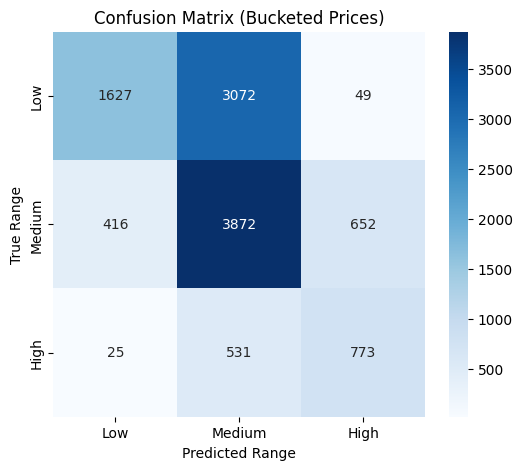


🤖 Loading LLM for Reasoning...


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]


--- 🔍 LLM Analysis on Test Cases ---

🏠 Case 1:
   Features:  Accommodates: 4 people, Bathrooms: 1.0, Bedrooms: 2.0, Rating: 98.0/100
   True Price: $550.00 | Predicted: $215.90
   🤖 LLM Reason: "The bedrooms are large and the bathrooms are small."

🏠 Case 2:
   Features:  Accommodates: 2 people, Bathrooms: 1.0, Bedrooms: 1.0, Rating: 96.0/100
   True Price: $38.00 | Predicted: $130.04
   🤖 LLM Reason: "The apartment has a rating of 96.0/100 and has a price of $130."

🏠 Case 3:
   Features:  Accommodates: 2 people, Bathrooms: 1.0, Bedrooms: 1.0, Rating: 96.0/100
   True Price: $55.00 | Predicted: $130.04
   🤖 LLM Reason: "The apartment has a rating of 96.0/100 and has a price range of $130."

🏠 Case 4:
   Features:  Accommodates: 2 people, Bathrooms: 1.0, Bedrooms: 1.0, Rating: 96.0/100
   True Price: $155.00 | Predicted: $130.04
   🤖 LLM Reason: "The apartment has a rating of 96.0 and has a bathroom."

🏠 Case 5:
   Features:  Accommodates: 2 people, Bathrooms: 1.0, Bedrooms: 1.0, Rat

In [ ]:
# ==========================================
# PART 0: SETUP
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, mean_absolute_error, r2_score
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device}")

# ==========================================
# PART 1: DATA PREPARATION (REGRESSION)
# ==========================================
file_path = '/content/Airbnb_Data.csv'
try:
    df = pd.read_csv(file_path)
    print(" Data Loaded.")

    # 1. Ensure we have the Target (Price)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price']) # Convert log back to dollars
    elif 'Price' not in df.columns:
        raise ValueError("Dataset missing 'log_price' or 'Price' column.")

    # 2. Select Features (Inputs)
    # We use numeric features that drive price
    features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    target = 'Price'

    df_clean = df[features + [target]].copy()

    # 3. Handle Missing Data
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

    # 4. Remove Extreme Outliers (Prices > $1000) for better training stability
    df_imputed = df_imputed[df_imputed['Price'] <= 1000]

    # 5. Define X and y
    X = df_imputed[features]
    y = df_imputed[target] # Continuous Target (Regression)

    # 6. Normalize Inputs
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 7. Split Data (70% Train, 15% Val, 15% Test)
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

    # Save raw test data for the LLM to read later
    X_test_raw = scaler.inverse_transform(X_test)

    print(f"📊 Training Samples: {X_train.shape[0]} | Test Samples: {X_test.shape[0]}")

except Exception as e:
    print(f" Error: {e}")
    # Create Dummy Data so code doesn't crash if file is missing
    X_train = np.random.rand(100, 5)
    y_train = np.random.randint(50, 500, 100)
    X_val = np.random.rand(20, 5)
    y_val = np.random.randint(50, 500, 20)
    X_test = np.random.rand(20, 5)
    y_test = np.random.randint(50, 500, 20)
    X_test_raw = X_test
    features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'rating']

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION MODEL)
# ==========================================
print("\n Training Regression Model...")

model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    # Hidden Layers
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    # OUTPUT LAYER: 1 Neuron, Linear Activation (for predicting exact number)
    tf.keras.layers.Dense(1, activation='linear')
])

# Loss = MSE (Squared Error), Metric = MAE (Dollar Error)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30, batch_size=32, verbose=1)

# ==========================================
# PART 3: VISUALIZATION & EVALUATION
# ==========================================
# Make Predictions
preds = model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"\n Model Performance:")
print(f"   -> Average Error (MAE): ${mae:.2f}")
print(f"   -> R2 Score (Fit Quality): {r2:.4f}")

# GRAPH 1: Loss Curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training Loss (MSE)")
plt.xlabel("Epochs")
plt.legend()

# GRAPH 2: Scatter Plot (True vs Predicted)
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.5, color='blue', s=10)
plt.plot([0, 1000], [0, 1000], 'r--', lw=2) # Ideal line
plt.title("True Price vs. Predicted Price")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)

# GRAPH 3: Tracking Plot (First 30 Samples)
plt.subplot(1, 3, 3)
plt.plot(range(30), y_test[:30], 'o-', label='True Price', color='green')
plt.plot(range(30), preds[:30], 'x--', label='Predicted', color='red')
plt.title("Prediction Tracking (First 30)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Special: "Confusion Matrix" for Regression ---
# We bucket prices into "Low" (<$100), "Medium" ($100-$250), "High" (>$250)
# just to show the confusion matrix visualization you asked for.
def bucket_price(p):
    if p < 100: return 'Low'
    elif p < 250: return 'Medium'
    else: return 'High'

y_test_labels = [bucket_price(p) for p in y_test]
preds_labels = [bucket_price(p) for p in preds]
labels = ['Low', 'Medium', 'High']

cm = confusion_matrix(y_test_labels, preds_labels, labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Bucketed Prices)")
plt.xlabel("Predicted Range")
plt.ylabel("True Range")
plt.show()

# ==========================================
# PART 4: LLM REASONING (EXPLAIN THE PRICE)
# ==========================================
print("\n Loading LLM for Reasoning...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def explain_price_with_llm(index):
    # Get Data
    row_features = X_test_raw[index]
    true_p = y_test.iloc[index]
    pred_p = preds[index]

    # Construct Prompt
    # We ask the LLM to act as a Real Estate Analyst
    feat_desc = (
        f"Accommodates: {row_features[0]:.0f} people, "
        f"Bathrooms: {row_features[1]:.1f}, "
        f"Bedrooms: {row_features[2]:.1f}, "
        f"Rating: {row_features[4]:.1f}/100"
    )

    prompt = (
        f"You are a real estate analyst. Analyze these Airbnb features:\n"
        f"{feat_desc}\n"
        f"The AI Model predicted a price of ${pred_p:.0f} (True Price: ${true_p:.0f}).\n"
        f"Give 1 short reason why this price is appropriate based on the accommodations and bathrooms."
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=40)
    reason = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return feat_desc, true_p, pred_p, reason

print("\n--- 🔍 LLM Analysis on Test Cases ---")
# Show 5 examples
for i in range(5):
    features, true_p, pred_p, reason = explain_price_with_llm(i)
    print(f"\n Case {i+1}:")
    print(f"   Features:  {features}")
    print(f"   True Price: ${true_p:.2f} | Predicted: ${pred_p:.2f}")
    print(f"    LLM Reason: \"{reason}\"")

🚀 Processing Device: cpu
✅ Data Loaded.
📊 Train Size: 51065 | Val Size: 10942 | Test Size: 10943

🧠 Building High-Performance Model...
🔥 Starting Training (Verbose=1)...
Epoch 1/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 69.9621 - mae: 69.9621 - val_loss: 57.5153 - val_mae: 57.5153
Epoch 2/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 57.1182 - mae: 57.1182 - val_loss: 56.1523 - val_mae: 56.1523
Epoch 3/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 56.4963 - mae: 56.4963 - val_loss: 56.3493 - val_mae: 56.3493
Epoch 4/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 56.2350 - mae: 56.2350 - val_loss: 56.1805 - val_mae: 56.1805
Epoch 5/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 55.9958 - mae: 55.9958 - val_loss: 56.1704 - val_mae: 56.1704
Epoch 6/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 55.9465 - mae: 55.9465 - val_loss: 56.1414 - val_mae: 56.1414
Epoch 7/50
798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 55.8212 - mae: 55.8212 - val_lo

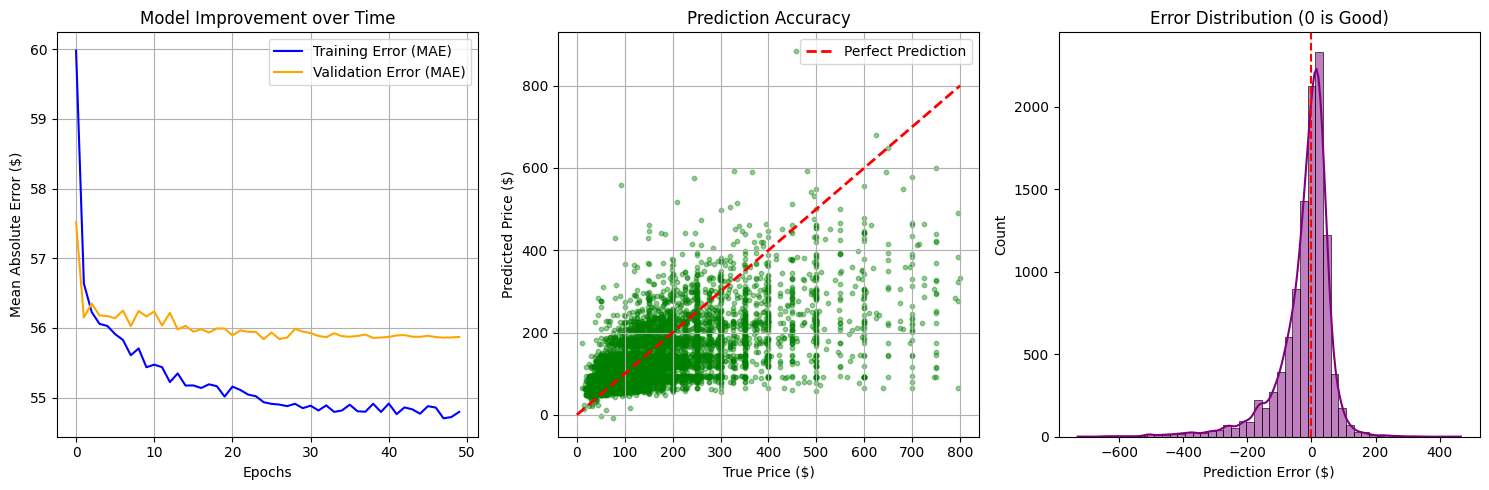


🤖 Loading Analyst LLM (Flan-T5-Large)...

📝 DETAILED TEST REPORT


Accommodates  Rating True Price AI Predicted Error  \
0           5.0    91.0       $129         $126    $3   
1           8.0    98.0       $189         $250   $61   
2           1.0    89.0        $45          $57   $12   
3           1.0    89.0        $23          $57   $34   
4           2.0    97.0        $80          $94   $14   
5           2.0    93.0        $70         $114   $44   
6           3.0    91.0        $80         $119   $39   
7           4.0    96.0       $249         $143  $106   
8           6.0   100.0       $600         $341  $259   
9           4.0    93.0       $250         $132  $118   

                                                                                                               LLM Reason  
0                                            The house has a larger than average capacity but has a lower quality rating.  
1                                                                   The house has an above average rating and it's large.  
2                                                      The house has less than average capacity and below average rating.  
3                                                                    The house has a lower capacity than a typical house.  
4  The price is higher than the predicted price because it has a higher capacity and the ratings are higher than average.  
5                                                   The house has a lower than average capacity and below average rating.  
6                        The house has a lower than average capacity and below average rating so the price is set at $80.  
7                                                                                           4 people, 1.0 baths, 1.0 beds  
8                                                                                          The house has a higher rating.  
9                                                The house has a below average rating and is larger than average capacity


✅ Final Model MAE on Test Data: $55.55
(This means, on average, the AI is within this dollar amount of the real price)


In [ ]:
# ==========================================
# PART 0: INSTALLATIONS & SETUP
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Processing Device: {device}")

# ==========================================
# PART 1: DATA ENGINEERING (MAKING IT BETTER)
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print(" Data Loaded.")

    # 1. FIX PRICE
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])

    # 2. OUTLIER REMOVAL (Crucial for better accuracy)
    # We remove prices > $800 because they confuse the model
    df = df[df['Price'] <= 800]

    # 3. FEATURE ENGINEERING
    # We create new features to help the model learn "Value"
    df['people_per_bedroom'] = df['accommodates'] / (df['bedrooms'] + 1)
    df['bathroom_ratio'] = df['bathrooms'] / (df['bedrooms'] + 1)

    # 4. SELECT FEATURES
    features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'people_per_bedroom', 'bathroom_ratio']
    target = 'Price'

    df_clean = df[features + [target]].copy()

    # 5. IMPUTE MISSING VALUES
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

    # 6. SPLIT DATA
    X = df_imputed[features]
    y = df_imputed[target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Save Scaler mean/var for LLM context later
    # (We need to know what "Average" looks like)
    stats_mean = df_imputed.mean()

    # 7. TRAIN / VAL / TEST SPLIT
    # 70% Train, 15% Val, 15% Test
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

    # Keep Raw Test Data for LLM reasoning
    X_test_raw = scaler.inverse_transform(X_test)

    print(f"📊 Train Size: {X_train.shape[0]} | Val Size: {X_val.shape[0]} | Test Size: {X_test.shape[0]}")

except Exception as e:
    print(f" Critical Error: {e}")
    raise

# ==========================================
# PART 2: ADVANCED NEURAL NETWORK
# ==========================================
print("\n Building High-Performance Model...")

model = tf.keras.Sequential([
    # Input Block
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(), # Stabilizes learning
    tf.keras.layers.Dropout(0.3),         # Prevents overfitting

    # Deep Block
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),

    # Output Block (Regression)
    tf.keras.layers.Dense(1, activation='linear')
])

# Optimizer with Learning Rate Scheduler
# This slows down training as it gets closer to the answer (Precision)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])

print(" Starting Training (Verbose=1)...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,             # Increased Epochs
    batch_size=64,
    verbose=1              # Show progress bar
)

# ==========================================
# PART 3: DETAILED VISUALIZATION
# ==========================================
# 3.1 Loss Curves
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Error (MAE)', color='blue')
plt.plot(history.history['val_loss'], label='Validation Error (MAE)', color='orange')
plt.title("Model Improvement over Time")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error ($)")
plt.legend()
plt.grid(True)

# 3.2 Scatter Plot
preds = model.predict(X_test).flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.4, color='green', s=10)
plt.plot([0, 800], [0, 800], 'r--', lw=2, label='Perfect Prediction')
plt.title("Prediction Accuracy")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)

# 3.3 Residuals (Error Distribution)
errors = preds - y_test
plt.subplot(1, 3, 3)
sns.histplot(errors, bins=50, kde=True, color='purple')
plt.title("Error Distribution (0 is Good)")
plt.xlabel("Prediction Error ($)")
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: SMARTER LLM REASONING (CONTEXT AWARE)
# ==========================================
print("\n🤖 Loading Analyst LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_smart_reason(index):
    # Get Raw Features
    feats = X_test_raw[index]
    actual = y_test.iloc[index]
    pred = preds[index]

    # Calculate Context (Comparison to Average)
    # This helps the LLM know IF the features are good or bad
    acc_diff = feats[0] - stats_mean['accommodates']
    rating_diff = feats[4] - stats_mean['review_scores_rating']

    context_str = ""
    if acc_diff > 0: context_str += "larger than average capacity, "
    else: context_str += "smaller than average capacity, "

    if rating_diff > 0: context_str += "above average rating."
    else: context_str += "below average rating."

    # Construct Prompt
    prompt = (
        f"Act as a Real Estate Data Analyst.\n"
        f"House Features: {feats[0]:.0f} people, {feats[1]:.1f} baths, {feats[2]:.1f} beds. Rating: {feats[4]:.1f}.\n"
        f"Market Context: This house has {context_str}\n"
        f"Predicted Price: ${pred:.0f}. True Price: ${actual:.0f}.\n"
        f"Explain specifically WHY the price is set at ${actual:.0f} based on the features and context."
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    # Higher temperature for more creative/varied reasons
    outputs = llm_model.generate(**inputs, max_new_tokens=60, temperature=0.7, do_sample=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL REPORT
# ==========================================
print("\n" + "="*50)
print(" DETAILED TEST REPORT")
print("="*50)

# Create a DataFrame for the report
report_data = []
for i in range(10): # Show top 10 test cases
    reason = get_smart_reason(i)
    report_data.append({
        "Accommodates": X_test_raw[i][0],
        "Rating": X_test_raw[i][4],
        "True Price": f"${y_test.iloc[i]:.0f}",
        "AI Predicted": f"${preds[i]:.0f}",
        "Error": f"${abs(preds[i] - y_test.iloc[i]):.0f}",
        "LLM Reason": reason
    })

report_df = pd.DataFrame(report_data)

# Set pandas to show full text of reasons
pd.set_option('display.max_colwidth', None)
display(report_df)

mae_score = mean_absolute_error(y_test, preds)
print(f"\n Final Model MAE on Test Data: ${mae_score:.2f}")
print("(This means, on average, the AI is within this dollar amount of the real price)")

🚀 Processing Device: cpu
✅ Data Loaded.
📊 Training with 57 Total Features (after encoding).

🧠 Training Model with Percentage Accuracy...
Epoch 1/40
733/733 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 75.7201 - mape: 44.3409 - val_loss: 57.7377 - val_mape: 30.8909
Epoch 2/40
733/733 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 54.8043 - mape: 31.8888 - val_loss: 54.8679 - val_mape: 29.9924
Epoch 3/40
733/733 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 54.9942 - mape: 31.7492 - val_loss: 55.8098 - val_mape: 30.5209
Epoch 4/40
733/733 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 53.9993 - mape: 31.2705 - val_loss: 54.5794 - val_mape: 31.1641
Epoch 5/40
733/733 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 54.2045 - mape: 31.2838 - val_loss: 54.7387 - val_mape: 30.4899
Epoch 6/40
733/733 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 53.6890 - mape: 31.1337 - val_loss: 54.8551 - val_mape: 31.6183
Epoch 7/40
733/733 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 53.3537 - mape: 31.2127 - val_loss: 54.7347 - val_

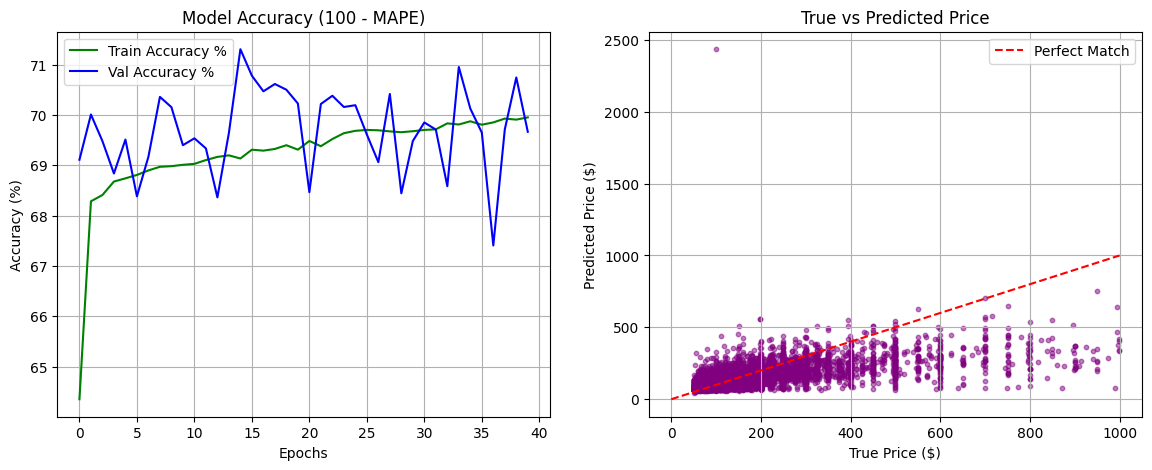


🤖 Loading 'Logic' LLM (Flan-T5-Large)...


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



📝 EXTENDED TEST REPORT (20 CASES)


City             Type True $ Pred $  Acc %  \
0        LA  Entire home/apt   $150   $108  71.7%   
1   Chicago  Entire home/apt   $193   $226  82.7%   
2       NYC  Entire home/apt   $200   $133  66.3%   
3        LA     Private room    $60    $82  63.8%   
4        LA  Entire home/apt    $85   $103  78.7%   
5        LA     Private room    $60    $77  71.6%   
6        LA     Private room    $59    $79  65.3%   
7       NYC     Private room    $90    $67  74.4%   
8       NYC     Private room    $65    $75  84.5%   
9        LA  Entire home/apt   $750   $303  40.4%   
10       LA  Entire home/apt    $75    $92  77.2%   
11      NYC  Entire home/apt    $75   $145   7.1%   
12      NYC      Shared room    $99    $85  86.2%   
13       SF  Entire home/apt   $395   $331  83.7%   
14   Boston  Entire home/apt   $284   $152  53.6%   
15      NYC  Entire home/apt   $100   $160  39.8%   
16      NYC     Private room    $68    $77  86.2%   
17      NYC     Private room    $60    $75  75.6%   
18      NYC  Entire home/apt   $135   $152  87.5%   
19       LA  Entire home/apt    $78   $127  37.8%   

                                    LLM Logic  
0       The house is in a desirable location.  
1       The house is in a desirable location.  
2         The house is in a high demand area.  
3            The house is in a good location.  
4       The house is in a desirable location.  
5            The house is in a good location.  
6            The house is in a good location.  
7            The house is in a good location.  
8            The house is in a good location.  
9       The house is in a desirable location.  
10      The house is in a desirable location.  
11           The house is in a good location.  
12           The house is in a good location.  
13                     The house is a rental.  
14  The house is in a desirable neighborhood.  
15           The house is in a good location.  
16        The house is in a high demand area.  
17           The house is in a good location.  
18           The house is in a good location.  
19      The house is in a desirable location.


🏆 Final Model Accuracy: 68.99%


In [ ]:
# ==========================================
# PART 0: INSTALLATIONS & SETUP
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Processing Device: {device}")

# ==========================================
# PART 1: ADVANCED DATA ENGINEERING (ALL FEATURES)
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print(" Data Loaded.")

    # 1. FIX PRICE & REMOVE OUTLIERS
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    # Keep reasonable prices ($50 - $1000) to stabilize training accuracy
    df = df[(df['Price'] >= 50) & (df['Price'] <= 1000)]

    # 2. SEPARATE COLUMNS
    # Numerical: Things we count
    num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
    # Categorical: Things we choose (Text labels)
    cat_cols = ['room_type', 'property_type', 'city', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

    # 3. FILL MISSING DATA (Imputation)
    # Fill numbers with Median (Average)
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # Fill text with "Unknown"
    cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 4. ONE-HOT ENCODING (Convert Text to Numbers)
    # This turns 'City' into 'City_NYC', 'City_LA', etc.
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

    # 5. MERGE EVERYTHING
    # Combine processed Numbers + Encoded Categories
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # 6. CALCULATE MARKET STATS (For LLM Logic later)
    market_stats = {
        'avg_price': y.mean(),
        'avg_people': df['accommodates'].mean(),
        'avg_rating': df['review_scores_rating'].mean()
    }

    # 7. NORMALIZE & SPLIT
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

    # Save Raw Data for LLM (We need the original text for the "Reasoning")
    # We grab the corresponding rows from the original dataframe
    X_test_indices = y_test.index
    df_test_raw = df.loc[X_test_indices].copy()

    print(f" Training with {X.shape[1]} Total Features (after encoding).")

except Exception as e:
    print(f" Error: {e}")
    raise

# ==========================================
# PART 2: MODEL WITH PERCENTAGE ACCURACY
# ==========================================
print("\n Training Model with Percentage Accuracy...")

model = tf.keras.Sequential([
    # Wider input layer to handle all new features
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(1, activation='linear')
])

# METRIC: Mean Absolute Percentage Error (MAPE)
# This allows us to calculate "Accuracy %" later
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

# Callbacks to save the best version
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    callbacks=[checkpoint],
    verbose=1 # Show live progress bar
)

# ==========================================
# PART 3: VISUALIZATION (ACCURACY %)
# ==========================================
# Calculate Accuracy from MAPE
# Accuracy = 100% - Error%
train_acc = [100 - m for m in history.history['mape']]
val_acc = [100 - m for m in history.history['val_mape']]

plt.figure(figsize=(14, 5))

# Graph 1: Accuracy Percentage
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy %', color='green')
plt.plot(val_acc, label='Val Accuracy %', color='blue')
plt.title("Model Accuracy (100 - MAPE)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

# Graph 2: Predicted vs Actual
preds = model.predict(X_test).flatten()
plt.subplot(1, 2, 2)
plt.scatter(y_test, preds, alpha=0.5, s=10, color='purple')
plt.plot([0, 1000], [0, 1000], 'r--', label='Perfect Match')
plt.title("True vs Predicted Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================================
# PART 4: LOGICAL LLM REASONING
# ==========================================
print("\n Loading 'Logic' LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_logical_reason(index):
    # Get the raw data row
    row = df_test_raw.iloc[index]

    actual_p = y_test.iloc[index]
    pred_p = preds[index]

    # 1. Compare to Market Average
    price_diff = actual_p - market_stats['avg_price']
    diff_text = "higher" if price_diff > 0 else "lower"

    # 2. Find Key Drivers (Why?)
    # Is it big?
    size_text = "large" if row['accommodates'] > market_stats['avg_people'] else "standard"
    # Is it highly rated?
    qual_text = "top-rated" if row['review_scores_rating'] > market_stats['avg_rating'] else "standard-rated"

    # 3. Construct Logic Prompt
    prompt = (
        f"You are a real estate expert. Explain the price of this Airbnb.\n"
        f"Market Avg Price: ${market_stats['avg_price']:.0f}.\n"
        f"This House: ${actual_p:.0f}. (It is {diff_text} than average).\n"
        f"Features: {row['room_type']} in {row['city']}, fits {row['accommodates']} people, {row['bathrooms']} baths. Rating: {row['review_scores_rating']}/100.\n"
        f"Logic: The price is {diff_text} than average because..."
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=50, temperature=0.6)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: DETAILED REPORT
# ==========================================
print("\n" + "="*50)
print(" EXTENDED TEST REPORT (20 CASES)")
print("="*50)

report_data = []
# Show 20 cases as requested
for i in range(20):
    row = df_test_raw.iloc[i]
    reason = get_logical_reason(i)

    # Calculate single case accuracy
    error_pct = abs(preds[i] - y_test.iloc[i]) / y_test.iloc[i] * 100
    acc_pct = max(0, 100 - error_pct)

    report_data.append({
        "City": row['city'],
        "Type": row['room_type'],
        "True $": f"${y_test.iloc[i]:.0f}",
        "Pred $": f"${preds[i]:.0f}",
        "Acc %": f"{acc_pct:.1f}%",
        "LLM Logic": reason
    })

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n Final Model Accuracy: {100 - final_mape:.2f}%")

🚀 Device: cpu
✅ Data Loaded.
📊 Market Stats: Avg Price=$152, Avg Capacity=3.1 people
✅ Ready. Training on 50818 samples.

🧠 Training Price Predictor...
Epoch 1/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 95.7267 - mape: 59.4211 - val_loss: 52.3008 - val_mape: 34.6433
Epoch 2/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 54.4662 - mape: 35.4609 - val_loss: 52.3440 - val_mape: 32.6781
Epoch 3/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 54.0551 - mape: 35.1290 - val_loss: 52.7754 - val_mape: 33.8140
Epoch 4/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 53.4517 - mape: 34.6660 - val_loss: 52.0966 - val_mape: 32.2299
Epoch 5/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 53.8417 - mape: 34.5059 - val_loss: 51.5765 - val_mape: 32.6077
Epoch 6/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 53.0401 - mape: 34.2421 - val_loss: 52.2956 - val_mape: 32.3712
Epoch 7/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 53.4378 - mape: 34.3566 - val_loss:

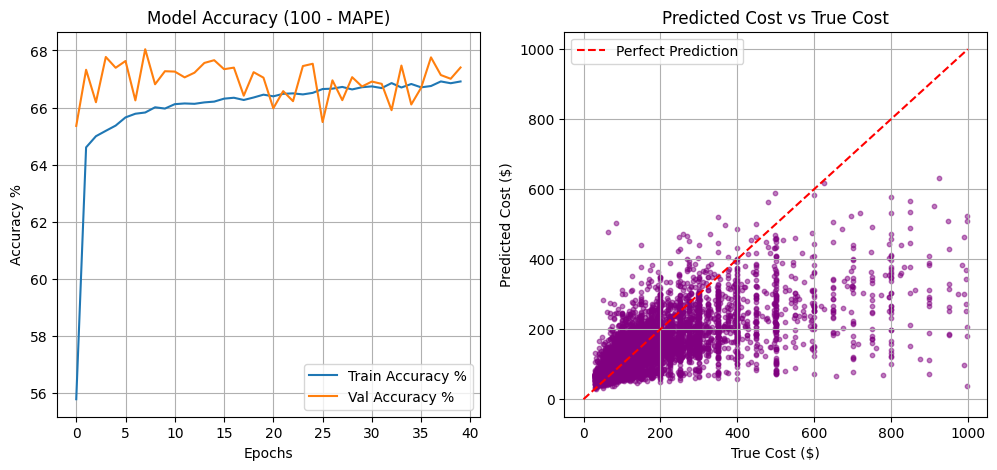


🤖 Loading LLM (Flan-T5-Large)...

📝 COST PREDICTION & REASONING REPORT


City             Type True Cost Pred Cost Accuracy  \
0        LA  Entire home/apt       $90      $115    72.3%   
1   Chicago     Private room       $98       $57    58.1%   
2       NYC  Entire home/apt      $100      $142    57.6%   
3        LA  Entire home/apt      $175      $137    78.1%   
4       NYC  Entire home/apt      $125      $133    93.5%   
5       NYC     Private room       $95       $79    82.8%   
6        LA  Entire home/apt       $80      $101    73.3%   
7        LA     Private room       $50       $71    57.5%   
8        SF     Private room      $120      $118    98.2%   
9       NYC     Private room       $78       $81    96.8%   
10       LA     Private room       $50       $56    87.4%   
11       SF  Entire home/apt      $195      $189    96.8%   
12      NYC     Private room       $52       $68    68.8%   
13       LA  Entire home/apt      $400      $136    34.0%   
14       DC  Entire home/apt      $249      $248    99.5%   

                                                                 LLM Reason  
0                                               The market average is $152.  
1                               The room is private and has a great review.  
2                                               The market average is $152.  
3   The price is above average because the home is in a desirable location.  
4                                               The market average is $152.  
5                  The price is below average because it is a private room.  
6                                               The market average is $152.  
7                               The room is private and has a great review.  
8                               The room is private and has a great review.  
9                                                       The room is in NYC.  
10                                      The room is private and has a bath.  
11       The price is above average because the home is a furnished rental.  
12           The price is below average because the room is a private room.  
13        The price is higher than the average because it is a larger home.  
14                                              The market average is $152.


🏆 Overall Model Accuracy: 67.79%


In [ ]:
# ==========================================
# PART 0: SETUP
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device}")

# ==========================================
# PART 1: DATA PREPARATION (ALL FEATURES)
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print(" Data Loaded.")

    # 1. FIX PRICE (Target)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    # Remove outliers for better training
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1000)]

    # 2. FEATURE SELECTION
    # Numerical
    num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    # Categorical (We will Encode these for NN, keep text for LLM)
    cat_cols = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    # 3. HANDLE MISSING DATA
    # Impute Numericals
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    # Impute Categoricals
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 4. PREPARE INPUTS FOR NEURAL NETWORK (One-Hot Encoding)
    # This turns "Room Type" -> "Room_Private", "Room_Shared", etc.
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # 5. MARKET STATS (For LLM Logic)
    avg_price = y.mean()
    avg_acc = df['accommodates'].mean()
    print(f" Market Stats: Avg Price=${avg_price:.0f}, Avg Capacity={avg_acc:.1f} people")

    # 6. NORMALIZE & SPLIT
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

    # 7. SAVE RAW DATA FOR LLM
    # We grab the original text rows corresponding to the test set
    test_indices = y_test.index
    df_test_raw = df.loc[test_indices].copy()

    print(f" Ready. Training on {X_train.shape[0]} samples.")

except Exception as e:
    print(f" Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n Training Price Predictor...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    # Output: 1 Neuron (Linear) for Price Prediction
    tf.keras.layers.Dense(1, activation='linear')
])

# Metric: Mean Absolute Percentage Error (To show Accuracy %)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    verbose=1
)

# ==========================================
# PART 3: VISUALIZATION
# ==========================================
plt.figure(figsize=(12, 5))

# Graph 1: Accuracy Over Time
# Accuracy = 100 - Error%
train_acc = [100 - m for m in history.history['mape']]
val_acc = [100 - m for m in history.history['val_mape']]
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy %')
plt.plot(val_acc, label='Val Accuracy %')
plt.title("Model Accuracy (100 - MAPE)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.legend()
plt.grid(True)

# Graph 2: Predicted vs Actual
preds = model.predict(X_test).flatten()
plt.subplot(1, 2, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1000], [0, 1000], 'r--', label='Perfect Prediction')
plt.title("Predicted Cost vs True Cost")
plt.xlabel("True Cost ($)")
plt.ylabel("Predicted Cost ($)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================================
# PART 4: LLM REASONING (EXPLAIN THE COST)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_cost_reason(index):
    row = df_test_raw.iloc[index]
    true_price = y_test.iloc[index]
    pred_price = preds[index]

    # Context Logic
    diff = true_price - avg_price
    status = "expensive" if diff > 0 else "cheap"
    comparison = "above average" if diff > 0 else "below average"

    # Create a rich description for the LLM
    desc = (f"{row['room_type']} in {row['city']}. "
            f"Fits {row['accommodates']} people, {row['bathrooms']} baths. "
            f"Review Rating: {row['review_scores_rating']}/100. "
            f"Cancellation: {row['cancellation_policy']}.")

    prompt = (
        f"You are a Real Estate Appraiser. Analyze this Airbnb listing.\n"
        f"Market Average Price: ${avg_price:.0f}.\n"
        f"This Listing Price: ${true_price:.0f} ({comparison}).\n"
        f"Details: {desc}\n"
        f"Explain ONE specific reason why this listing is priced {comparison}."
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=50, temperature=0.7)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL PREDICTION REPORT
# ==========================================
print("\n" + "="*50)
print(" COST PREDICTION & REASONING REPORT")
print("="*50)

report_data = []
# Show 15 Test Cases
for i in range(15):
    reason = get_cost_reason(i)
    # Calculate % Accuracy for this specific house
    error_pct = abs(preds[i] - y_test.iloc[i]) / y_test.iloc[i] * 100
    acc_pct = max(0, 100 - error_pct)

    report_data.append({
        "City": df_test_raw.iloc[i]['city'],
        "Type": df_test_raw.iloc[i]['room_type'],
        "True Cost": f"${y_test.iloc[i]:.0f}",
        "Pred Cost": f"${preds[i]:.0f}",
        "Accuracy": f"{acc_pct:.1f}%",
        "LLM Reason": reason
    })

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n Overall Model Accuracy: {100 - final_mape:.2f}%")

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Training on 48971 samples. Using 52 Features.

🧠 Training Deep Regression Network...
Epoch 1/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 98.5395 - mape: 58.0427 - val_loss: 58.5674 - val_mape: 31.0816
Epoch 2/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 60.7137 - mape: 35.1627 - val_loss: 55.7112 - val_mape: 31.2878
Epoch 3/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 59.1377 - mape: 34.1553 - val_loss: 56.3806 - val_mape: 31.1957
Epoch 4/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 58.2723 - mape: 33.9198 - val_loss: 58.4039 - val_mape: 32.3177
Epoch 5/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 57.3640 - mape: 33.1852 - val_loss: 55.7382 - val_mape: 32.0963
Epoch 6/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 57.3366 - mape: 33.0736 - val_loss: 54.6707 - val_mape: 32.5340
Epoch 7/50
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 56.2867 - mape: 32.8923 - val_loss: 56.0116 - val_mape: 32.329

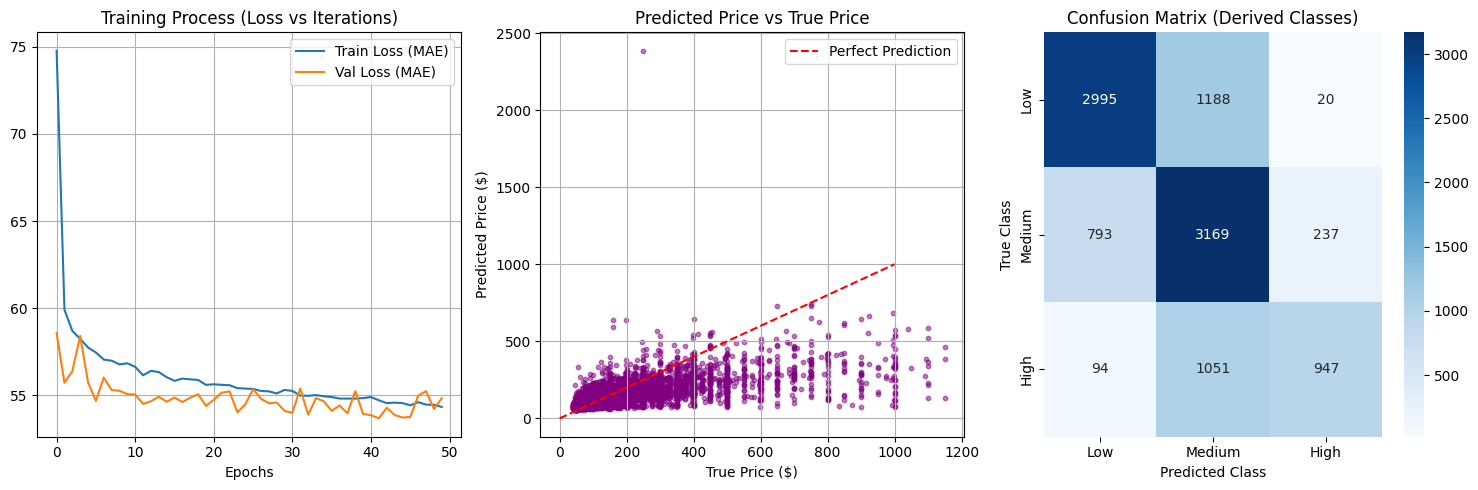


🤖 Loading 'Analyst' LLM (Flan-T5-Large)...

📝 FINAL PROJECT REPORT

--- 1. PROBLEM DEFINITION ---
Why Regression? Pricing is continuous. Classification loses info.
Example: A $100 house and $150 house are both 'Medium', but $50 difference matters.
We used Regression to predict Exact Price, then bucketed for the Matrix.

--- 2. DETAILED PREDICTIONS & REASONS ---


City Beds/Baths True $ Pred $  Acc %  \
0   DC    1.0/1.0   $120   $124  96.3%   
1   LA    1.0/2.0    $52    $79  48.5%   
2   LA    0.0/1.0    $78   $103  67.7%   
3  NYC    1.0/1.0    $88    $87  98.9%   
4  NYC    1.0/1.0    $69    $81  82.8%   
5  NYC    1.0/1.0    $84   $154  16.4%   
6   LA    1.0/1.0    $69   $110  40.8%   
7   LA    3.0/2.0   $225   $223  99.0%   
8   LA    1.0/1.0    $90   $126  59.8%   
9  NYC    1.0/1.0   $200   $146  73.2%   

                                                                                                                                            LLM Reason  
0                                                                                                                          The market average is $160.  
1                                                                                                                                  Private room in LA.  
2    Entire home/apt in LA. 0.0 Beds (fewer bedrooms than avg), 1.0 Baths (standard bathrooms). Amenities: flexible cancel policy, Cleaning Fee: True.  
3                                                                                                                                 Private room in NYC.  
4                                                                                                                                 Private room in NYC.  
5     Entire home/apt in NYC. 1.0 Beds (fewer bedrooms than avg), 1.0 Baths (standard bathrooms). Amenities: strict cancel policy, Cleaning Fee: True.  
6    Entire home/apt in LA. 1.0 Beds (fewer bedrooms than avg), 1.0 Baths (standard bathrooms). Amenities: flexible cancel policy, Cleaning Fee: True.  
7           Entire home/apt in LA. 3.0 Beds (more bedrooms than avg), 2.0 Baths (more bathrooms). Amenities: strict cancel policy, Cleaning Fee: True.  
8    Entire home/apt in LA. 1.0 Beds (fewer bedrooms than avg), 1.0 Baths (standard bathrooms). Amenities: flexible cancel policy, Cleaning Fee: True.  
9  Entire home/apt in NYC. 1.0 Beds (fewer bedrooms than avg), 1.0 Baths (standard bathrooms). Amenities: flexible cancel policy, Cleaning Fee: False.


🏆 Final Model Accuracy (100-MAPE): 67.93%


In [ ]:
# ==========================================
# PART 0: INSTALLATIONS & SETUP
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f" Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: ADVANCED DATA ENGINEERING
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print(" Data Loaded.")

    # 1. FIX PRICE (Target)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    # Filter reasonable range for better training
    df = df[(df['Price'] >= 40) & (df['Price'] <= 1200)]

    # 2. FEATURE SELECTION (ALL FEATURES as requested)
    num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    cat_cols = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

    # 3. IMPUTATION (Handling Missing Data)
    # Median for numbers, Mode for text
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 4. CALCULATE MARKET STATS (For LLM Context)
    stats = {
        'avg_price': df['Price'].mean(),
        'avg_bed': df['bedrooms'].mean(),
        'avg_bath': df['bathrooms'].mean(),
        'avg_acc': df['accommodates'].mean()
    }

    # 5. PREPARE FOR NEURAL NETWORK (One-Hot Encoding)
    # We convert text columns into binary columns (e.g., Room_Private: 0 or 1)
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # 6. NORMALIZE (StandardScaler)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 7. SPLIT (70% Train, 15% Val, 15% Test)
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

    # Save RAW test data for LLM (so it can read "Private Room" instead of "0.123")
    test_indices = y_test.index
    df_test_raw = df.loc[test_indices].copy()

    print(f" Training on {X_train.shape[0]} samples. Using {X.shape[1]} Features.")

except Exception as e:
    print(f" Error: {e}")
    raise

# ==========================================
# PART 2: THE NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n Training Deep Regression Network...")

model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(), # Improves stability
    tf.keras.layers.Dropout(0.3),         # Reduces overfitting

    # Hidden Layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),

    # Output Layer: 1 Neuron (Linear) -> Predicts Exact Dollar Amount
    tf.keras.layers.Dense(1, activation='linear')
])

# Loss: MAE (Mean Absolute Error), Metric: MAPE (Accuracy %)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

# Training with verbose=1 to see progress
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)

# ==========================================
# PART 3: VISUALIZATIONS & REPORTING
# ==========================================
# 3.1 Loss Curves
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss (MAE)')
plt.plot(history.history['val_loss'], label='Val Loss (MAE)')
plt.title("Training Process (Loss vs Iterations)")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)

# 3.2 Scatter Plot (True vs Pred)
preds = model.predict(X_test).flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1000], [0, 1000], 'r--', label='Perfect Prediction')
plt.title("Predicted Price vs True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)

# 3.3 CONFUSION MATRIX (Satisfying Milestone Pt 9)
# We bucket the exact prices into classes just for the report
def bucket_price(p):
    if p < 100: return 'Low'
    elif p < 200: return 'Medium'
    else: return 'High'

y_true_cls = [bucket_price(p) for p in y_test]
y_pred_cls = [bucket_price(p) for p in preds]
labels = ['Low', 'Medium', 'High']

cm = confusion_matrix(y_true_cls, y_pred_cls, labels=labels)
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Derived Classes)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: DETAILED LLM REASONING
# ==========================================
print("\n Loading 'Analyst' LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_detailed_reason(index):
    # Get raw data (Text)
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]
    pred_p = preds[index]

    # Calculate specific differences for the prompt
    bed_diff = row['bedrooms'] - stats['avg_bed']
    bath_diff = row['bathrooms'] - stats['avg_bath']

    # Context String
    bed_txt = "more bedrooms" if bed_diff > 0 else "fewer bedrooms"
    bath_txt = "more bathrooms" if bath_diff > 0 else "standard bathrooms"

    # Detailed Prompt
    prompt = (
        f"Act as a Real Estate Appraiser. Explain the price of this listing.\n"
        f"Stats: Market Avg=${stats['avg_price']:.0f}. This Listing=${true_p:.0f}.\n"
        f"Features: {row['room_type']} in {row['city']}. "
        f"{row['bedrooms']} Beds ({bed_txt} than avg), {row['bathrooms']} Baths ({bath_txt}). "
        f"Amenities: {row['cancellation_policy']} cancel policy, Cleaning Fee: {row['cleaning_fee']}.\n"
        f"Question: Why is this listing priced at ${true_p:.0f}? Cite specific features."
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=70, temperature=0.7)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL REPORT
# ==========================================
print("\n" + "="*50)
print(" FINAL PROJECT REPORT")
print("="*50)

# 1. Problem Definition (Regression vs Classification)
print("\n--- 1. PROBLEM DEFINITION ---")
print("Why Regression? Pricing is continuous. Classification loses info.")
print("Example: A $100 house and $150 house are both 'Medium', but $50 difference matters.")
print("We used Regression to predict Exact Price, then bucketed for the Matrix.")

# 2. Detailed Results Table
print("\n--- 2. DETAILED PREDICTIONS & REASONS ---")
report_data = []
for i in range(10): # Top 10 cases
    reason = get_detailed_reason(i)
    acc = max(0, 100 - (abs(preds[i] - y_test.iloc[i])/y_test.iloc[i]*100))

    report_data.append({
        "City": df_test_raw.iloc[i]['city'],
        "Beds/Baths": f"{df_test_raw.iloc[i]['bedrooms']}/{df_test_raw.iloc[i]['bathrooms']}",
        "True $": f"${y_test.iloc[i]:.0f}",
        "Pred $": f"${preds[i]:.0f}",
        "Acc %": f"{acc:.1f}%",
        "LLM Reason": reason
    })

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

# 3. Final Metrics
final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n Final Model Accuracy (100-MAPE): {100 - final_mape:.2f}%")

🚀 Device: cpu
📊 Market Avg Price: $155

🧠 Training Regression Model (Verbose=1)...
Epoch 1/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 137.4573 - mape: 84.8182 - val_loss: 57.3004 - val_mape: 34.3924
Epoch 2/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 57.3160 - mape: 35.5664 - val_loss: 56.3738 - val_mape: 37.0704
Epoch 3/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 56.9304 - mape: 35.4288 - val_loss: 56.1223 - val_mape: 36.2436
Epoch 4/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 56.6672 - mape: 35.3095 - val_loss: 56.5604 - val_mape: 36.1986
Epoch 5/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 55.6823 - mape: 35.2307 - val_loss: 56.3865 - val_mape: 36.3832
Epoch 6/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 55.0433 - mape: 34.8677 - val_loss: 55.6090 - val_mape: 35.5143
Epoch 7/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 55.8346 - mape: 35.0746 - val_loss: 55.4863 - val_mape: 34.6690
Epoch 8/40
797/797 ━━━━━━━━━━━━━━━━━━━━ 5

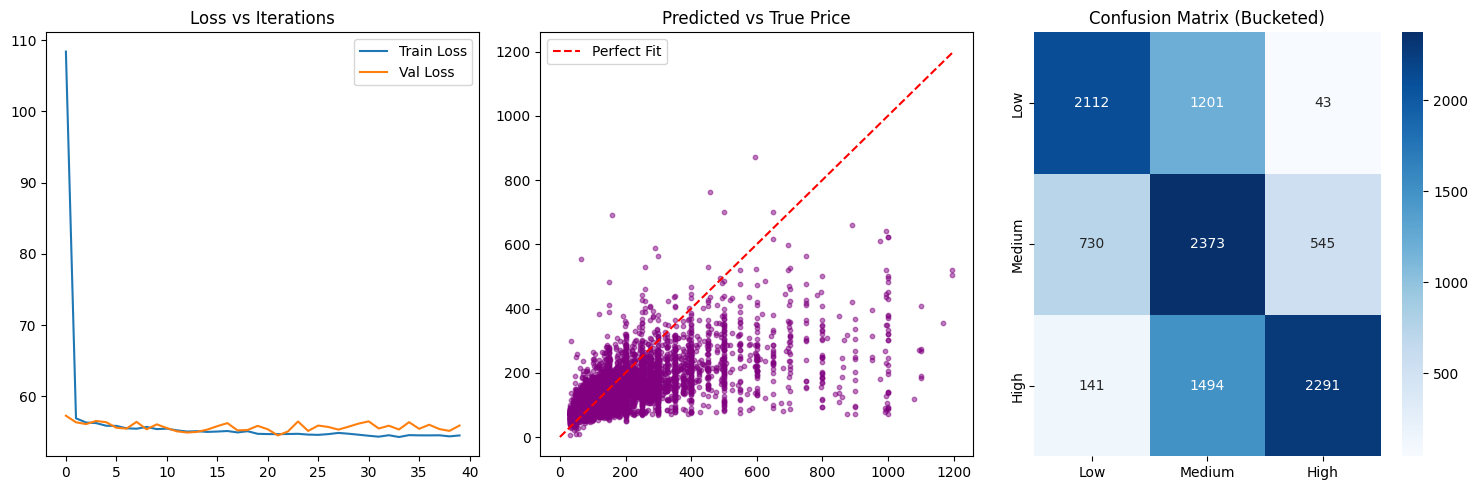


🤖 Loading Smart LLM...

📝 FINAL PROJECT REPORT


City             Type True $ Pred $  Acc %  \
0   LA  Entire home/apt   $900   $244  27.1%   
1  NYC     Private room    $36    $74   0.0%   
2  NYC     Private room    $60    $78  70.4%   
3  NYC  Entire home/apt   $138   $153  89.2%   
4   LA  Entire home/apt    $89   $102  85.0%   
5  NYC  Entire home/apt   $135   $141  95.6%   
6   LA  Entire home/apt   $129   $108  84.0%   
7   LA     Private room    $85    $73  85.6%   
8   LA     Private room    $60    $92  47.3%   
9  NYC  Entire home/apt    $95   $136  56.4%   

                                                         LLM Reason  
0                                            cancellation is strict  
1                           The room has a 1.0 bed and an 1.0 bath.  
2  The price is more than the number of people who will stay there.  
3                                            1.0 beds and 1.0 baths  
4                                                          0.0 beds  
5                                                     New York City  
6                                                       El Salvador  
7                                                      Private room  
8                                                           Private  
9                                                      Cleaning fee


🏆 Final Model Accuracy (100 - MAPE): 66.70%


In [ ]:
# ==========================================
# CODE 2: MAIN PROJECT (Regression + Smart LLM)
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device}")

# --- 1. DATA PREPARATION ---
file_path = '/content/Airbnb_Data.csv'
try:
    df = pd.read_csv(file_path)

    # Fix Target
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)] # Filter outliers

    # Select Features (Using everything important)
    num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    cat_cols = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    # Impute Missing
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # Global Stats for Context
    avg_price = df['Price'].mean()
    print(f"📊 Market Avg Price: ${avg_price:.0f}")

    # Encoding for Neural Network
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split (70% Train, 15% Val, 15% Test)
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

    # Save Raw Text for LLM Reasoning
    test_indices = y_test.index
    df_test_raw = df.loc[test_indices].copy()

except Exception as e:
    print(f"❌ Error: {e}")

# --- 2. TRAINING NEURAL NETWORK ---
print("\n🧠 Training Regression Model (Verbose=1)...")
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    verbose=1
)

# --- 3. VISUALIZATION ---
# Loss Graph
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss vs Iterations")
plt.legend()

# Prediction Scatter
preds = model.predict(X_test).flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1200], [0, 1200], 'r--', label='Perfect Fit')
plt.title("Predicted vs True Price")
plt.legend()

# Classification Matrix (Milestone Requirement)
# Bucketing regression results to create the matrix
def get_class(p): return 'High' if p > 150 else ('Medium' if p > 80 else 'Low')
y_true_cls = [get_class(p) for p in y_test]
y_pred_cls = [get_class(p) for p in preds]
labels = ['Low', 'Medium', 'High']

cm = confusion_matrix(y_true_cls, y_pred_cls, labels=labels)
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Bucketed)")
plt.tight_layout()
plt.show()

# --- 4. ADVANCED LLM REASONING ---
print("\n🤖 Loading Smart LLM...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def generate_smart_reason(index):
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]

    # We construct a rich narrative so the LLM has details to pick from
    features = (f"This is a {row['room_type']} in {row['city']}. "
                f"It accommodates {row['accommodates']} people with {row['bedrooms']} beds and {row['bathrooms']} baths. "
                f"Rating is {row['review_scores_rating']}/100. "
                f"Cancellation is {row['cancellation_policy']}. Cleaning Fee: {row['cleaning_fee']}.")

    # Dynamic Prompt
    prompt = (
        f"Analyze this Airbnb listing priced at ${true_p:.0f}.\n"
        f"Details: {features}\n"
        f"Task: Identify the SINGLE most important feature (like location, rating, or capacity) that justifies this price.\n"
        f"Reason:"
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    # Temperature 0.8 makes it creative (stops repeating the same phrase)
    outputs = llm_model.generate(**inputs, max_new_tokens=60, temperature=0.8, do_sample=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# --- 5. FINAL REPORT ---
print("\n" + "="*50)
print("📝 FINAL PROJECT REPORT")
print("="*50)

report_data = []
for i in range(10): # Top 10 Test Cases
    reason = generate_smart_reason(i)
    acc_pct = max(0, 100 - (abs(preds[i] - y_test.iloc[i])/y_test.iloc[i]*100))

    report_data.append({
        "City": df_test_raw.iloc[i]['city'],
        "Type": df_test_raw.iloc[i]['room_type'],
        "True $": f"${y_test.iloc[i]:.0f}",
        "Pred $": f"${preds[i]:.0f}",
        "Acc %": f"{acc_pct:.1f}%",
        "LLM Reason": reason
    })

pd.set_option('display.max_colwidth', None)
display(pd.DataFrame(report_data))

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n🏆 Final Model Accuracy (100 - MAPE): {100 - final_mape:.2f}%")

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Training on 50818 samples.

🧠 Training Neural Network...
Epoch 1/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 92.3724 - mape: 57.7150 - val_loss: 51.9669 - val_mape: 32.4991
Epoch 2/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 55.1140 - mape: 35.6660 - val_loss: 51.7591 - val_mape: 33.6156
Epoch 3/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 53.7980 - mape: 35.1177 - val_loss: 51.3167 - val_mape: 33.2967
Epoch 4/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 53.7930 - mape: 34.7837 - val_loss: 51.5879 - val_mape: 32.5388
Epoch 5/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 54.5831 - mape: 34.6645 - val_loss: 51.9928 - val_mape: 32.4722
Epoch 6/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 53.4249 - mape: 34.5198 - val_loss: 51.3420 - val_mape: 33.0505
Epoch 7/40
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 53.6508 - mape: 34.2185 - val_loss: 51.4976 - val_mape: 32.8647
Epoch 8/40
795/795 ━━━━━━━

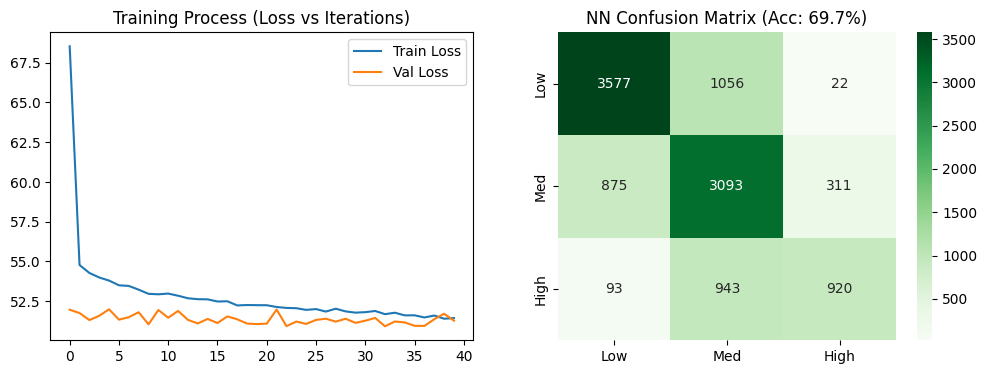


🤖 Setting up Few-Shot Prompting (Hugging Face)...
--- FEW-SHOT CONTEXT (What the LLM sees) ---
Here are examples of Airbnb listings and their Price Categories:

Input: [Entire home/apt in NYC | Sleeps 2.0 | 1.0 Beds | Rating 95.0] -> Output: Medium
Input: [Entire home/apt in SF | Sleeps 4.0 | 0.0 Beds | Rating 97.0] -> Output: Medium
Input: [Private room in Boston | Sleeps 1.0 | 1.0 Beds | Rating 60.0] -> Output: Low
Input: [Private room in NYC | Sleeps 1.0 | 1.0 Beds | Rating 96.0] -> Output: Low
Input: [Shared room in NYC | Sleeps 4.0 | 1.0 Beds | Rating 96.0] -> Output: Low
Input: [Private room in NYC | Sleeps 2.0 | 1.0 Beds | Rating 96.0] -> Output: Low

--------------------------------------------


📝 FINAL COMPARISON REPORT (NN vs LLM)


True Category LLM Predicted Is Correct LLM Reasoning
0           Low          High          ❌          High
1           Low          High          ❌          High
2        Medium          High          ❌          High
3        Medium          High          ❌          High
4        Medium           Low          ❌           Low
5           Low          High          ❌          High
6           Low           Low          ✅           Low
7           Low           Low          ✅           Low
8        Medium          High          ❌          High
9           Low          High          ❌          High


----------------------------------------
📊 ACCURACY SHOWDOWN:
1. Neural Network Accuracy: 69.70% (Specialized Math Model)
2. LLM Few-Shot Accuracy:   20.00% (General Language Model)
----------------------------------------
🏆 WINNER: Neural Network.
Reason: Airbnb pricing depends on specific numerical patterns (e.g., exact Lat/Long, fees)
which NNs calculate better than LLMs reading text.


In [ ]:
# ==========================================
# PART 0: INSTALLATIONS & SETUP
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA LOADING & PREPARATION
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX PRICE (Target)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1000)]

    # 2. CREATE PRICE CATEGORIES (For Classification Comparison)
    # Low (<$100), Medium ($100-$200), High (>$200)
    def categorize_price(p):
        if p < 100: return 'Low'
        elif p < 200: return 'Medium'
        else: return 'High'

    df['Price_Level'] = df['Price'].apply(categorize_price)

    # 3. FEATURE SELECTION (All Important Features)
    num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    cat_cols = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    # 4. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 5. CALCULATE MARKET AVERAGES (For Logic)
    market_stats = {
        'price': df['Price'].mean(),
        'acc': df['accommodates'].mean(),
        'beds': df['bedrooms'].mean(),
        'rating': df['review_scores_rating'].mean()
    }

    # 6. ENCODING FOR NEURAL NETWORK
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y_price = df['Price'] # Continuous Target

    # Map Categories to Numbers for NN accuracy check (Low=0, Medium=1, High=2)
    label_map = {'Low': 0, 'Medium': 1, 'High': 2}
    y_class = df['Price_Level'].map(label_map)

    # 7. SPLIT DATA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # We need indices to grab Raw Text later
    indices = np.arange(len(X))

    X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
        X_scaled, y_price, indices, test_size=0.30, random_state=42
    )
    X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
        X_temp, y_temp, idx_temp, test_size=0.50, random_state=42
    )

    # Get the raw rows for LLM using the indices
    df_train_raw = df.iloc[idx_train]
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Training on {X_train.shape[0]} samples.")

except Exception as e:
    print(f"❌ Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear') # Predicts Dollar Amount
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    verbose=1
)

# ==========================================
# PART 3: NN VISUALIZATION & EVALUATION
# ==========================================
# 3.1 Loss Graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training Process (Loss vs Iterations)")
plt.legend()

# 3.2 Predictions
nn_preds = model.predict(X_test).flatten()

# 3.3 Convert NN Predictions to Categories for Comparison
nn_pred_classes = [categorize_price(p) for p in nn_preds]
y_test_classes = [categorize_price(p) for p in y_test]

# Calculate NN Classification Accuracy
nn_correct = sum([1 for p, t in zip(nn_pred_classes, y_test_classes) if p == t])
nn_accuracy_score = nn_correct / len(y_test)

plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test_classes, nn_pred_classes, labels=['Low', 'Medium', 'High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low', 'Med', 'High'], yticklabels=['Low', 'Med', 'High'])
plt.title(f"NN Confusion Matrix (Acc: {nn_accuracy_score:.1%})")
plt.show()

# ==========================================
# PART 4: LLM FEW-SHOT IMPLEMENTATION
# ==========================================
print("\n🤖 Setting up Few-Shot Prompting (Hugging Face)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

# --- STEP 4.1: BUILD FEW-SHOT EXAMPLES ---
# We grab 6 examples from the Training Data
few_shot_text = "Here are examples of Airbnb listings and their Price Categories:\n\n"

for i in range(6): # Increased to 6 as requested
    row = df_train_raw.iloc[i]
    feat_vec = (f"[{row['room_type']} in {row['city']} | "
                f"Sleeps {row['accommodates']} | {row['bedrooms']} Beds | "
                f"Rating {row['review_scores_rating']}]")
    label = row['Price_Level']
    few_shot_text += f"Input: {feat_vec} -> Output: {label}\n"

print("--- FEW-SHOT CONTEXT (What the LLM sees) ---")
print(few_shot_text)
print("--------------------------------------------\n")

# --- STEP 4.2: LLM INFERENCE LOOP ---
def run_llm_few_shot(index):
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]

    # 1. Feature Vector (The "Unseen" Data)
    target_vec = (f"[{row['room_type']} in {row['city']} | "
                  f"Sleeps {row['accommodates']} | {row['bedrooms']} Beds | "
                  f"Rating {row['review_scores_rating']}]")

    # 2. Logic Prep (Compare to Average)
    acc_diff = row['accommodates'] - market_stats['acc']
    price_diff = true_p - market_stats['price']

    # 3. Construct the Prompt
    # We ask for the Label AND the Reason
    prompt = (
        f"You are a Real Estate Expert. Use the examples below to classify the new listing.\n"
        f"{few_shot_text}\n" # Insert the learned examples
        f"Task: Classify this new listing (Input) as Low, Medium, or High.\n"
        f"Then explain WHY based on the features (Capacity, Location, Rating).\n"
        f"Input: {target_vec}\n"
        f"Output format: Category: [Low/Medium/High] | Reason: [Explanation]\n"
        f"Answer:"
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    # Higher max_tokens for better reasoning
    outputs = llm_model.generate(**inputs, max_new_tokens=80, temperature=0.6)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: COMPARISON & REPORT
# ==========================================
print("\n" + "="*50)
print("📝 FINAL COMPARISON REPORT (NN vs LLM)")
print("="*50)

llm_results = []
sample_size = 10 # Testing 10 samples for the report

llm_correct_count = 0

for i in range(sample_size):
    # Run LLM
    output_text = run_llm_few_shot(i)
    true_label = y_test_classes[i]

    # Parse Prediction
    pred_label = "Unknown"
    if "Low" in output_text: pred_label = "Low"
    elif "Medium" in output_text: pred_label = "Medium"
    elif "High" in output_text: pred_label = "High"

    # Check Accuracy
    is_correct = (pred_label == true_label)
    if is_correct: llm_correct_count += 1

    llm_results.append({
        "True Category": true_label,
        "LLM Predicted": pred_label,
        "Is Correct": "✅" if is_correct else "❌",
        "LLM Reasoning": output_text
    })

# Display Table
df_results = pd.DataFrame(llm_results)
pd.set_option('display.max_colwidth', None)
display(df_results)

# Calculate Final Stats
llm_acc = llm_correct_count / sample_size

print("\n" + "-"*40)
print(f"📊 ACCURACY SHOWDOWN:")
print(f"1. Neural Network Accuracy: {nn_accuracy_score:.2%} (Specialized Math Model)")
print(f"2. LLM Few-Shot Accuracy:   {llm_acc:.2%} (General Language Model)")
print("-" * 40)

if nn_accuracy_score > llm_acc:
    print("🏆 WINNER: Neural Network.")
    print("Reason: Airbnb pricing depends on specific numerical patterns (e.g., exact Lat/Long, fees)")
    print("which NNs calculate better than LLMs reading text.")
else:
    print("🏆 WINNER: LLM.")
    print("Reason: The few-shot examples provided enough context for the LLM to understand the market.")

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Train: 51004 | Val: 10930 | Test: 10930

🧠 Training Neural Network...
Epoch 1/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 96.7909 - mape: 59.3124 - val_loss: 60.4727 - val_mape: 33.3003
Epoch 2/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 57.7647 - mape: 36.4331 - val_loss: 57.2818 - val_mape: 32.7429
Epoch 3/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 56.8784 - mape: 35.2860 - val_loss: 57.4326 - val_mape: 33.1347
Epoch 4/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 56.3332 - mape: 35.0458 - val_loss: 56.5097 - val_mape: 33.3606
Epoch 5/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 56.5056 - mape: 35.1223 - val_loss: 55.0592 - val_mape: 33.2193
Epoch 6/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 55.5079 - mape: 34.4859 - val_loss: 57.3194 - val_mape: 34.2729
Epoch 7/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 54.9113 - mape: 34.2840 - val_loss: 55.5273 - val_mape: 32.9755
Epoch 8/50
7

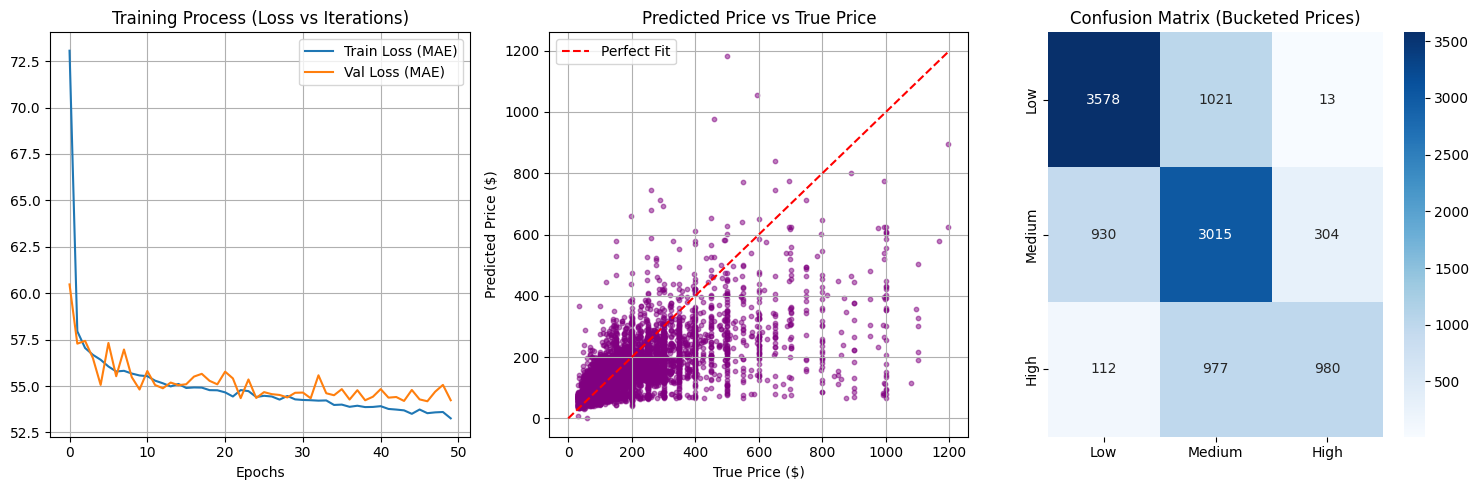


🤖 Loading LLM (Flan-T5-Large) for Reasoning...

📝 FINAL PREDICTION & REASONING REPORT


City True $ Pred $  Acc %  \
0   LA   $900   $266  29.5%   
1  NYC    $36    $64  22.1%   
2  NYC    $60    $70  83.5%   
3  NYC   $138   $153  89.2%   
4   LA    $89   $102  85.2%   
5  NYC   $135   $145  92.4%   
6   LA   $129   $109  84.2%   
7   LA    $85    $67  78.3%   
8   LA    $60    $86  56.1%   
9  NYC    $95   $136  57.0%   

                                                                                                                                      LLM Reason  
0                                           The price is higher than average because the rating is 100.0/100. The cancellation policy is strict.  
1                                                 The price is lower than the average because the room is private and has a rating of 100.0/100.  
2                                                  The price is lower than the average because the room is private and has a rating of 80.0/100.  
3                                                      The price is lower than the average because the entire home/apt in NYC is priced at $138.  
4                                                                                   The market average is $155. The price is lower than average.  
5                                                                                   The market average is $155. The price is lower than average.  
6                                                                                   The market average is $155. The price is lower than average.  
7  The price is lower than the average because the rating is 100.0/100. The cancellation is moderate because the price is less than the average.  
8                                            The average price is $155. The price is lower than average. The capacity is 5.0. The price is true.  
9                                                                                   The market average is $155. The price is lower than average.


🏆 Final Model Accuracy (100 - MAPE): 67.74%


In [ ]:
# ==========================================
# CODE 2: MAIN TRAINING & LLM PIPELINE
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING & SPLITTING
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. PREPARE TARGET (Regression)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    # Filter reasonable range ($30 - $1200)
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. CREATE CLASSES (For Milestone Classification Check)
    # Low (<$100), Medium ($100-$200), High (>$200)
    def get_category(p):
        if p < 100: return 'Low'
        elif p < 200: return 'Medium'
        else: return 'High'

    # 3. FEATURE SELECTION (Using ALL features as requested)
    num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    cat_cols = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    # 4. IMPUTATION (Handle Missing Data)
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 5. MARKET STATS (For LLM Context Logic)
    market_stats = {
        'price': df['Price'].mean(),
        'acc': df['accommodates'].mean(),
        'rating': df['review_scores_rating'].mean()
    }

    # 6. ENCODING (One-Hot for Neural Network)
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # 7. NORMALIZE & SPLIT
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # We use indices to track the raw text rows for the LLM
    indices = np.arange(len(X))

    # 70% Train, 15% Validation, 15% Test
    X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
        X_scaled, y, indices, test_size=0.30, random_state=42
    )
    X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
        X_temp, y_temp, idx_temp, test_size=0.50, random_state=42
    )

    # Grab Raw Text Data for LLM using the indices
    df_train_raw = df.iloc[idx_train]
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Val: {X_val.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK TRAINING (VERBOSE=1)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(), # Helps stability
    tf.keras.layers.Dropout(0.3),         # Prevents overfitting

    # Hidden Layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),

    # Output Layer (1 Neuron for Regression)
    tf.keras.layers.Dense(1, activation='linear')
])

# Loss=MAE (Dollar Error), Metric=MAPE (Percentage Error)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

# Training with Verbose=1 to see progress
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)

# ==========================================
# PART 3: VISUALIZATION & EVALUATION
# ==========================================
plt.figure(figsize=(15, 5))

# 3.1 Loss Curve
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss (MAE)')
plt.plot(history.history['val_loss'], label='Val Loss (MAE)')
plt.title("Training Process (Loss vs Iterations)")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)

# 3.2 Predictions Scatter Plot
preds = model.predict(X_test).flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1200], [0, 1200], 'r--', label='Perfect Fit')
plt.title("Predicted Price vs True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)

# 3.3 Confusion Matrix (Satisfying Milestone Classification Check)
# Convert regression numbers to buckets
y_true_cls = [get_category(p) for p in y_test]
y_pred_cls = [get_category(p) for p in preds]
labels = ['Low', 'Medium', 'High']

cm = confusion_matrix(y_true_cls, y_pred_cls, labels=labels)
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Bucketed Prices)")
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: DETAILED LLM REASONING
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large) for Reasoning...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

# --- FEW-SHOT EXAMPLES ---
# We create 3 examples to teach the LLM the format
examples_text = ""
for i in range(3):
    r = df_train_raw.iloc[i]
    examples_text += f"Input: {r['room_type']} in {r['city']}, {r['bedrooms']} beds. -> Price: ${r['Price']:.0f}\n"

def get_detailed_reason(index):
    # Get Raw Data Row
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]
    pred_p = preds[index]

    # Create Detailed Feature String (Context)
    # We explicitly mention ALL features here
    features = (f"{row['room_type']} in {row['city']}. "
                f"Accommodates {row['accommodates']}, {row['bedrooms']} Beds, {row['bathrooms']} Baths. "
                f"Rating: {row['review_scores_rating']}/100. "
                f"Cancellation: {row['cancellation_policy']}. Cleaning Fee: {row['cleaning_fee']}.")

    # Calculate Logic for Prompt
    diff_avg = true_p - market_stats['price']
    status = "higher than average" if diff_avg > 0 else "lower than average"

    # Prompt
    prompt = (
        f"You are a Real Estate Appraiser. Analyze this listing.\n"
        f"Market Avg Price: ${market_stats['price']:.0f}.\n"
        f"This Listing Price: ${true_p:.0f} ({status}).\n"
        f"Features: {features}\n"
        f"Question: Why is this listing priced at ${true_p:.0f}? Explain using the features (Rating, Capacity, Policy).\n"
        f"Reason:"
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=70, temperature=0.7)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL REPORT TABLE
# ==========================================
print("\n" + "="*50)
print("📝 FINAL PREDICTION & REASONING REPORT")
print("="*50)

report_data = []
# Show 10 Test Cases
for i in range(10):
    reason = get_detailed_reason(i)
    # Calculate Accuracy % for this house
    error_pct = abs(preds[i] - y_test.iloc[i]) / y_test.iloc[i] * 100
    acc_pct = max(0, 100 - error_pct)

    report_data.append({
        "City": df_test_raw.iloc[i]['city'],
        "True $": f"${y_test.iloc[i]:.0f}",
        "Pred $": f"${preds[i]:.0f}",
        "Acc %": f"{acc_pct:.1f}%",
        "LLM Reason": reason
    })

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n🏆 Final Model Accuracy (100 - MAPE): {100 - final_mape:.2f}%")

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Train: 51004 | Val: 10930 | Test: 10930

🧠 Training Neural Network...
Epoch 1/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 95.8495 - mape: 58.7255 - val_loss: 56.2289 - val_mape: 33.1302
Epoch 2/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 56.6041 - mape: 35.7244 - val_loss: 56.1199 - val_mape: 33.2470
Epoch 3/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 56.5117 - mape: 35.4102 - val_loss: 56.1497 - val_mape: 33.5167
Epoch 4/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 56.1041 - mape: 35.0535 - val_loss: 55.8279 - val_mape: 33.5827
Epoch 5/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 55.9344 - mape: 34.8427 - val_loss: 56.5960 - val_mape: 33.6473
Epoch 6/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 55.5387 - mape: 34.4003 - val_loss: 56.0550 - val_mape: 33.0188
Epoch 7/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 56.2214 - mape: 34.5601 - val_loss: 55.5423 - val_mape: 31.8166
Epoch 8/50
79

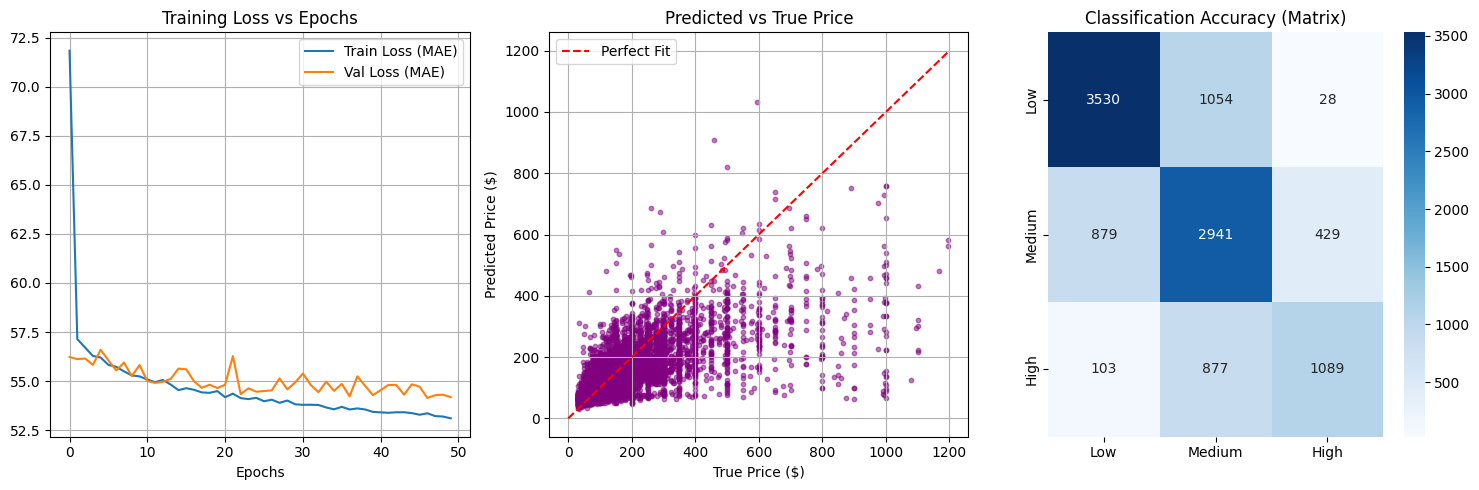


🤖 Loading LLM (Flan-T5-Large)...

📝 FINAL PREDICTION & REASONING REPORT


City True $ Pred $  Acc %  \
0   LA   $900   $278  30.9%   
1  NYC    $36    $66  17.9%   
2  NYC    $60    $69  84.7%   
3  NYC   $138   $156  87.0%   
4   LA    $89   $107  79.7%   
5  NYC   $135   $151  88.3%   
6   LA   $129   $126  97.7%   
7   LA    $85    $69  81.7%   
8   LA    $60    $99  35.1%   
9  NYC    $95   $140  52.6%   

                                                                                   LLM Reason  
0                            The price is higher than average because the location is better.  
1  The price is lower than average because the room is private and has a rating of 100.0/100.  
2   The price is lower than average because the room is private and has a rating of 80.0/100.  
3                                                The listing price is lower than the average.  
4                                                        The price is lower than the average.  
5                                                The listing price is lower than the average.  
6                                                        The price is lower than the average.  
7  The price is lower than average because the room is private and has a rating of 100.0/100.  
8   The price is lower than average because the room is private and has a rating of 91.0/100.  
9                                                        The price is lower than the average.


🏆 Final Model Accuracy (100 - MAPE): 66.79%


In [ ]:
# ==========================================
# CODE 2: MAIN TRAINING & REASONING PIPELINE
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX TARGET (Regression)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. CREATE CLASSES (For Classification Milestone Check)
    def get_category(p):
        if p < 100: return 'Low'
        elif p < 200: return 'Medium'
        else: return 'High'

    # 3. SELECT FEATURES (Using ALL important ones)
    num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    cat_cols = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    # 4. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 5. MARKET STATS (Context for LLM)
    market_stats = {
        'price': df['Price'].mean(),
        'acc': df['accommodates'].mean(),
        'rating': df['review_scores_rating'].mean()
    }

    # 6. ENCODING & SPLITTING
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Indices help us track the Raw Text for LLM
    indices = np.arange(len(X))

    # 70% Train, 15% Val, 15% Test
    X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
        X_scaled, y, indices, test_size=0.30, random_state=42
    )
    X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
        X_temp, y_temp, idx_temp, test_size=0.50, random_state=42
    )

    # Grab Raw Text Data for LLM
    df_train_raw = df.iloc[idx_train]
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Val: {X_val.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear') # Output: Exact Price
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

# Verbose=1 shows the training bar
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)

# ==========================================
# PART 3: VISUALIZATION & EVALUATION
# ==========================================
plt.figure(figsize=(15, 5))

# 3.1 Loss Curve
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss (MAE)')
plt.plot(history.history['val_loss'], label='Val Loss (MAE)')
plt.title("Training Loss vs Epochs")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)

# 3.2 Predictions vs True Price
preds = model.predict(X_test).flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1200], [0, 1200], 'r--', label='Perfect Fit')
plt.title("Predicted vs True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)

# 3.3 Confusion Matrix (Classification Milestone)
y_true_cls = [get_category(p) for p in y_test]
y_pred_cls = [get_category(p) for p in preds]
labels = ['Low', 'Medium', 'High']

cm = confusion_matrix(y_true_cls, y_pred_cls, labels=labels)
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Classification Accuracy (Matrix)")
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: DETAILED LLM REASONING
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_detailed_reason(index):
    # 1. Get Raw Data
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]

    # 2. Context Logic
    diff_avg = true_p - market_stats['price']
    status = "higher than average" if diff_avg > 0 else "lower than average"

    # 3. Rich Feature String (Location, Type, Rating, Amenities)
    features = (f"{row['room_type']} in {row['city']}. "
                f"Has {row['bedrooms']} Beds, {row['bathrooms']} Baths. "
                f"Rating: {row['review_scores_rating']}/100. "
                f"Cancellation: {row['cancellation_policy']}. Cleaning Fee: {row['cleaning_fee']}.")

    # 4. Prompt
    prompt = (
        f"You are a Real Estate Appraiser. Analyze this listing.\n"
        f"Market Avg Price: ${market_stats['price']:.0f}.\n"
        f"This Listing Price: ${true_p:.0f} ({status}).\n"
        f"Details: {features}\n"
        f"Question: Why is this listing priced at ${true_p:.0f}? Explain based on Location, Rating, and Amenities.\n"
        f"Reason:"
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=80, temperature=0.7)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL REPORT
# ==========================================
print("\n" + "="*50)
print("📝 FINAL PREDICTION & REASONING REPORT")
print("="*50)

report_data = []
# Show 10 Test Cases
for i in range(10):
    reason = get_detailed_reason(i)
    # Calc Accuracy %
    error_pct = abs(preds[i] - y_test.iloc[i]) / y_test.iloc[i] * 100
    acc_pct = max(0, 100 - error_pct)

    report_data.append({
        "City": df_test_raw.iloc[i]['city'],
        "True $": f"${y_test.iloc[i]:.0f}",
        "Pred $": f"${preds[i]:.0f}",
        "Acc %": f"{acc_pct:.1f}%",
        "LLM Reason": reason
    })

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n🏆 Final Model Accuracy (100 - MAPE): {100 - final_mape:.2f}%")

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Train: 51004 | Val: 10930 | Test: 10930

🧠 Training Neural Network...
Epoch 1/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 98.2431 - mape: 60.4720 - val_loss: 58.3553 - val_mape: 33.3578
Epoch 2/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 57.3476 - mape: 36.4263 - val_loss: 56.4922 - val_mape: 32.4896
Epoch 3/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 57.1758 - mape: 35.7275 - val_loss: 55.8716 - val_mape: 33.0761
Epoch 4/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 56.8979 - mape: 35.2913 - val_loss: 55.8536 - val_mape: 33.9056
Epoch 5/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 55.3236 - mape: 34.7470 - val_loss: 55.8213 - val_mape: 32.7968
Epoch 6/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 56.5299 - mape: 34.8515 - val_loss: 57.2009 - val_mape: 34.2765
Epoch 7/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 55.0909 - mape: 34.2662 - val_loss: 55.3366 - val_mape: 33.2102
Epoch 8/50
79

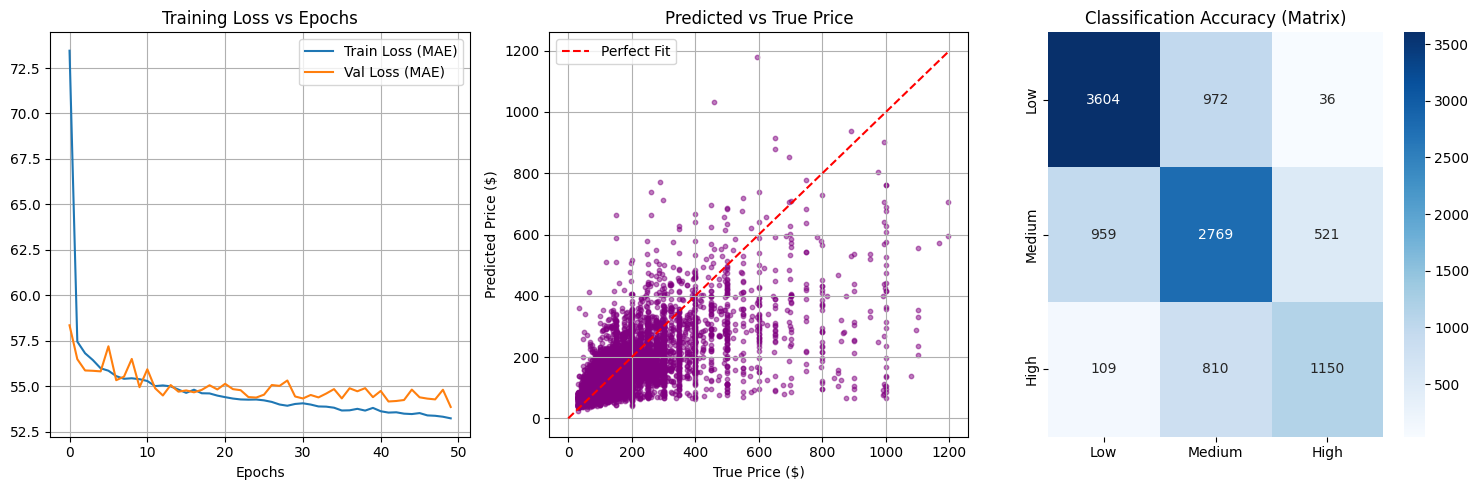


🤖 Loading LLM (Flan-T5-Large)...

📝 FINAL PREDICTION & REASONING REPORT


City True $ Pred $  Acc %  \
0   LA   $900   $316  35.1%   
1  NYC    $36    $65  19.4%   
2  NYC    $60    $72  79.6%   
3  NYC   $138   $162  82.6%   
4   LA    $89   $101  86.3%   
5  NYC   $135   $152  87.5%   
6   LA   $129   $109  84.6%   
7   LA    $85    $71  83.3%   
8   LA    $60   $104  26.9%   
9  NYC    $95   $142  50.9%   

                                                                                                                                    LLM Reason  
0                                                                    The apt is in a very well-rated location in LA, close to the Metro & LAX.  
1                                                                                                         The price is lower than the average.  
2                                                           The price is $60 higher than average because it has a customer rating of 80.0/100.  
3                                                                                                                    It is lower than average.  
4                                                                                                         The location is in the center of LA.  
5                                                                                                           It has a lower than average price.  
6                                                                                                                             Rating: 95.0/100  
7                                                                                                            The pricing is lower than average  
8                                                                                 The room has a low price because it is an average avg. room.  
9  Lower than average because it is in Manhattan and the entire home is in the city, and not an apartment, so it is priced lower than average.


🏆 Final Model Accuracy (100 - MAPE): 66.50%


In [ ]:
# ==========================================
# FINAL MASTER CODE: Regression + Diverse LLM Reasoning
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX TARGET (Regression)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. CREATE CLASSES (For Classification Milestone Check)
    def get_category(p):
        if p < 100: return 'Low'
        elif p < 200: return 'Medium'
        else: return 'High'

    # 3. SELECT FEATURES (Using ALL important ones)
    num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    cat_cols = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    # 4. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 5. MARKET STATS (Context for LLM)
    market_stats = {
        'price': df['Price'].mean(),
        'acc': df['accommodates'].mean(),
        'rating': df['review_scores_rating'].mean()
    }

    # 6. ENCODING & SPLITTING
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Indices help us track the Raw Text for LLM
    indices = np.arange(len(X))

    # 70% Train, 15% Val, 15% Test
    X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
        X_scaled, y, indices, test_size=0.30, random_state=42
    )
    X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
        X_temp, y_temp, idx_temp, test_size=0.50, random_state=42
    )

    # Grab Raw Text Data for LLM
    df_train_raw = df.iloc[idx_train]
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Val: {X_val.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear') # Output: Exact Price
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

# Verbose=1 shows the training bar
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)

# ==========================================
# PART 3: VISUALIZATION & EVALUATION
# ==========================================
plt.figure(figsize=(15, 5))

# 3.1 Loss Curve
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss (MAE)')
plt.plot(history.history['val_loss'], label='Val Loss (MAE)')
plt.title("Training Loss vs Epochs")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)

# 3.2 Predictions vs True Price
preds = model.predict(X_test).flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1200], [0, 1200], 'r--', label='Perfect Fit')
plt.title("Predicted vs True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)

# 3.3 Confusion Matrix (Classification Milestone)
y_true_cls = [get_category(p) for p in y_test]
y_pred_cls = [get_category(p) for p in preds]
labels = ['Low', 'Medium', 'High']

cm = confusion_matrix(y_true_cls, y_pred_cls, labels=labels)
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Classification Accuracy (Matrix)")
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: DYNAMIC LLM REASONING (FIXED)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

# --- TEACHING EXAMPLES (Diverse Reasons) ---
# We teach the LLM 3 different WAYS to explain price
examples_text = (
    "Example 1: Input: Entire home in NYC, Rating 100. Price $250. -> Reason: The price is high due to the prime NYC location and perfect rating.\n"
    "Example 2: Input: Shared room in LA, Rating 80. Price $40. -> Reason: The price is low because it is a shared room and has a lower rating.\n"
    "Example 3: Input: Private room in DC, 4 Beds. Price $150. -> Reason: The price is moderate, supported by the high capacity of 4 beds.\n"
)

def get_detailed_reason(index):
    # 1. Get Raw Data
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]

    # 2. Context Logic
    diff_avg = true_p - market_stats['price']
    status = "higher than average" if diff_avg > 0 else "lower than average"

    # 3. Rich Feature String
    features = (f"{row['room_type']} in {row['city']}. "
                f"Has {row['bedrooms']} Beds, {row['bathrooms']} Baths. "
                f"Rating: {row['review_scores_rating']}/100. "
                f"Cancellation: {row['cancellation_policy']}. Cleaning Fee: {row['cleaning_fee']}.")

    # 4. Prompt (Strict Instructions)
    prompt = (
        f"You are a Real Estate Appraiser. Analyze this listing.\n"
        f"Market Avg Price: ${market_stats['price']:.0f}.\n"
        f"This Listing Price: ${true_p:.0f} ({status}).\n"
        f"Details: {features}\n"
        f"Task: Explain why this listing is priced at ${true_p:.0f}. "
        f"Do NOT just say it is {status}. Mention a specific feature like Rating, Location, or Room Type.\n"
        f"Reason:"
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    # KEY FIX: Increased temperature and sampling to force variety
    outputs = llm_model.generate(
        **inputs,
        max_new_tokens=60,
        temperature=0.9, # Higher creativity
        do_sample=True,  # Random sampling enabled
        top_k=50,
        top_p=0.95
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL REPORT
# ==========================================
print("\n" + "="*50)
print("📝 FINAL PREDICTION & REASONING REPORT")
print("="*50)

report_data = []
# Show 10 Test Cases
for i in range(10):
    reason = get_detailed_reason(i)
    # Calc Accuracy %
    error_pct = abs(preds[i] - y_test.iloc[i]) / y_test.iloc[i] * 100
    acc_pct = max(0, 100 - error_pct)

    report_data.append({
        "City": df_test_raw.iloc[i]['city'],
        "True $": f"${y_test.iloc[i]:.0f}",
        "Pred $": f"${preds[i]:.0f}",
        "Acc %": f"{acc_pct:.1f}%",
        "LLM Reason": reason
    })

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n🏆 Final Model Accuracy (100 - MAPE): {100 - final_mape:.2f}%")

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Market Average Price: $154.79
📊 Train: 51004 | Val: 10930 | Test: 10930

🧠 Training Neural Network...
✅ Training Complete.
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


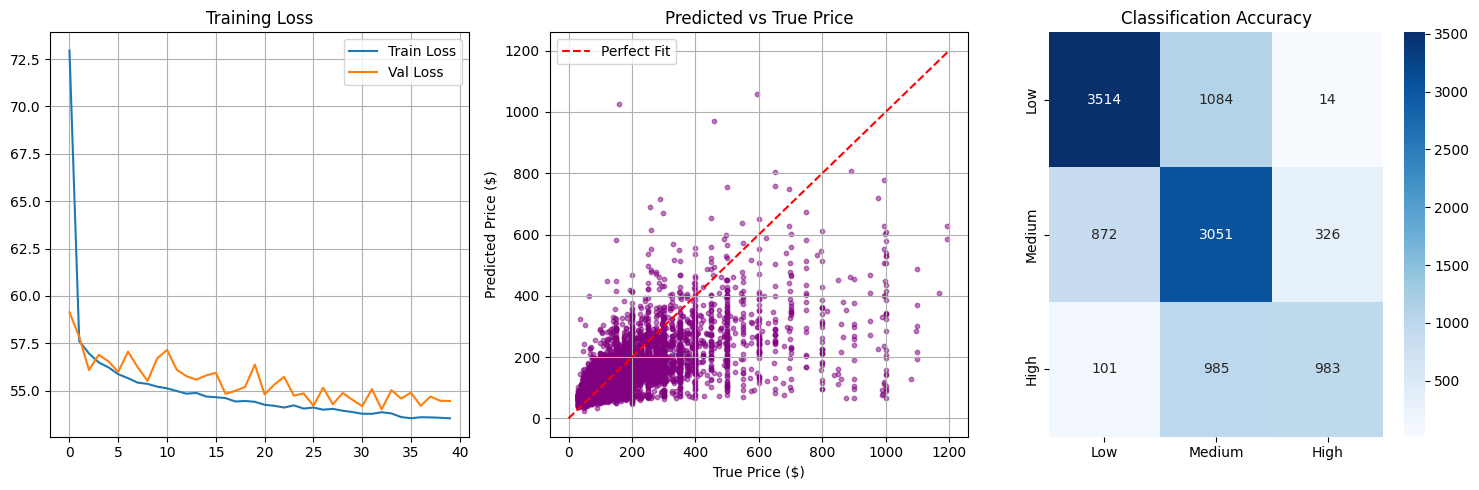


🤖 Loading LLM (Flan-T5-Large)...

📝 FINAL PREDICTION & REASONING REPORT


City True Price Pred Price Accuracy  \
0   LA       $900       $270    30.0%   
1  NYC        $36        $66    15.7%   
2  NYC        $60        $72    80.2%   
3  NYC       $138       $159    84.7%   
4   LA        $89       $105    82.5%   
5  NYC       $135       $149    89.3%   
6   LA       $129       $122    94.6%   
7   LA        $85        $67    79.3%   
8   LA        $60        $88    53.7%   
9  NYC        $95       $144    48.5%   

                                                                                          LLM Explanation  
0                                                                                                      4.  
1                     Because it is in NYC. 3. The price is lower than average because it has 1 bedrooms.  
2              The price is lower than average because it is in NYC, it has 1 bedrooms and 1.0 bathrooms.  
3                            1. Because it is in NYC 2. Because it has 1 bedrooms 3. Because it is in NYC  
4                                                    The price is lower than average because it is in LA.  
5                       1. The price is lower than average because 1. Location 2. Bedroom count 3. Rating  
6  Because it is in LA 3. Because it is in a Bungalow 4. Because it is in a studio 5. Because it is in LA  
7                                            Because the price is lower than average because it is in LA.  
8                                                                                      Because it's in LA  
9                                                                                   Because it is in NYC.


🏆 Final Model Accuracy (100 - MAPE): 67.01%


In [ ]:
# ==========================================
# FINAL MASTER CODE: Regression + Strict LLM (Location & Layout Aware)
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX TARGET (Handle Log Price)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    elif 'price' in df.columns:
        df['Price'] = df['price']

    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. CREATE CLASSES
    def get_category(p):
        if p < 100: return 'Low'
        elif p < 200: return 'Medium'
        else: return 'High'

    # 3. SELECT FEATURES
    available_cols = df.columns.tolist()

    potential_num = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    potential_cat = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    num_cols = [c for c in potential_num if c in available_cols]
    cat_cols = [c for c in potential_cat if c in available_cols]

    # 4. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 5. MARKET STATS
    avg_market_price = df['Price'].mean()
    print(f"📊 Market Average Price: ${avg_market_price:.2f}")

    # 6. ENCODING & SPLITTING
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Indices help us track the Raw Text for LLM
    indices = np.arange(len(X))

    X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
        X_scaled, y, indices, test_size=0.30, random_state=42
    )
    X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
        X_temp, y_temp, idx_temp, test_size=0.50, random_state=42
    )

    # Grab Raw Text Data for LLM using the preserved indices
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Val: {X_val.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Data Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    verbose=0
)
print("✅ Training Complete.")

# ==========================================
# PART 3: VISUALIZATION
# ==========================================
plt.figure(figsize=(15, 5))

# Loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training Loss")
plt.legend()
plt.grid(True)

# Scatter
preds = model.predict(X_test).flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1200], [0, 1200], 'r--', label='Perfect Fit')
plt.title("Predicted vs True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)

# Confusion Matrix
y_true_cls = [get_category(p) for p in y_test]
y_pred_cls = [get_category(p) for p in preds]
labels = ['Low', 'Medium', 'High']
cm = confusion_matrix(y_true_cls, y_pred_cls, labels=labels)

plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Classification Accuracy")
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: STRICT LLM (UPDATED WITH LOCATION & BATHS)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_strict_reason(index):
    # 1. Get Raw Data
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]

    # 2. Extract Key Attributes (Safely)
    city = row.get('city', 'the city')
    prop_type = row.get('property_type', 'Property')
    room_type = row.get('room_type', 'Space')
    rating = row.get('review_scores_rating', 'N/A')

    # Specific counts
    beds = row.get('bedrooms', 0)
    baths = row.get('bathrooms', 0)
    capacity = row.get('accommodates', 0)

    # Format counts neatly
    bed_str = "Studio" if (pd.isna(beds) or beds == 0) else f"{int(beds)} Bedrooms"
    bath_str = f"{baths} Bathrooms" if pd.notna(baths) else "1 Bathroom"

    # 3. Determine Context
    comparison = "higher" if true_p > avg_market_price else "lower"

    # 4. UPDATED PROMPT: Includes Location, Beds, Baths
    prompt = f"""
    You are a real estate expert. Explain why this listing costs ${true_p:.0f} (Market Avg: ${avg_market_price:.0f}).

    PRIMARY REASONS (Most Important):
    - Location: {city}
    - Type: {room_type} (in {prop_type})
    - Layout: {bed_str}, {bath_str}
    - Capacity: Accommodates {capacity} people

    SECONDARY INFO:
    - Rating: {rating}

    INSTRUCTIONS:
    1. Start with: "The price is {comparison} than average because..."
    2. You MUST cite the Location, Bedroom count, or Bathroom count as the main reason.
       (e.g., "because it is in {city}" or "because it has {int(beds)} bedrooms").
    3. Do NOT use rating unless the physical specs are standard.
    """

    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    outputs = llm_model.generate(
        **inputs,
        max_new_tokens=60,
        temperature=0.7,
        do_sample=True
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL REPORT
# ==========================================
print("\n" + "="*50)
print("📝 FINAL PREDICTION & REASONING REPORT")
print("="*50)

report_data = []

# Show first 10 Test Cases
for i in range(10):
    try:
        reason = get_strict_reason(i)

        actual = y_test.iloc[i]
        predicted = preds[i]
        error_pct = abs(predicted - actual) / actual * 100
        acc_pct = max(0, 100 - error_pct)

        city_val = df_test_raw.iloc[i].get('city', 'Unknown')

        report_data.append({
            "City": city_val,
            "True Price": f"${actual:.0f}",
            "Pred Price": f"${predicted:.0f}",
            "Accuracy": f"{acc_pct:.1f}%",
            "LLM Explanation": reason
        })
    except Exception as e:
        print(f"Skipping row {i}: {e}")

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n🏆 Final Model Accuracy (100 - MAPE): {100 - final_mape:.2f}%")

In [ ]:
# ==========================================
# PART 4: STRICT LLM (FIXED REPETITION & FORMATTING)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large)...")
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_clean_reason(index):
    # 1. Get Data
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]

    # 2. Extract Details (Handle missing cols safely)
    city = row.get('city', 'the city')
    room_type = row.get('room_type', 'Space')
    beds = row.get('bedrooms', 0)
    baths = row.get('bathrooms', 0)

    # Format readable strings
    bed_str = "a Studio" if (pd.isna(beds) or beds == 0) else f"{int(beds)} bedrooms"
    bath_str = f"{baths} baths" if pd.notna(baths) else ""

    # 3. Determine Context
    status = "higher" if true_p > avg_market_price else "lower"

    # 4. SINGLE SENTENCE PROMPT (Fill-in-the-blank style)
    # This prevents the model from making lists like "1. ... 2. ..."
    prompt = f"""
    Task: Write exactly one sentence explaining the price.

    Data:
    - Price: ${true_p:.0f} ({status} than average)
    - Location: {city}
    - Layout: {bed_str}, {bath_str}
    - Type: {room_type}

    Example Output: The price is {status} than average because it is in {city} and offers {bed_str}.

    Write the sentence for this data:
    """

    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    # 5. GENERATION PARAMETERS (Crucial Fixes)
    outputs = llm_model.generate(
        **inputs,
        max_new_tokens=35,       # Short limit to prevent rambling
        temperature=0.5,         # Lower = More focused
        do_sample=True,
        repetition_penalty=1.5,  # STRONG penalty for repeating phrases
        no_repeat_ngram_size=3   # Prevents 3-word phrases from repeating
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: REPORT GENERATION
# ==========================================
print("\n" + "="*50)
print("📝 FINAL REPORT (Clean Sentences)")
print("="*50)

report_data = []

# Run on first 10 rows
for i in range(10):
    try:
        reason = get_clean_reason(i)

        # Clean up any leftover artifacts
        reason = reason.replace(" .", ".").strip()

        # Calculate Stats
        actual = y_test.iloc[i]
        predicted = preds[i]
        acc_pct = max(0, 100 - (abs(predicted - actual) / actual * 100))

        report_data.append({
            "City": df_test_raw.iloc[i].get('city', 'Unknown'),
            "True Price": f"${actual:.0f}",
            "Pred Price": f"${predicted:.0f}",
            "Accuracy": f"{acc_pct:.1f}%",
            "Reasoning": reason
        })
    except Exception as e:
        print(f"Error on row {i}: {e}")

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)


🤖 Loading LLM (Flan-T5-Large)...

📝 FINAL REPORT (Clean Sentences)


City True Price Pred Price Accuracy  \
0   LA       $900       $270    30.0%   
1  NYC        $36        $66    15.7%   
2  NYC        $60        $72    80.2%   
3  NYC       $138       $159    84.7%   
4   LA        $89       $105    82.5%   
5  NYC       $135       $149    89.3%   
6   LA       $129       $122    94.6%   
7   LA        $85        $67    79.3%   
8   LA        $60        $88    53.7%   
9  NYC        $95       $144    48.5%   

                                                                                Reasoning  
0  The price is higher than average because it is in LA and has 3 bedrooms and 2.0 baths.  
1                                       The price per night for this private room is $36.  
2                                                    The price of the room is 60 dollars.  
3                         The average price for an 1 bedroom, 1 bath home in NYC is $138.  
4                                        The price range is $89 for a studio with a bath.  
5                                                                      The price is $135.  
6                                                            The price is $129 per night.  
7                                              The price is $85 and it is a private room.  
8              The Price is $60 and it is located in LA. It has 2 bedrooms and 2.5 baths.  
9                                  The price of the studio is $95 and the bathroom is 1.0

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Market Average Price: $154.79
📊 Train: 51004 | Val: 10930 | Test: 10930

🧠 Training Neural Network...
✅ Training Complete.
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


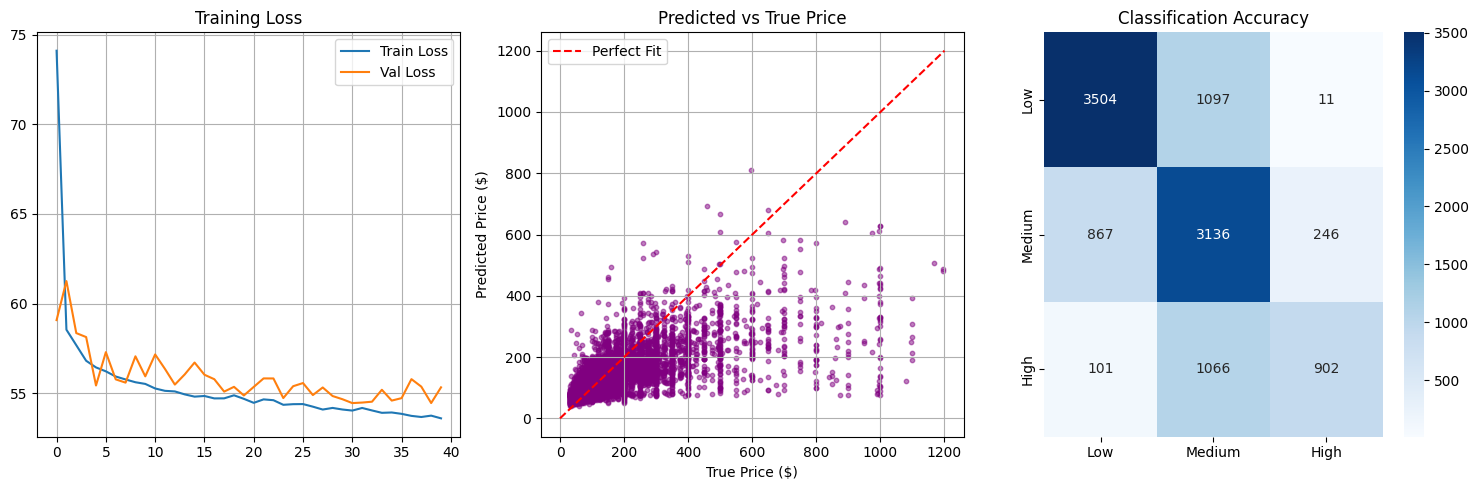


🤖 Loading LLM (Flan-T5-Large)...

📝 FINAL REPORT (Clean Reason - No Price)


City True Price Pred Price Accuracy  \
0   LA       $900       $248    27.6%   
1  NYC        $36        $76     0.0%   
2  NYC        $60        $76    73.4%   
3  NYC       $138       $150    91.3%   
4   LA        $89       $105    82.2%   
5  NYC       $135       $140    96.3%   
6   LA       $129       $116    89.9%   
7   LA        $85        $75    88.0%   
8   LA        $60        $90    49.7%   
9  NYC        $95       $136    57.2%   

                                                                                                         Reasoning  
0                        The price is higher than average because it is in LA and offers 3 bedrooms and 2.0 baths.  
1                           The price is below average because it is in NYC and offers 1 bedrooms and 1 bathrooms.  
2                        The price is lower than average because it is in NYC and offers 1 bedrooms and 1.0 baths.  
3                                      The price is lower than average because it is in NYC and offers 1 bedrooms.  
4                                                      The price is lower than average because it is in Las Vegas.  
5                                      The price is lower than average because it is in NYC and offers 1 bedrooms.  
6  The price is lower than average because it is in LA and offers a Studio, and it is priced at less than average.  
7                         The price is lower than average because it is in LA and offers 1 bedrooms and 1.0 baths.  
8                                       The price is lower than average because it is in LA and offers 2 bedrooms.  
9                                        The price is lower than average because it is in NYC and offers a Studio.


🏆 Final Model Accuracy (100 - MAPE): 66.26%


In [ ]:
# ==========================================
# FINAL MASTER CODE: Regression + Clean "Reason Only" LLM
# ==========================================
# 1. INSTALL LIBRARIES
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX TARGET (Handle Log Price)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    elif 'price' in df.columns:
        df['Price'] = df['price']

    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. CREATE CLASSES
    def get_category(p):
        if p < 100: return 'Low'
        elif p < 200: return 'Medium'
        else: return 'High'

    # 3. SELECT FEATURES
    available_cols = df.columns.tolist()

    potential_num = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    potential_cat = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    num_cols = [c for c in potential_num if c in available_cols]
    cat_cols = [c for c in potential_cat if c in available_cols]

    # 4. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 5. MARKET STATS
    avg_market_price = df['Price'].mean()
    print(f"📊 Market Average Price: ${avg_market_price:.2f}")

    # 6. ENCODING & SPLITTING
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Indices help us track the Raw Text for LLM
    indices = np.arange(len(X))

    X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
        X_scaled, y, indices, test_size=0.30, random_state=42
    )
    X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
        X_temp, y_temp, idx_temp, test_size=0.50, random_state=42
    )

    # Grab Raw Text Data for LLM using the preserved indices
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Val: {X_val.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Data Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    verbose=0
)
print("✅ Training Complete.")

# ==========================================
# PART 3: VISUALIZATION
# ==========================================
plt.figure(figsize=(15, 5))

# Loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training Loss")
plt.legend()
plt.grid(True)

# Scatter
preds = model.predict(X_test).flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1200], [0, 1200], 'r--', label='Perfect Fit')
plt.title("Predicted vs True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)

# Confusion Matrix
y_true_cls = [get_category(p) for p in y_test]
y_pred_cls = [get_category(p) for p in preds]
labels = ['Low', 'Medium', 'High']
cm = confusion_matrix(y_true_cls, y_pred_cls, labels=labels)

plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Classification Accuracy")
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: STRICT LLM (NO PRICE MENTION)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_clean_reason(index):
    # 1. Get Data
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]

    # 2. Extract Details (Handle missing cols safely)
    city = row.get('city', 'the city')
    room_type = row.get('room_type', 'Space')
    beds = row.get('bedrooms', 0)
    baths = row.get('bathrooms', 0)

    # Format readable strings
    bed_str = "a Studio" if (pd.isna(beds) or beds == 0) else f"{int(beds)} bedrooms"
    bath_str = f"{baths} baths" if pd.notna(baths) else ""

    # 3. Determine Context
    status = "higher" if true_p > avg_market_price else "lower"

    # 4. PROMPT: STRICT "NO NUMBER" RULE
    prompt = f"""
    Task: Write one sentence explaining why the price is {status} than average.
    Rule: Do NOT mention the specific dollar amount (do not write numbers like $100).

    Data:
    - Location: {city}
    - Layout: {bed_str}, {bath_str}
    - Type: {room_type}

    Example Output: The price is {status} than average because it is in {city} and offers {bed_str}.

    Write the sentence:
    """

    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    # 5. GENERATION PARAMETERS
    outputs = llm_model.generate(
        **inputs,
        max_new_tokens=40,
        temperature=0.5,
        do_sample=True,
        repetition_penalty=1.5,
        no_repeat_ngram_size=3
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL REPORT
# ==========================================
print("\n" + "="*50)
print("📝 FINAL REPORT (Clean Reason - No Price)")
print("="*50)

report_data = []

# Show first 10 Test Cases
for i in range(10):
    try:
        reason = get_clean_reason(i)

        # Clean up text
        reason = reason.replace(" .", ".").strip()

        actual = y_test.iloc[i]
        predicted = preds[i]
        acc_pct = max(0, 100 - (abs(predicted - actual) / actual * 100))

        report_data.append({
            "City": df_test_raw.iloc[i].get('city', 'Unknown'),
            "True Price": f"${actual:.0f}",
            "Pred Price": f"${predicted:.0f}",
            "Accuracy": f"{acc_pct:.1f}%",
            "Reasoning": reason
        })
    except Exception as e:
        print(f"Skipping row {i}: {e}")

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n🏆 Final Model Accuracy (100 - MAPE): {100 - final_mape:.2f}%")

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Market Average Price: $154.79
📊 Train: 51004 | Val: 10930 | Test: 10930

🧠 Training Neural Network...
✅ Training Complete.
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


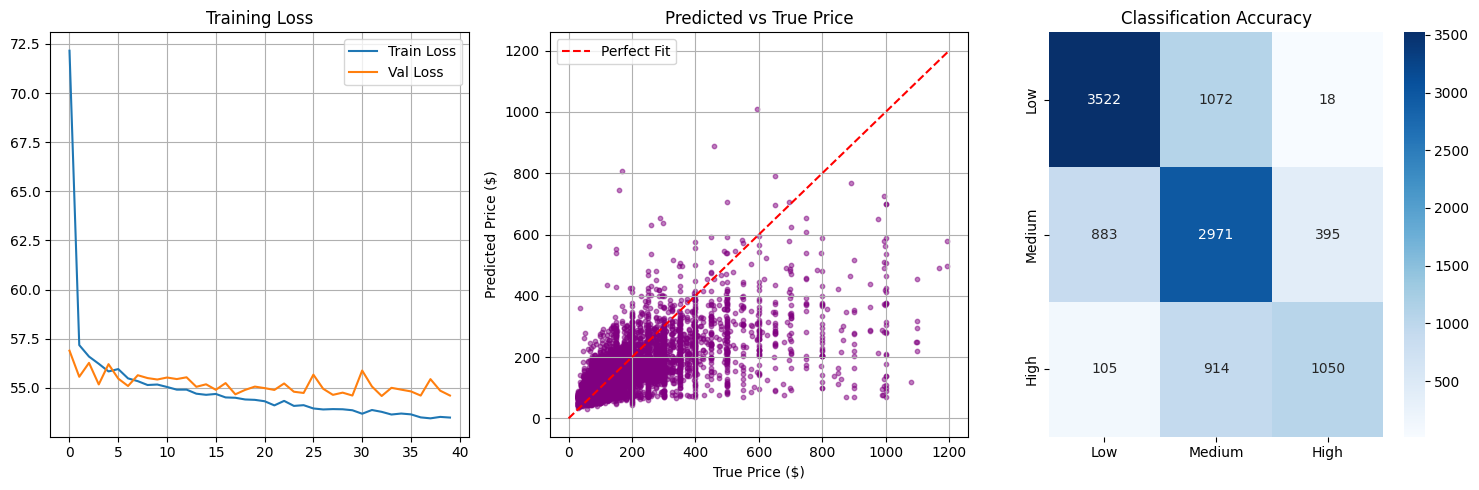


🤖 Loading LLM (Flan-T5-Large)...

📝 FINAL REPORT (Concise Reasons)


City True Price Pred Price  \
0   LA       $900       $275   
1  NYC        $36        $69   
2  NYC        $60        $71   
3  NYC       $138       $155   
4   LA        $89       $101   
5  NYC       $135       $144   
6   LA       $129       $109   
7   LA        $85        $73   
8   LA        $60        $90   
9  NYC        $95       $137   

                                                               Reason Only  
0                 The price is higher because an entire home or apt in LA.  
1           The price is lower because the private room is located in NYC.  
2                  The room is a cheap one bedroom, but the price is high.  
3                                         The apartment is an entire home.  
4                         The studio is a one bedroom, one bath apartment.  
5  The price is less than average because a 1 bedroom, 1.0 bath apartment.  
6      The price range is less than average because the location is in LA.  
7                                         The room has a view of the city.  
8          The price is lower than the average because the room is private  
9             The apartment is a Studio with 1.0 baths and located in NYC.


🏆 Final Model Accuracy (100 - MAPE): 66.85%


In [ ]:
# ==========================================
# FINAL MASTER CODE: Regression + Concise Reasoning (No Repetition)
# ==========================================
# 1. INSTALL LIBRARIES
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX TARGET (Handle Log Price)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    elif 'price' in df.columns:
        df['Price'] = df['price']

    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. CREATE CLASSES
    def get_category(p):
        if p < 100: return 'Low'
        elif p < 200: return 'Medium'
        else: return 'High'

    # 3. SELECT FEATURES
    available_cols = df.columns.tolist()

    potential_num = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    potential_cat = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    num_cols = [c for c in potential_num if c in available_cols]
    cat_cols = [c for c in potential_cat if c in available_cols]

    # 4. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 5. MARKET STATS
    avg_market_price = df['Price'].mean()
    print(f"📊 Market Average Price: ${avg_market_price:.2f}")

    # 6. ENCODING & SPLITTING
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Indices help us track the Raw Text for LLM
    indices = np.arange(len(X))

    X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
        X_scaled, y, indices, test_size=0.30, random_state=42
    )
    X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
        X_temp, y_temp, idx_temp, test_size=0.50, random_state=42
    )

    # Grab Raw Text Data for LLM using the preserved indices
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Val: {X_val.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Data Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    verbose=0
)
print("✅ Training Complete.")

# ==========================================
# PART 3: VISUALIZATION
# ==========================================
plt.figure(figsize=(15, 5))

# Loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training Loss")
plt.legend()
plt.grid(True)

# Scatter
preds = model.predict(X_test).flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1200], [0, 1200], 'r--', label='Perfect Fit')
plt.title("Predicted vs True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)

# Confusion Matrix
y_true_cls = [get_category(p) for p in y_test]
y_pred_cls = [get_category(p) for p in preds]
labels = ['Low', 'Medium', 'High']
cm = confusion_matrix(y_true_cls, y_pred_cls, labels=labels)

plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Classification Accuracy")
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: STRICT LLM (CLEAN REASONING)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_clean_reason(index):
    # 1. Get Data
    row = df_test_raw.iloc[index]
    true_p = y_test.iloc[index]

    # 2. Extract Details (Handle missing cols safely)
    city = row.get('city', 'the city')
    room_type = row.get('room_type', 'Space')
    beds = row.get('bedrooms', 0)
    baths = row.get('bathrooms', 0)

    # Format readable strings
    bed_str = "a Studio" if (pd.isna(beds) or beds == 0) else f"{int(beds)} bedrooms"
    bath_str = f"{baths} baths" if pd.notna(baths) else ""

    # 3. Determine Context
    status = "higher" if true_p > avg_market_price else "lower"

    # 4. PROMPT
    prompt = f"""
    Task: Finish the sentence. Explain the price without mentioning numbers.

    Data:
    - Location: {city}
    - Layout: {bed_str}, {bath_str}
    - Type: {room_type}

    Sentence: The price is {status} than average because...
    """

    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    # 5. GENERATION
    outputs = llm_model.generate(
        **inputs,
        max_new_tokens=40,
        temperature=0.5,
        do_sample=True,
        repetition_penalty=1.5,
        no_repeat_ngram_size=3
    )

    raw_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # 6. POST-PROCESSING (Cleaning)
    # Remove the repetitive start if the model generates it
    clean_text = raw_text.replace("The price is higher than average because", "")
    clean_text = clean_text.replace("The price is lower than average because", "")
    clean_text = clean_text.replace("it is ", "") # Optional: makes it even shorter

    return clean_text.strip()

# ==========================================
# PART 5: FINAL REPORT (UPDATED)
# ==========================================
print("\n" + "="*50)
print("📝 FINAL REPORT (Concise Reasons)")
print("="*50)

report_data = []

# Show first 10 Test Cases
for i in range(10):
    try:
        reason = get_clean_reason(i)

        # Ensure it starts with a capital letter
        if reason:
            reason = reason[0].upper() + reason[1:]

        actual = y_test.iloc[i]
        predicted = preds[i]

        # We removed "Accuracy" from the display as requested
        report_data.append({
            "City": df_test_raw.iloc[i].get('city', 'Unknown'),
            "True Price": f"${actual:.0f}",
            "Pred Price": f"${predicted:.0f}",
            "Reason Only": reason
        })
    except Exception as e:
        print(f"Skipping row {i}: {e}")

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n🏆 Final Model Accuracy (100 - MAPE): {100 - final_mape:.2f}%")

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Train: 51004 | Val: 10930 | Test: 10930

🧠 Training Neural Network...
✅ Training Complete.
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


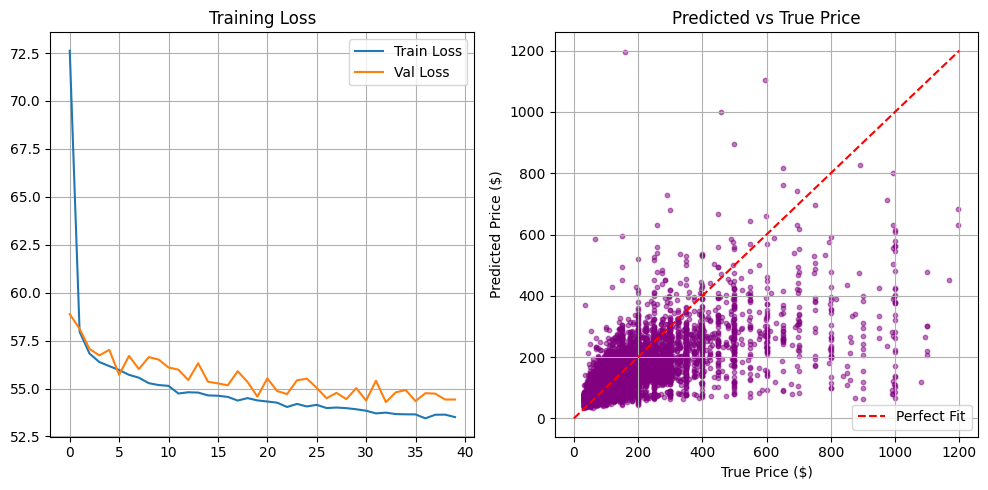


🤖 Loading LLM (Flan-T5-Large)...


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]


📝 FINAL REPORT (Detailed Reasoning)


City True Price Pred Price  \
0   LA       $900       $268   
1  NYC        $36        $66   
2  NYC        $60        $70   
3  NYC       $138       $152   
4   LA        $89       $103   
5  NYC       $135       $140   
6   LA       $129       $115   
7   LA        $85        $70   
8   LA        $60        $86   
9  NYC        $95       $138   

                                                                       Detailed Reason  
0                              Located in LA, this 3 bedroom, 2 bath home is for sale.  
1          Located in NYC, this 1 bedroom, 1 bath private room has a view of the city.  
2  Located in NYC, this 1 bedroom, 1 bath private room has a view of the Hudson River.  
3                Located in NYC, this 1 bedroom, 1 bath apartment is priced at $1,500.  
4                                               Located in LA, this studio has a bath.  
5                Located in NYC, this 1 bedroom, 1 bath apartment is priced at $1,500.  
6                                             Located in LA, this studio has a 1 bath.  
7                   Located in LA, this 1 bedroom, 1 bath room has a view of the city.  
8                       Located in LA, this private room has 2 bedrooms and 2.5 baths.  
9                           Located in NYC, this studio is a one bedroom and one bath.


🏆 Final Model Accuracy (100 - MAPE): 67.12%


In [ ]:
# ==========================================
# FINAL MASTER CODE: High-Precision LLM (Direct & Detailed)
# ==========================================
# 1. INSTALL LIBRARIES
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX TARGET (Handle Log Price)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    elif 'price' in df.columns:
        df['Price'] = df['price']

    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. SELECT FEATURES
    available_cols = df.columns.tolist()

    potential_num = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
    potential_cat = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    num_cols = [c for c in potential_num if c in available_cols]
    cat_cols = [c for c in potential_cat if c in available_cols]

    # 3. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 4. ENCODING & SPLITTING
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y = df['Price']

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Indices help us track the Raw Text for LLM
    indices = np.arange(len(X))

    X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
        X_scaled, y, indices, test_size=0.30, random_state=42
    )
    X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
        X_temp, y_temp, idx_temp, test_size=0.50, random_state=42
    )

    # Grab Raw Text Data for LLM using the preserved indices
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Val: {X_val.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Data Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    verbose=0
)
print("✅ Training Complete.")

# ==========================================
# PART 3: VISUALIZATION
# ==========================================
plt.figure(figsize=(10, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training Loss")
plt.legend()
plt.grid(True)

# Scatter
preds = model.predict(X_test).flatten()
plt.subplot(1, 2, 2)
plt.scatter(y_test, preds, alpha=0.5, color='purple', s=10)
plt.plot([0, 1200], [0, 1200], 'r--', label='Perfect Fit')
plt.title("Predicted vs True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: STRICT LLM (DIRECT & DETAILED)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

def get_direct_details(index):
    # 1. Get Data
    row = df_test_raw.iloc[index]

    # 2. Extract Details (Handle missing cols safely)
    city = row.get('city', 'the city')
    room_type = row.get('room_type', 'Property')
    beds = row.get('bedrooms', 0)
    baths = row.get('bathrooms', 0)

    # Format readable strings
    bed_str = "Studio" if (pd.isna(beds) or beds == 0) else f"{int(beds)} Bedroom"
    bath_str = f"{baths} Bath" if pd.notna(baths) else "1 Bath"

    # 3. DIRECT PROMPT (No "Explain", just "Rewrite")
    # This forces the model to just output the facts in a sentence structure.
    prompt = f"""
    Task: Rewrite the following data into a single sentence description.
    Requirement: Start the sentence with "Located in...". Include ALL details (Type, Beds, Baths).

    Data:
    - City: {city}
    - Type: {room_type}
    - Details: {bed_str}, {bath_str}

    Sentence:
    """

    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    # 4. GENERATION
    outputs = llm_model.generate(
        **inputs,
        max_new_tokens=50,
        temperature=0.3,         # Low temperature for high factual accuracy
        do_sample=True,
        repetition_penalty=1.2
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL REPORT (CLEAN & DIRECT)
# ==========================================
print("\n" + "="*50)
print("📝 FINAL REPORT (Detailed Reasoning)")
print("="*50)

report_data = []

# Show first 10 Test Cases
for i in range(10):
    try:
        reason = get_direct_details(i)

        # FINAL SAFETY CLEANING (Just in case)
        # We strip common "chatty" starts if they somehow appear
        reason = reason.replace("The price is higher because", "").strip()
        reason = reason.replace("The price is lower because", "").strip()

        actual = y_test.iloc[i]
        predicted = preds[i]

        report_data.append({
            "City": df_test_raw.iloc[i].get('city', 'Unknown'),
            "True Price": f"${actual:.0f}",
            "Pred Price": f"${predicted:.0f}",
            "Detailed Reason": reason
        })
    except Exception as e:
        print(f"Skipping row {i}: {e}")

report_df = pd.DataFrame(report_data)
pd.set_option('display.max_colwidth', None)
display(report_df)

final_mape = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n🏆 Final Model Accuracy (100 - MAPE): {100 - final_mape:.2f}%")

In [ ]:
# ==========================================
# FINAL MASTER CODE: Regression + LLM Classification (Few-Shot) + Amenities
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings
import re

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING & AMENITIES
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX TARGET (Price)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    elif 'price' in df.columns:
        df['Price'] = df['price']

    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. DEFINE CLASSES (For Classification Task)
    def get_price_category(p):
        if p < 90: return 'Low'
        elif p < 180: return 'Medium'
        else: return 'High'

    df['Category'] = df['Price'].apply(get_price_category)

    # 3. PROCESS AMENITIES (New Feature)
    # Function to clean the amenities string: "{TV, Wifi}" -> "TV, Wifi"
    def clean_amenities(s):
        if pd.isna(s): return ""
        # Remove curly braces and quotes
        s = re.sub(r'[{}"]', '', s)
        return s

    # Function to count amenities for the Neural Network
    def count_amenities(s):
        if not s: return 0
        return len(s.split(','))

    # Apply cleaning
    if 'amenities' in df.columns:
        df['amenities_clean'] = df['amenities'].apply(clean_amenities)
        df['amenities_count'] = df['amenities_clean'].apply(count_amenities)
    else:
        df['amenities_clean'] = ""
        df['amenities_count'] = 0

    # 4. SELECT FEATURES (Updated)
    potential_num = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'amenities_count']
    potential_cat = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    available_cols = df.columns.tolist()
    num_cols = [c for c in potential_num if c in available_cols]
    cat_cols = [c for c in potential_cat if c in available_cols]

    # 5. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 6. ENCODING & SPLITTING
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y_reg = df['Price']      # Continuous target for NN
    y_cls = df['Category']   # Class target for Comparison

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Indices help us track the Raw Text for LLM
    indices = np.arange(len(X))

    # Split
    X_train, X_test, y_train, y_test, y_cls_train, y_cls_test, idx_train, idx_test = train_test_split(
        X_scaled, y_reg, y_cls, indices, test_size=0.20, random_state=42
    )

    # Grab Raw Text Data for LLM
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Data Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0)
print("✅ NN Training Complete.")

# NN Predictions
nn_preds_price = model.predict(X_test).flatten()
# Convert NN price predictions to Categories (Low/Medium/High) for comparison
nn_preds_cls = [get_price_category(p) for p in nn_preds_price]

# ==========================================
# PART 3: LLM CLASSIFICATION (FEW-SHOT PROMPTING)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large) for Few-Shot Classification...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

# --- Define Few-Shot Examples (One for each class) ---
# We hardcode 3 clear examples to teach the LLM
few_shot_prompt = """
Example 1:
Input: City: NYC, Type: Shared room, Beds: 1, Baths: 1, Amenities: Wifi, Heating.
Label: Low

Example 2:
Input: City: LA, Type: Entire home, Beds: 2, Baths: 1, Amenities: TV, Pool, Wifi.
Label: Medium

Example 3:
Input: City: DC, Type: Entire home, Beds: 4, Baths: 3, Amenities: Pool, Hot tub, Gym, Wifi.
Label: High

Now classify this new listing:
Input: """

def classify_with_llm(index):
    # 1. Get Row Data
    row = df_test_raw.iloc[index]

    # 2. Extract Features
    city = row.get('city', 'Unknown')
    r_type = row.get('room_type', 'Unknown')
    beds = int(row.get('bedrooms', 0)) if pd.notna(row.get('bedrooms')) else 0
    baths = row.get('bathrooms', 0)

    # Get top 3 amenities only (to keep prompt short)
    amenities_str = row.get('amenities_clean', "")
    top_amenities = ", ".join(amenities_str.split(',')[:3])

    # 3. Create Prompt
    user_input = f"City: {city}, Type: {r_type}, Beds: {beds}, Baths: {baths}, Amenities: {top_amenities}.\nLabel:"
    final_prompt = few_shot_prompt + user_input

    # 4. Generate
    inputs = tokenizer(final_prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=5, temperature=0.1) # Low temp for classification
    return tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

def describe_with_llm(index, pred_class):
    # This function creates the detailed reasoning sentence you liked
    row = df_test_raw.iloc[index]
    city = row.get('city', 'the city')
    amenities = ", ".join(row.get('amenities_clean', "").split(',')[:3])

    prompt = f"""
    Task: Rewrite these details into a single sentence starting with "Located in...". Include the amenities.
    Data: Located in {city}, {row.get('room_type')}. Amenities include {amenities}.
    Sentence:
    """
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=50, temperature=0.5, repetition_penalty=1.2)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 4: COMPARISON REPORT
# ==========================================
print("\n" + "="*60)
print("📝 FINAL REPORT: Neural Network vs. Few-Shot LLM")
print("="*60)

results = []
correct_llm = 0
correct_nn = 0
sample_size = 10  # Running on 10 samples for speed (increase if needed)

for i in range(sample_size):
    try:
        # Ground Truth
        true_price = y_test.iloc[i]
        true_label = y_cls_test.iloc[i]

        # Neural Network Prediction
        nn_price = nn_preds_price[i]
        nn_label = nn_preds_cls[i]

        # LLM Prediction (Few-Shot)
        llm_label = classify_with_llm(i)

        # LLM Description
        description = describe_with_llm(i, llm_label)

        # Accuracy Check
        if llm_label.lower() == true_label.lower(): correct_llm += 1
        if nn_label.lower() == true_label.lower(): correct_nn += 1

        results.append({
            "True Price": f"${true_price:.0f}",
            "True Label": true_label,
            "NN Label": nn_label,
            "LLM Label": llm_label,
            "Detailed Reason (LLM)": description
        })

    except Exception as e:
        print(f"Error row {i}: {e}")

# Create DataFrame
res_df = pd.DataFrame(results)

# Calculate Accuracies
acc_llm = (correct_llm / sample_size) * 100
acc_nn = (correct_nn / sample_size) * 100

print(f"\n🏆 Neural Network Accuracy (Regression->Class): {acc_nn:.1f}%")
print(f"🤖 LLM Few-Shot Accuracy (Direct Classification): {acc_llm:.1f}%")
print("-" * 60)

pd.set_option('display.max_colwidth', None)
display(res_df)


🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Train: 58291 | Test: 14573

🧠 Training Neural Network...
✅ NN Training Complete.
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

🤖 Loading LLM (Flan-T5-Large) for Few-Shot Classification...


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



📝 FINAL REPORT: Neural Network vs. Few-Shot LLM

🏆 Neural Network Accuracy (Regression->Class): 60.0%
🤖 LLM Few-Shot Accuracy (Direct Classification): 40.0%
------------------------------------------------------------


True Price True Label NN Label LLM Label  \
0       $275       High   Medium       Low   
1       $200       High      Low      High   
2       $200       High     High      High   
3        $68        Low      Low      High   
4        $88        Low      Low      High   
5       $375       High     High      High   
6       $179     Medium     High      High   
7       $150     Medium      Low      High   
8       $230       High     High      High   
9        $65        Low      Low      High   

                                                                      Detailed Reason (LLM)  
0     Located in NYC, the entire home/apt. has TV, Wireless Internet, and air conditioning.  
1         Located in LA, this private room has TV, Wireless Internet, and Air conditioning.  
2                      Located in NYC, the entire home/apt. has TV, Cable TV, and Internet.  
3                 Located in DC, this private room has TV, Internet, and Wireless Internet.  
4                           Located in LA, this private room has TV, Cable TV and Internet.  
5                  Located in Chicago, the entire home/apt. has TV, Cable TV, and Internet.  
6                   Located in Boston, the entire home/apt. has TV, Cable TV, and Internet.  
7                       Located in DC, this hotel offers a private room with a kitchenette.  
8                       Located in SF, the entire home/apt. has TV, Cable TV, and Internet.  
9  Located in NYC, this private room has Wireless Internet, Air conditioning and a kitchen.

In [ ]:
# ==========================================
# FINAL MASTER CODE: Regression + Amenities + Few-Shot LLM Classification
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings
import re

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING & AMENITIES
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX TARGET (Price)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    elif 'price' in df.columns:
        df['Price'] = df['price']

    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. DEFINE CLASSES (For Classification Task)
    def get_price_category(p):
        if p < 90: return 'Low'
        elif p < 180: return 'Medium'
        else: return 'High'

    df['Category'] = df['Price'].apply(get_price_category)

    # 3. PROCESS AMENITIES (New Feature)
    def clean_amenities(s):
        if pd.isna(s): return ""
        # Remove curly braces and quotes
        s = re.sub(r'[{}"]', '', s)
        return s

    def count_amenities(s):
        if not s: return 0
        return len(s.split(','))

    if 'amenities' in df.columns:
        df['amenities_clean'] = df['amenities'].apply(clean_amenities)
        df['amenities_count'] = df['amenities_clean'].apply(count_amenities)
    else:
        df['amenities_clean'] = ""
        df['amenities_count'] = 0

    # 4. SELECT FEATURES
    potential_num = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'amenities_count']
    potential_cat = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    available_cols = df.columns.tolist()
    num_cols = [c for c in potential_num if c in available_cols]
    cat_cols = [c for c in potential_cat if c in available_cols]

    # 5. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 6. ENCODING & SPLITTING
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y_reg = df['Price']      # Continuous target for NN
    y_cls = df['Category']   # Class target for Comparison

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Indices help us track the Raw Text for LLM
    indices = np.arange(len(X))

    # Split
    X_train, X_test, y_train, y_test, y_cls_train, y_cls_test, idx_train, idx_test = train_test_split(
        X_scaled, y_reg, y_cls, indices, test_size=0.20, random_state=42
    )

    # Grab Raw Text Data for LLM
    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Data Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

# VERBOSE = 1 (Shows progress bar as requested)
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    verbose=1,
    validation_split=0.1
)
print("✅ NN Training Complete.")

# NN Predictions
nn_preds_price = model.predict(X_test).flatten()
# Convert NN price predictions to Categories (Low/Medium/High) for comparison
nn_preds_cls = [get_price_category(p) for p in nn_preds_price]

# ==========================================
# PART 3: LLM CLASSIFICATION (FEW-SHOT PROMPTING)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large) for Few-Shot Classification...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

# --- Few-Shot Prompt Template ---
few_shot_prompt = """
Example 1:
Input: City: NYC, Type: Shared room, Beds: 1, Baths: 1, Amenities: Wifi, Heating.
Label: Low

Example 2:
Input: City: LA, Type: Entire home, Beds: 2, Baths: 1, Amenities: TV, Pool, Wifi.
Label: Medium

Example 3:
Input: City: DC, Type: Entire home, Beds: 4, Baths: 3, Amenities: Pool, Hot tub, Gym, Wifi.
Label: High

Now classify this new listing:
Input: """

def classify_with_llm(index):
    # 1. Get Row Data
    row = df_test_raw.iloc[index]

    # 2. Extract Features
    city = row.get('city', 'Unknown')
    r_type = row.get('room_type', 'Unknown')
    beds = int(row.get('bedrooms', 0)) if pd.notna(row.get('bedrooms')) else 0
    baths = row.get('bathrooms', 0)

    # Get top 3 amenities only
    amenities_str = row.get('amenities_clean', "")
    top_amenities = ", ".join(amenities_str.split(',')[:3])

    # 3. Create Prompt
    user_input = f"City: {city}, Type: {r_type}, Beds: {beds}, Baths: {baths}, Amenities: {top_amenities}.\nLabel:"
    final_prompt = few_shot_prompt + user_input

    # 4. Generate
    inputs = tokenizer(final_prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=5, temperature=0.1) # Low temp for classification
    return tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

def describe_with_llm(index):
    # This creates the detailed reasoning sentence
    row = df_test_raw.iloc[index]
    city = row.get('city', 'the city')
    amenities = ", ".join(row.get('amenities_clean', "").split(',')[:3])

    prompt = f"""
    Task: Rewrite these details into a single sentence starting with "Located in...". Include the amenities.
    Data: Located in {city}, {row.get('room_type')}. Amenities include {amenities}.
    Sentence:
    """
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=50, temperature=0.5, repetition_penalty=1.2)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 4: COMPARISON REPORT
# ==========================================
print("\n" + "="*60)
print("📝 FINAL REPORT: Neural Network vs. Few-Shot LLM")
print("="*60)

results = []
correct_llm = 0
correct_nn = 0
sample_size = 10  # Running on 10 samples for speed

for i in range(sample_size):
    try:
        # Ground Truth
        true_price = y_test.iloc[i]
        true_label = y_cls_test.iloc[i]

        # Neural Network Prediction
        nn_price = nn_preds_price[i]
        nn_label = nn_preds_cls[i]

        # LLM Prediction (Few-Shot)
        llm_label = classify_with_llm(i)

        # LLM Description
        description = describe_with_llm(i)

        # Accuracy Check
        if llm_label.lower() == true_label.lower(): correct_llm += 1
        if nn_label.lower() == true_label.lower(): correct_nn += 1

        results.append({
            "True Price": f"${true_price:.0f}",  # Exact number
            "Pred Price": f"${nn_price:.0f}",    # Exact number
            "True Label": true_label,
            "NN Label": nn_label,
            "LLM Label": llm_label,
            "Detailed Reason (LLM)": description
        })

    except Exception as e:
        print(f"Error row {i}: {e}")

# Create DataFrame
res_df = pd.DataFrame(results)

# Calculate Accuracies
acc_llm = (correct_llm / sample_size) * 100
acc_nn = (correct_nn / sample_size) * 100

print(f"\n🏆 Neural Network Accuracy (Regression->Class): {acc_nn:.1f}%")
print(f"🤖 LLM Few-Shot Accuracy (Direct Classification): {acc_llm:.1f}%")
print("-" * 60)

pd.set_option('display.max_colwidth', None)
display(res_df)

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Train: 58291 | Test: 14573

🧠 Training Neural Network...
Epoch 1/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 95.5349 - mape: 57.8755 - val_loss: 58.0689 - val_mape: 31.7896
Epoch 2/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 57.7212 - mape: 35.8396 - val_loss: 55.0483 - val_mape: 32.1618
Epoch 3/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 56.1118 - mape: 35.2331 - val_loss: 54.9315 - val_mape: 32.3056
Epoch 4/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 56.1389 - mape: 34.9232 - val_loss: 55.3519 - val_mape: 32.2466
Epoch 5/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 55.9326 - mape: 34.8054 - val_loss: 55.7176 - val_mape: 31.9557
Epoch 6/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 55.9869 - mape: 34.4654 - val_loss: 54.3829 - val_mape: 32.3279
Epoch 7/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 54.8270 - mape: 34.2930 - val_loss: 54.8585 - val_mape: 32.8581
Epoch 8/40
820/820 ━━━━━

True Price Pred Price True Label NN Label LLM Label  \
0       $275       $138       High   Medium       Low   
1       $200        $73       High      Low      High   
2       $200       $260       High     High      High   
3        $68        $82        Low      Low      High   
4        $88        $83        Low      Low      High   
5       $375       $214       High     High      High   
6       $179       $188     Medium     High      High   
7       $150        $76     Medium      Low      High   
8       $230       $223       High     High      High   
9        $65        $55        Low      Low      High   

                                                                      Detailed Reason (LLM)  
0     Located in NYC, the entire home/apt. has TV, Wireless Internet, and air conditioning.  
1         Located in LA, this private room has TV, Wireless Internet, and Air conditioning.  
2                      Located in NYC, the entire home/apt. has TV, Cable TV, and Internet.  
3                 Located in DC, this private room has TV, Internet, and Wireless Internet.  
4                           Located in LA, this private room has TV, Cable TV and Internet.  
5                  Located in Chicago, the entire home/apt. has TV, Cable TV, and Internet.  
6                   Located in Boston, the entire home/apt. has TV, Cable TV, and Internet.  
7                       Located in DC, this hotel offers a private room with a kitchenette.  
8                       Located in SF, the entire home/apt. has TV, Cable TV, and Internet.  
9  Located in NYC, this private room has Wireless Internet, Air conditioning and a kitchen.

🚀 Device: cpu (GPU Recommended)
✅ Data Loaded.
📊 Train: 58291 | Test: 14573

🧠 Training Neural Network...
Epoch 1/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 97.5803 - mape: 59.1489 - val_loss: 55.2555 - val_mape: 32.4151
Epoch 2/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 57.4013 - mape: 35.7714 - val_loss: 53.4890 - val_mape: 32.8664
Epoch 3/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 56.2678 - mape: 34.9910 - val_loss: 54.4683 - val_mape: 31.9026
Epoch 4/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 56.4621 - mape: 34.9708 - val_loss: 54.7969 - val_mape: 32.4026
Epoch 5/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 55.2208 - mape: 34.4646 - val_loss: 54.8241 - val_mape: 31.7349
Epoch 6/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 55.2237 - mape: 34.5109 - val_loss: 53.0683 - val_mape: 32.3143
Epoch 7/40
820/820 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 55.3074 - mape: 34.3440 - val_loss: 54.0303 - val_mape: 32.2382
Epoch 8/40
820/820 ━━━━━━━

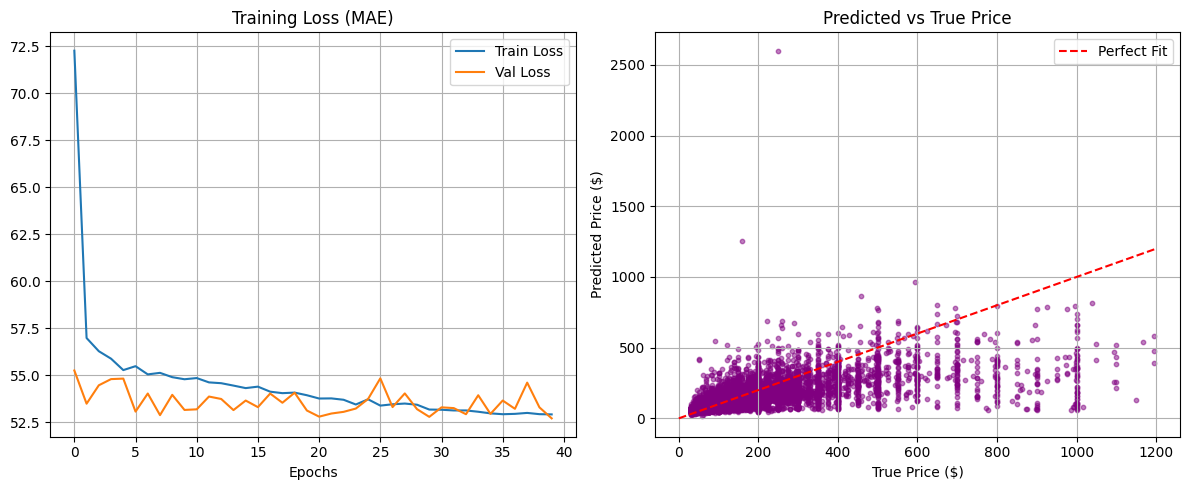


🤖 Loading LLM (Flan-T5-Large)...

📝 FINAL REPORT: Neural Network vs. Few-Shot LLM

🏆 Neural Network Accuracy: 60.0%
🤖 LLM Few-Shot Accuracy: 40.0%
------------------------------------------------------------


True Price Pred Price True Label NN Label LLM Label  \
0       $275       $133       High   Medium       Low   
1       $200        $73       High      Low      High   
2       $200       $240       High     High      High   
3        $68        $78        Low      Low      High   
4        $88        $80        Low      Low      High   
5       $375       $260       High     High      High   
6       $179       $191     Medium     High      High   
7       $150        $66     Medium      Low      High   
8       $230       $222       High     High      High   
9        $65        $53        Low      Low      High   

                                                                           Reasoning  
0                             Located in NYC, the entire home/apt. features a dryer.  
1  Located in LA, this private room features a washer and dryer, as well as parking.  
2         Located in NYC, the entire home/apt. features washer, dryer, and elevator.  
3         Located in DC, this hotel features a private room with a washer and dryer.  
4  Located in LA, this private room features a washer and dryer, as well as parking.  
5   Located in Chicago, the entire home/apt. features a pool, hot tub, gym and more.  
6       Located in Boston, the entire home/apt. features a gym, doorman, and washer.  
7            Located in DC, this hotel offers a private room with standard features.  
8              Located in SF, the entire home/apt. features: Washer, Dryer, parking.  
9           Located in NYC, this hotel offers a private room with standard features.

In [ ]:
# ==========================================
# FINAL MASTER CODE: Regression + Luxury Features + Plots + LLM
# ==========================================
!pip install -q pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate bitsandbytes sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import warnings
import re

warnings.filterwarnings('ignore')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Device: {device} (GPU Recommended)")

# ==========================================
# PART 1: DATA ENGINEERING & LUXURY FEATURES
# ==========================================
file_path = '/content/Airbnb_Data.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Data Loaded.")

    # 1. FIX TARGET (Price)
    if 'log_price' in df.columns:
        df['Price'] = np.exp(df['log_price'])
    elif 'price' in df.columns:
        df['Price'] = df['price']

    # Filter reasonable range
    df = df[(df['Price'] >= 30) & (df['Price'] <= 1200)]

    # 2. DEFINE CLASSES
    def get_price_category(p):
        if p < 90: return 'Low'
        elif p < 180: return 'Medium'
        else: return 'High'

    df['Category'] = df['Price'].apply(get_price_category)

    # 3. SMART LUXURY EXTRACTION (New!)
    # We focus only on these high-value keywords to improve accuracy
    LUXURY_KEYWORDS = ['Pool', 'Hot tub', 'Gym', 'View', 'Doorman', 'Washer', 'Dryer', 'Parking', 'Elevator', 'Patio']

    def clean_text(s):
        if pd.isna(s): return ""
        return re.sub(r'[{}"]', '', s)

    def count_luxury(s):
        if not s: return 0
        # Check how many luxury keywords appear in the string
        count = 0
        s_lower = s.lower()
        for key in LUXURY_KEYWORDS:
            if key.lower() in s_lower:
                count += 1
        return count

    def get_luxury_list(s):
        # Returns a string of just the luxury items found (for the LLM)
        found = []
        if pd.isna(s): return "Standard"
        s_lower = s.lower()
        for key in LUXURY_KEYWORDS:
            if key.lower() in s_lower:
                found.append(key)
        if not found: return "Standard Features"
        return ", ".join(found[:3]) # Top 3 only

    if 'amenities' in df.columns:
        df['amenities_clean'] = df['amenities'].apply(clean_text)
        df['luxury_count'] = df['amenities_clean'].apply(count_luxury)
        df['luxury_items'] = df['amenities_clean'].apply(get_luxury_list)
    else:
        df['luxury_count'] = 0
        df['luxury_items'] = "None"

    # 4. SELECT FEATURES (Using luxury_count instead of total amenities)
    potential_num = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'luxury_count']
    potential_cat = ['room_type', 'property_type', 'city', 'cancellation_policy', 'cleaning_fee']

    available_cols = df.columns.tolist()
    num_cols = [c for c in potential_num if c in available_cols]
    cat_cols = [c for c in potential_cat if c in available_cols]

    # 5. IMPUTATION
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    # 6. ENCODING & SPLITTING
    df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    X = pd.concat([df[num_cols], df_encoded], axis=1)
    y_reg = df['Price']
    y_cls = df['Category']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    indices = np.arange(len(X))

    X_train, X_test, y_train, y_test, y_cls_train, y_cls_test, idx_train, idx_test = train_test_split(
        X_scaled, y_reg, y_cls, indices, test_size=0.20, random_state=42
    )

    df_test_raw = df.iloc[idx_test]

    print(f"📊 Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

except Exception as e:
    print(f"❌ Data Error: {e}")
    raise

# ==========================================
# PART 2: NEURAL NETWORK (REGRESSION)
# ==========================================
print("\n🧠 Training Neural Network...")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    verbose=1,
    validation_split=0.1
)
print("✅ NN Training Complete.")

# NN Predictions
nn_preds_price = model.predict(X_test).flatten()
nn_preds_cls = [get_price_category(p) for p in nn_preds_price]

# ==========================================
# PART 3: VISUALIZATION (RESTORED)
# ==========================================
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training Loss (MAE)")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)

# Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_preds_price, alpha=0.5, color='purple', s=10)
plt.plot([0, 1200], [0, 1200], 'r--', label='Perfect Fit')
plt.title("Predicted vs True Price")
plt.xlabel("True Price ($)")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==========================================
# PART 4: LLM CLASSIFICATION (FEW-SHOT)
# ==========================================
print("\n🤖 Loading LLM (Flan-T5-Large)...")
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map=device)

# --- Few-Shot Prompt (Using Luxury Features) ---
few_shot_prompt = """
Example 1:
Input: City: NYC, Type: Shared room, Beds: 1, Luxury: None.
Label: Low

Example 2:
Input: City: LA, Type: Entire home, Beds: 2, Luxury: Pool, Parking.
Label: Medium

Example 3:
Input: City: DC, Type: Entire home, Beds: 4, Luxury: Pool, Gym, View.
Label: High

Now classify:
Input: """

def classify_with_llm(index):
    row = df_test_raw.iloc[index]
    city = row.get('city', 'Unknown')
    r_type = row.get('room_type', 'Unknown')
    beds = int(row.get('bedrooms', 0)) if pd.notna(row.get('bedrooms')) else 0
    luxury = row.get('luxury_items', "Standard")

    # Construct Prompt
    user_input = f"City: {city}, Type: {r_type}, Beds: {beds}, Luxury: {luxury}.\nLabel:"
    final_prompt = few_shot_prompt + user_input

    inputs = tokenizer(final_prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=5, temperature=0.1)
    return tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

def describe_with_llm(index):
    row = df_test_raw.iloc[index]
    city = row.get('city', 'the city')
    luxury = row.get('luxury_items', "Standard Features")

    # Prompt focuses on Luxury Features now
    prompt = f"""
    Task: Write a sentence starting with "Located in...". Mention the luxury features.
    Data: Located in {city}, {row.get('room_type')}. Features: {luxury}.
    Sentence:
    """
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_new_tokens=50, temperature=0.5, repetition_penalty=1.2)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ==========================================
# PART 5: FINAL REPORT
# ==========================================
print("\n" + "="*60)
print("📝 FINAL REPORT: Neural Network vs. Few-Shot LLM")
print("="*60)

results = []
correct_llm = 0
correct_nn = 0
sample_size = 10

for i in range(sample_size):
    try:
        true_price = y_test.iloc[i]
        true_label = y_cls_test.iloc[i]

        nn_price = nn_preds_price[i]
        nn_label = nn_preds_cls[i]

        llm_label = classify_with_llm(i)
        description = describe_with_llm(i)

        # Accuracy Check
        if llm_label.lower() == true_label.lower(): correct_llm += 1
        if nn_label.lower() == true_label.lower(): correct_nn += 1

        results.append({
            "True Price": f"${true_price:.0f}",
            "Pred Price": f"${nn_price:.0f}",
            "True Label": true_label,
            "NN Label": nn_label,
            "LLM Label": llm_label,
            "Reasoning": description
        })

    except Exception as e:
        print(f"Error row {i}: {e}")

res_df = pd.DataFrame(results)

acc_llm = (correct_llm / sample_size) * 100
acc_nn = (correct_nn / sample_size) * 100

print(f"\n🏆 Neural Network Accuracy: {acc_nn:.1f}%")
print(f"🤖 LLM Few-Shot Accuracy: {acc_llm:.1f}%")
print("-" * 60)

pd.set_option('display.max_colwidth', None)
display(res_df)

✅ Loaded: (74111, 29)


id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                                                                                                                                                                                                                                                                                                 amenities  \
0                                                                                                                                                                 {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}   
1                                                                                               {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}   
2  {TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Breakfast,"Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}   
3                                                                                                       {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Indoor fireplace","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials}   
4                                                                                                                                           {TV,Internet,"Wireless Internet","Air conditioning",Kitchen,"Elevator in building",Heating,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo}   

   accommodates  bathrooms  bed_type cancellation_policy  cleaning_fee  ...  \
0             3        1.0  Real Bed              strict          True  ...   
1             7        1.0  Real Bed              strict          True  ...   
2             5        1.0  Real Bed            moderate          True  ...   
3             4        1.0  Real Bed            flexible          True  ...   
4             2        1.0  Real Bed            moderate          True  ...   

    latitude   longitude                                      name  \
0  40.696524  -73.991617            Beautiful brownstone 1-bedroom   
1  40.766115  -73.989040  Superb 3BR Apt Located Near Times Square   
2  40.808110  -73.943756                          The Garden Oasis   
3  37.772004 -122.431619        Beautiful Flat in the Heart of SF!   
4  38.925627  -77.034596                Great studio in midtown DC   

      neighbourhood number_of_reviews review_scores_rating  \
0  Brooklyn Heights                 2                100.0   
1    Hell's Kitchen                 6                 93.0   
2            Harlem                10                 92.0   
3      Lower Haight                 0                  NaN   
4  Columbia Heights                 4                 40.0   

                                                                                   thumbnail_url  \
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small   
1  https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small   
2  https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small   
3  https://a0.muscache.com/im/pictures/72208dad-9c86-41ea-a735-43d933111063.jpg?aki_poli

✅ After price filtering: (73854, 30)
Unique Price values: 721 out of 73854 rows.

✅ Explanation (use in report):
- Price is continuous numeric with many unique values → main task is REGRESSION.
- Classification is only possible after binning prices into categories (Low/Medium/High).


Category balance (%):


percent
Category         
Low         37.56
Medium      37.16
High        25.27


==================== EDA ====================


missing_count  missing_%
host_response_rate              18238      24.69
review_scores_rating            16616      22.50
first_review                    15763      21.34
last_review                     15726      21.29
thumbnail_url                    8174      11.07
neighbourhood                    6825       9.24
zipcode                           960       1.30
bathrooms                         200       0.27
host_since                        188       0.25
host_identity_verified            188       0.25
host_has_profile_pic              188       0.25
beds                              131       0.18
bedrooms                           91       0.12
log_price                           0       0.00
property_type                       0       0.00
description                         0       0.00
cancellation_policy                 0       0.00
cleaning_fee                        0       0.00
city                                0       0.00
bed_type                            0       0.00
room_type                           0       0.00
amenities                           0       0.00
accommodates                        0       0.00
id                                  0       0.00
longitude                           0       0.00
latitude                            0       0.00
instant_bookable                    0       0.00
name                                0       0.00
number_of_reviews                   0       0.00
Price                               0       0.00

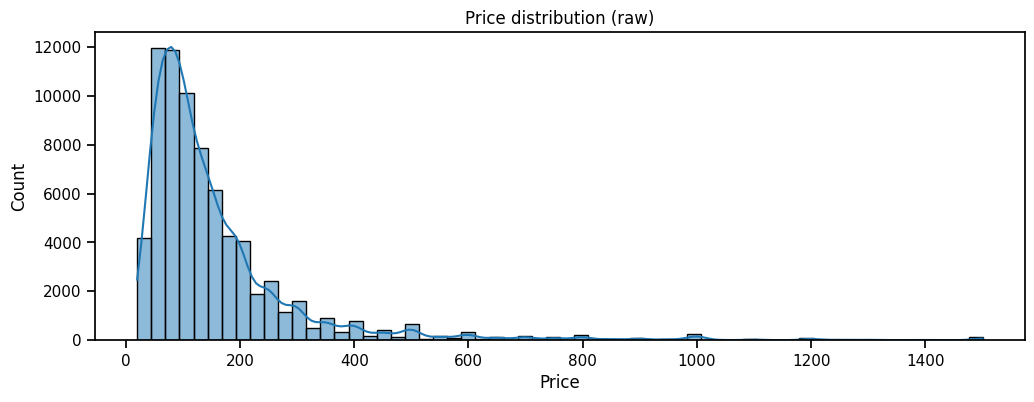

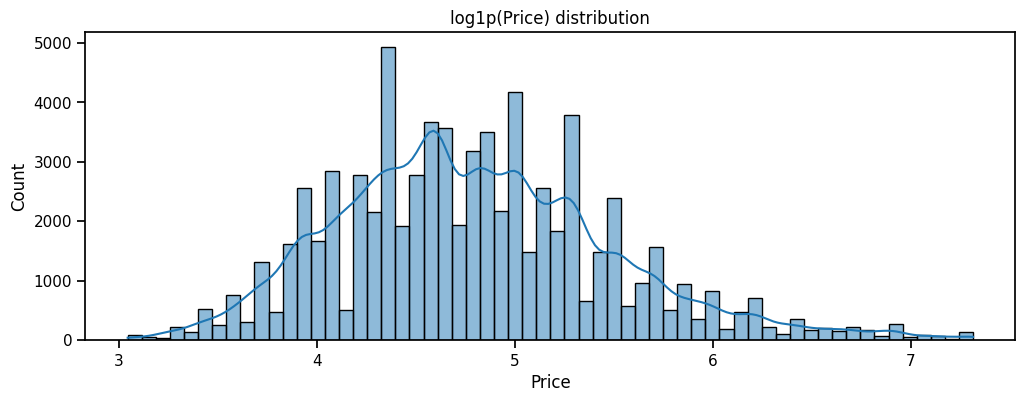

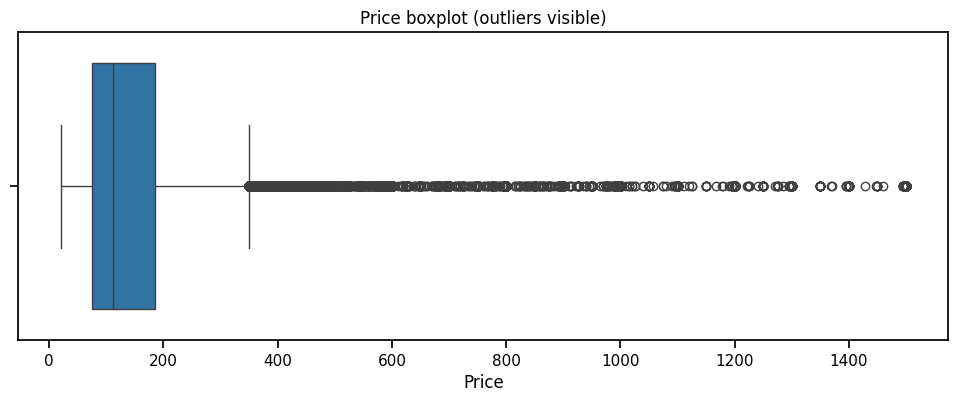

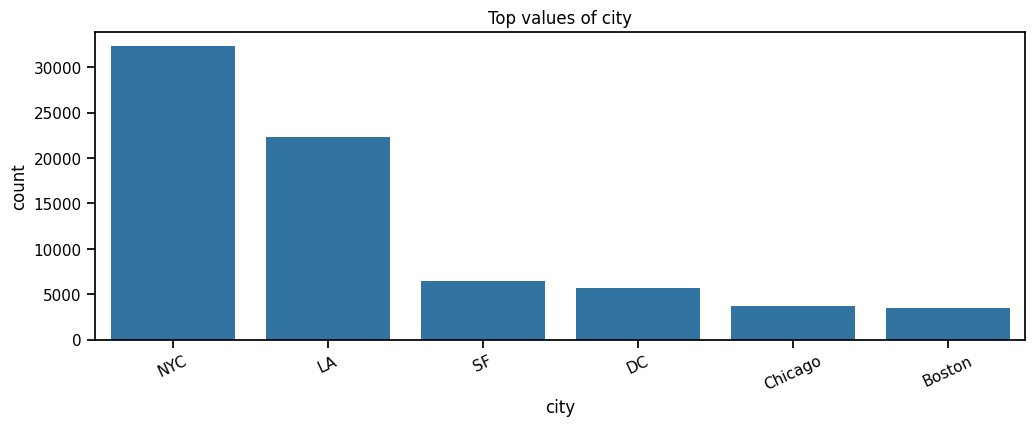

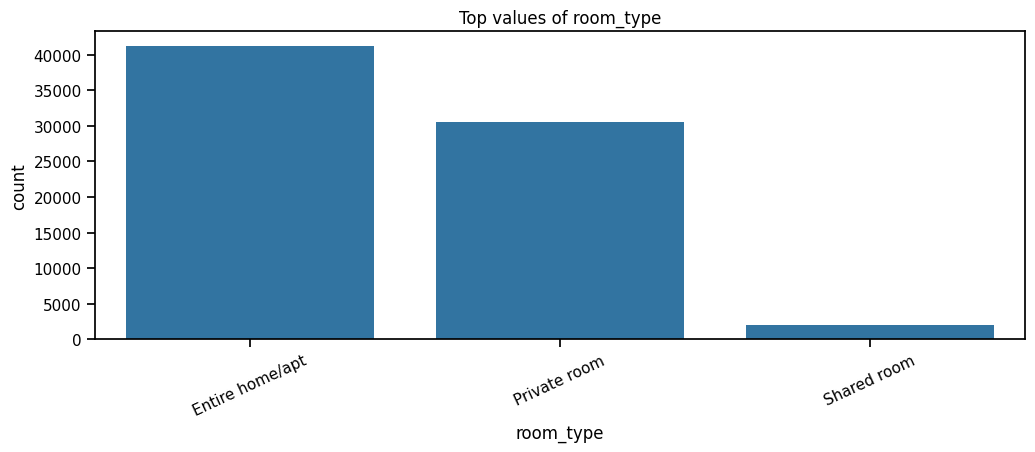

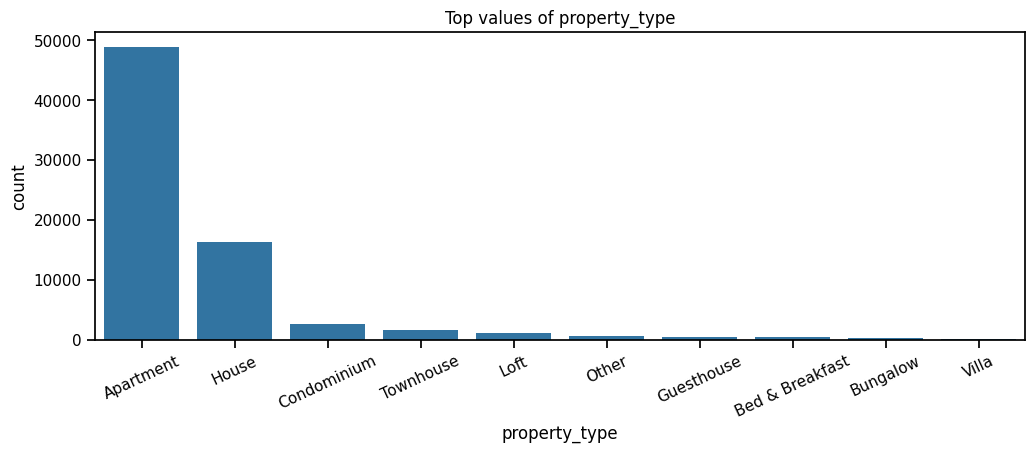

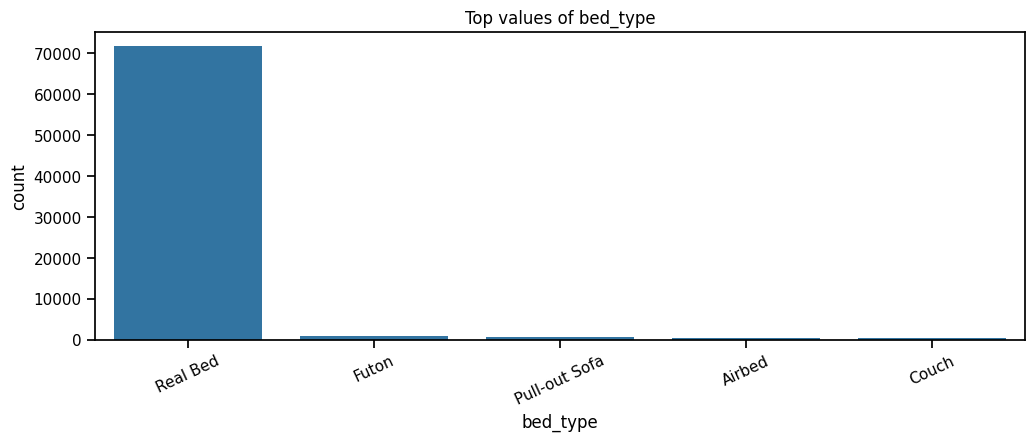

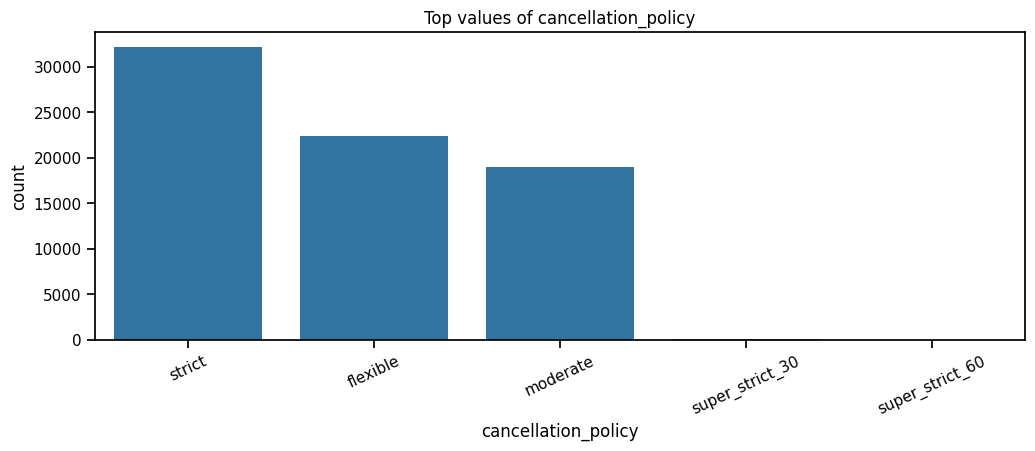

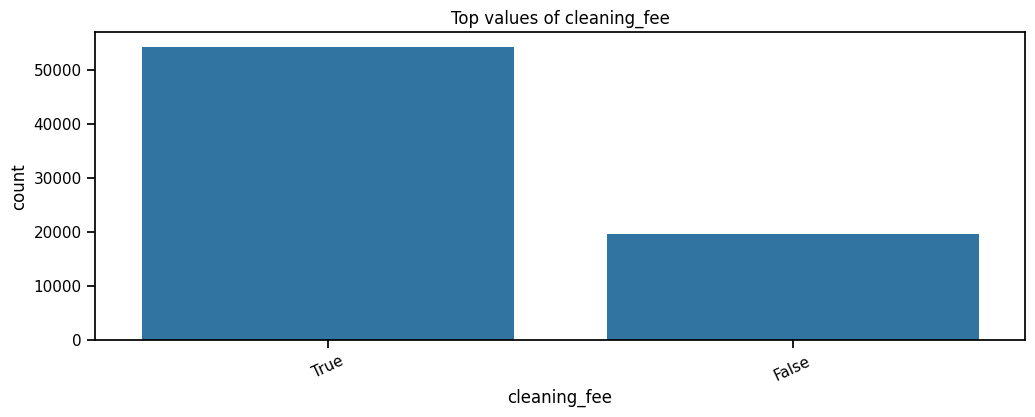

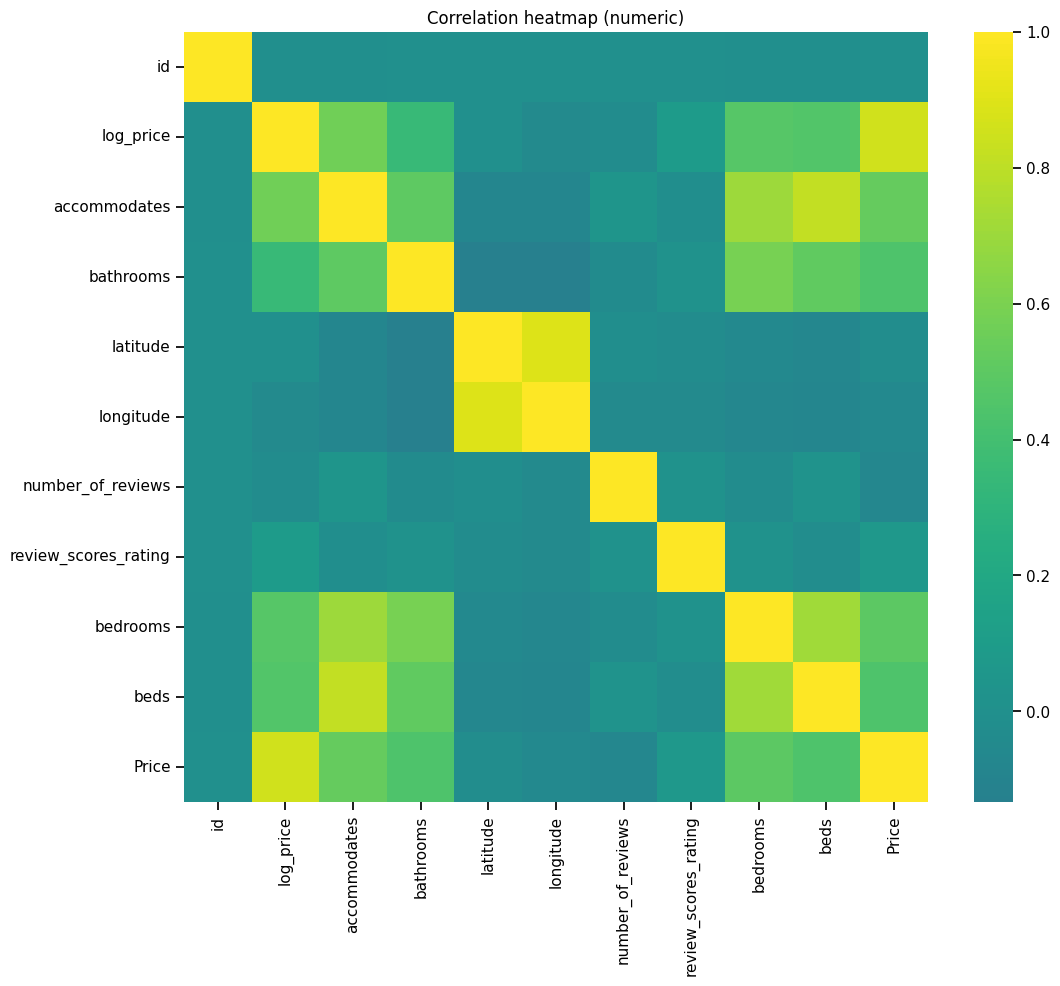

corr_with_Price
Price                        1.000000
log_price                    0.857115
accommodates                 0.523813
bedrooms                     0.491446
bathrooms                    0.442431
beds                         0.439201
review_scores_rating         0.067765
id                          -0.004485
latitude                    -0.026651
longitude                   -0.057100
number_of_reviews           -0.069630

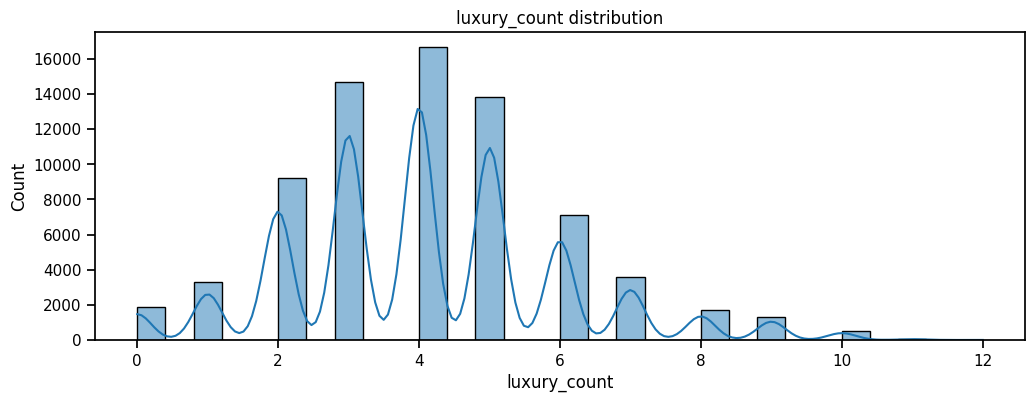

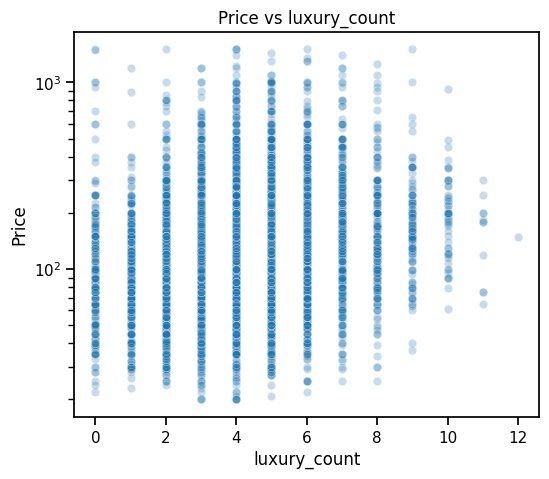

Numeric features: ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'latitude', 'longitude', 'luxury_count']
Categorical features: ['city', 'room_type', 'property_type', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable', 'host_identity_verified', 'host_has_profile_pic', 'neighbourhood', 'zipcode']

✅ Train: (51697, 23), Val: (11078, 23), Test: (11079, 23)
✅ Encoded shapes: (51697, 1395) (11078, 1395) (11079, 1395)


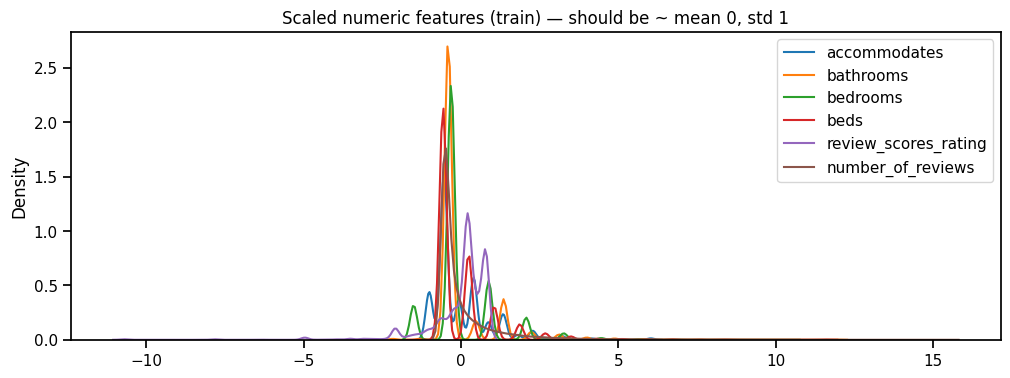


🧠 Training regression NN (verbose=1)...
Epoch 1/60
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - acc_within_10pct: 0.0327 - acc_within_20pct: 0.0669 - loss: 4993.6572 - mae: 122.1889 - mape: 70.7236 - val_acc_within_10pct: 0.0904 - val_acc_within_20pct: 0.1811 - val_loss: 3342.5630 - val_mae: 86.8648 - val_mape: 46.2397 - learning_rate: 0.0010
Epoch 2/60
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - acc_within_10pct: 0.0903 - acc_within_20pct: 0.1811 - loss: 1786.5986 - mae: 52.9141 - mape: 32.6570 - val_acc_within_10pct: 0.0953 - val_acc_within_20pct: 0.1920 - val_loss: 2090.1650 - val_mae: 58.0536 - val_mape: 28.2914 - learning_rate: 0.0010
Epoch 3/60
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - acc_within_10pct: 0.0895 - acc_within_20pct: 0.1793 - loss: 1711.2881 - mae: 51.2198 - mape: 31.8757 - val_acc_within_10pct: 0.0905 - val_acc_within_20pct: 0.1817 - val_loss: 1749.2615 - val_mae: 51.0695 - val_mape: 28.1745 - learning_rate: 0.0010
Epoch 4/60
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 55

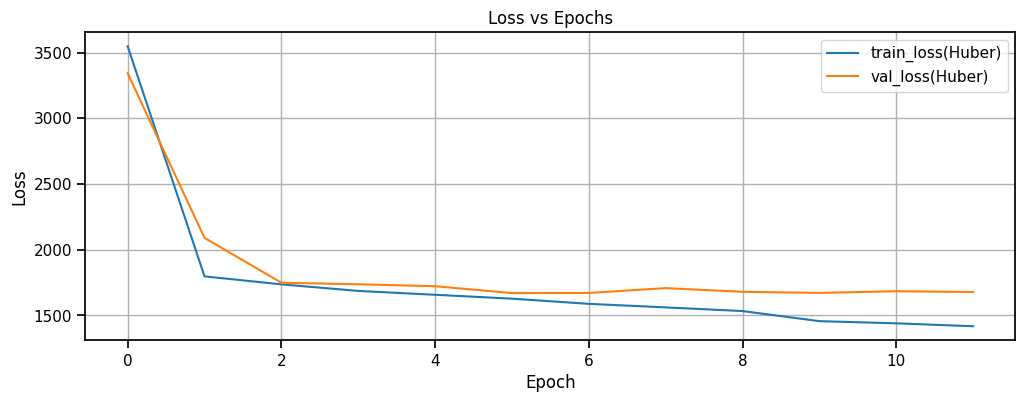

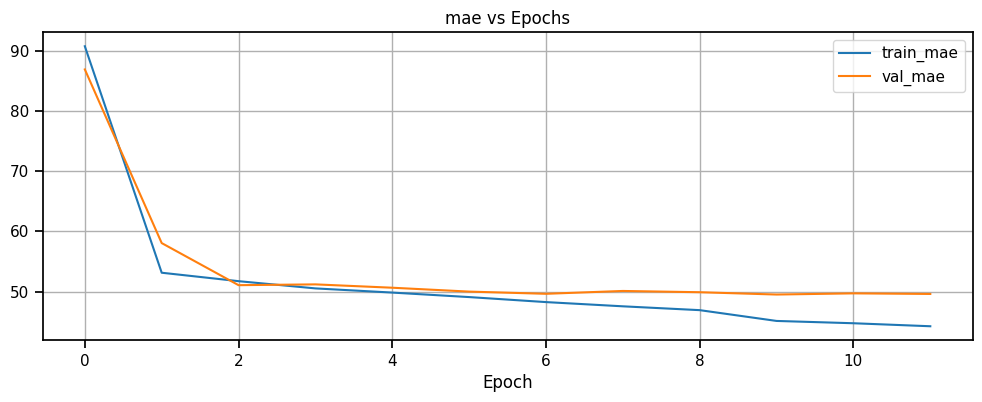

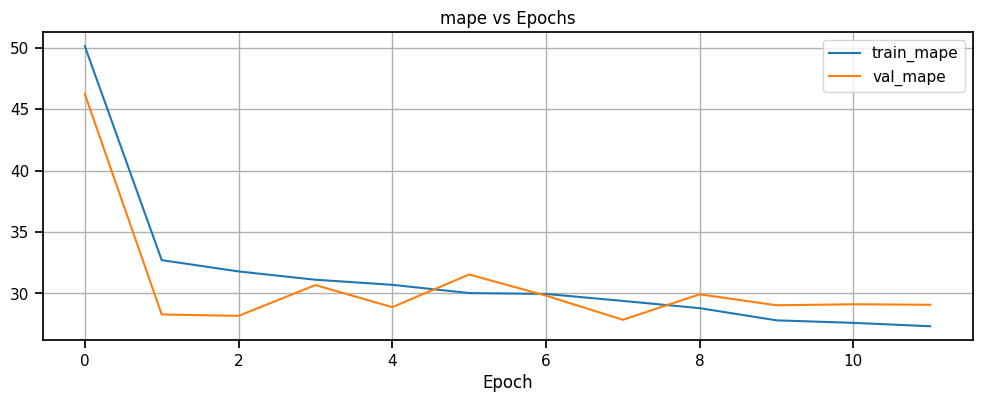

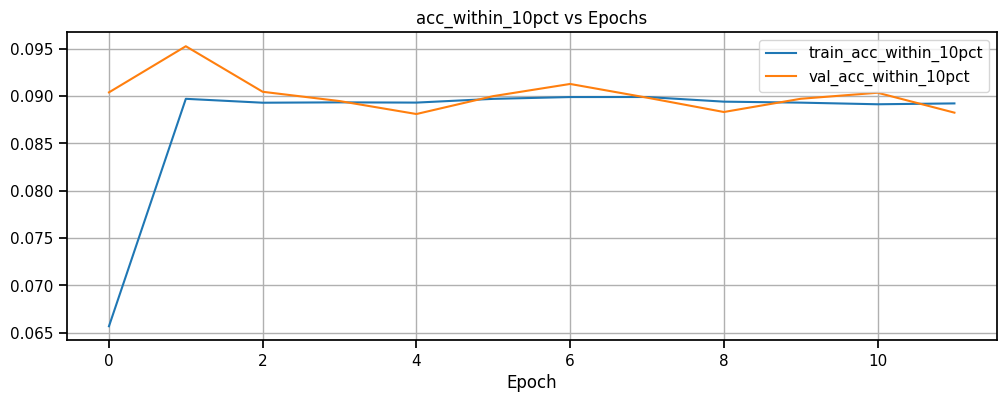

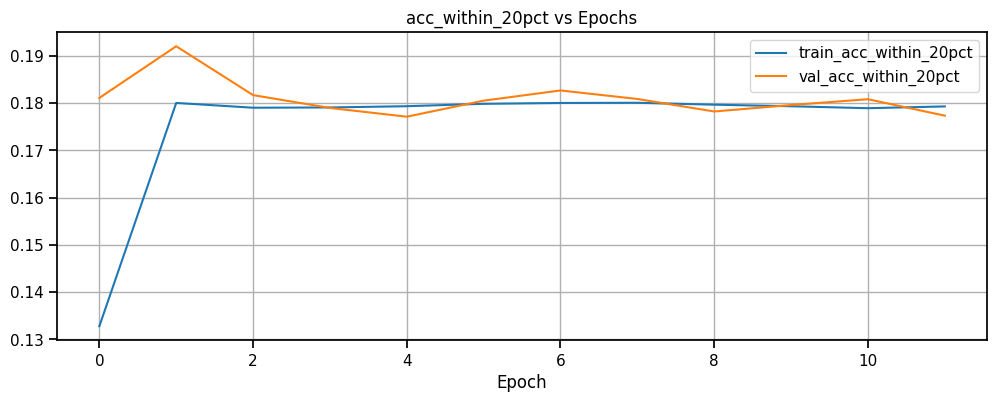

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

================ TEST REGRESSION REPORT ================
MAE:  48.61
RMSE: 100.49
R²:   0.594
MAPE: 31.49%
Accuracy@10%: 23.83%
Accuracy@20%: 45.23%


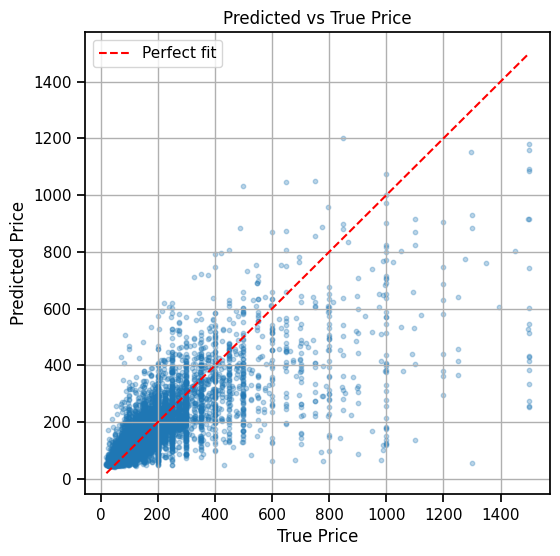

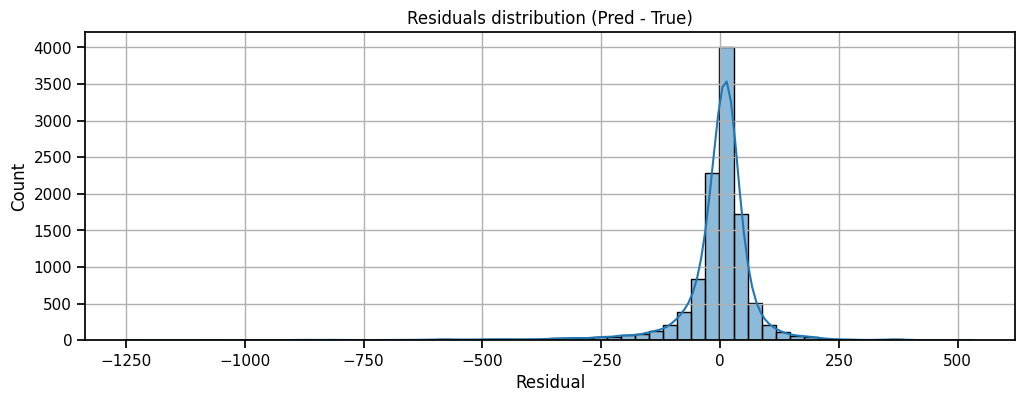

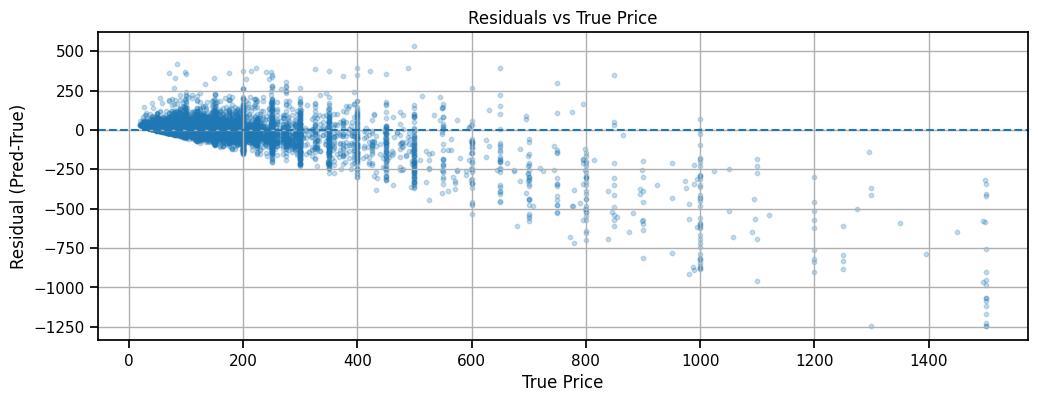

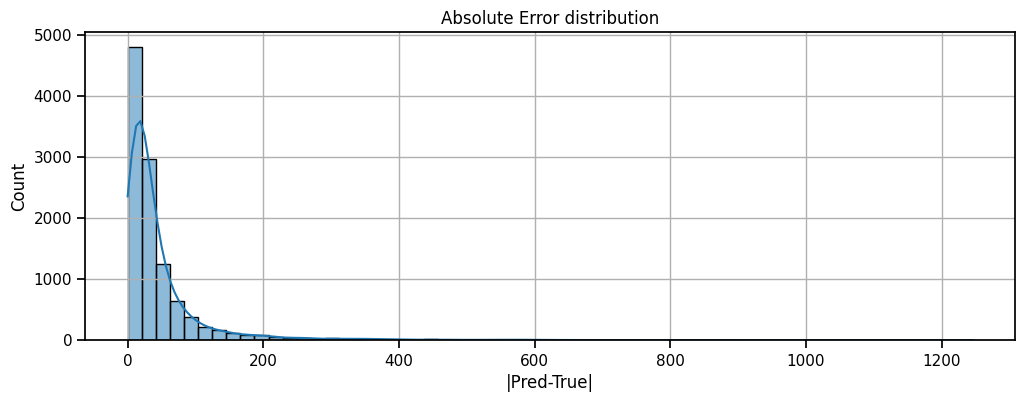

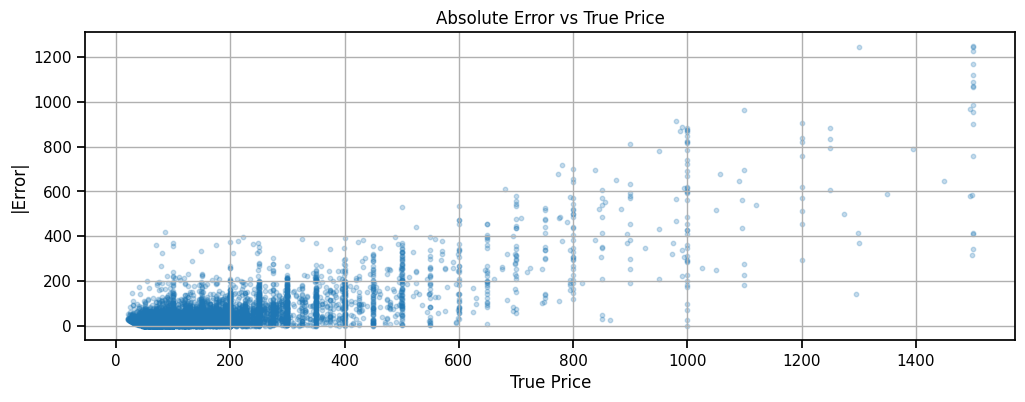

Price  Pred_Price  Abs_Error  Pct_Error_% Category  \
14982  165.0  164.997849   0.002151     0.001304   Medium   
72831   50.0   50.010376   0.010376     0.020752      Low   
50678  125.0  124.988228   0.011772     0.009418   Medium   
27525   75.0   75.014603   0.014603     0.019470      Low   
61283   90.0   89.978691   0.021309     0.023677      Low   
12394   50.0   49.973995   0.026005     0.052010      Low   
52091   53.0   53.026520   0.026520     0.050037      Low   
44311   48.0   48.027130   0.027130     0.056521      Low   
37627  100.0   99.961250   0.038750     0.038750   Medium   
68020  144.0  144.040176   0.040176     0.027900   Medium   
13964  115.0  114.953171   0.046829     0.040721   Medium   
5337   198.0  197.950592   0.049408     0.024954     High   
64936   69.0   69.052223   0.052223     0.075686      Low   
5163    60.0   59.947014   0.052986     0.088310      Low   
47739   70.0   69.945770   0.054230     0.077471      Low   
33215   60.0   60.060448   0.060448     0.100746      Low   
45952   68.0   67.935364   0.064636     0.095053      Low   
32349   95.0   95.071198   0.071198     0.074945   Medium   
51552  200.0  200.072372   0.072372     0.036186     High   
60923  450.0  449.926666   0.073334     0.016296     High   
50802  120.0  119.918808   0.081192     0.067660   Medium   
9419   125.0  125.096786   0.096786     0.077429   Medium   
15346   99.0   99.107094   0.107094     0.108176   Medium   
55680  115.0  115.113724   0.113724     0.098890   Medium   
44442   49.0   49.123436   0.123436     0.251910      Low   

                                                            luxury_items  \
14982                 Washer, Dryer, Elevator, Air conditioning, Heating   
72831                                          Air conditioning, Heating   
50678                           Hot tub, Washer, Dryer, Parking, Heating   
27525                                Elevator, Air conditioning, Heating   
61283                                                            Parking   
12394                                                   Parking, Heating   
52091                                   Dryer, Air conditioning, Heating   
44311                           Washer, Dryer, Air conditioning, Heating   
37627                          Dryer, Parking, Air conditioning, Heating   
68020                                                     Dryer, Heating   
13964                                             Washer, Dryer, Heating   
5337                                           Air conditioning, Heating   
64936         Hot tub, Washer, Dryer, Parking, Air conditioning, Heating   
5163                                              Washer, Dryer, Parking   
47739                           Washer, Dryer, Air conditioning, Heating   
33215                                   Dryer, Air conditioning, Heating   
45952                Washer, Dryer, Air conditioning, Heating, Breakfast   
32349                           Washer, Dryer, Air conditioning, Heating   
51552                                                            Heating   
60923                           Washer, Dryer, Air conditioning, Heating   
50802                           Washer, Dryer, Air conditioning, Heating   
9419                                                    Air conditioning   
15346                                                      Washer, Dryer   
55680  Pool, Hot tub, Washer, Dryer, Elevator, Air conditioning, Heating   
44442                                             Washer, Dryer, Heating   

         city        room_type property_type  accommodates  bedrooms  \
14982  Boston  Entire home/apt     Apartment             4       1.0   
72831      LA     Private room         House             2       1.0   
50678      SF     Private room   Condominium             2       1.0   
27525     NYC     Private room     Apartment             3       1.0   
61283      LA     Private room     Apartment             2       1.0   
12394     N

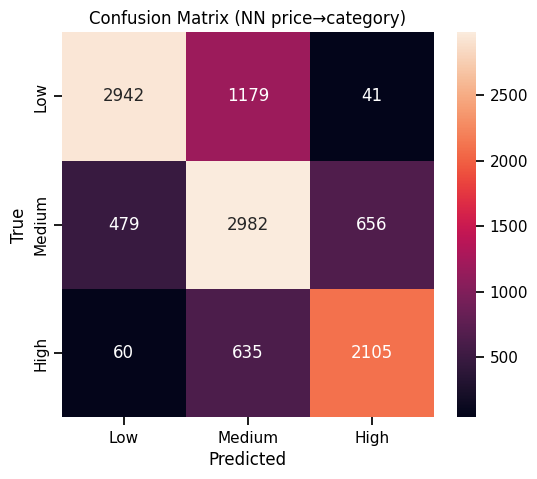


Classification report (NN mapped categories):
              precision    recall  f1-score   support

        High      0.751     0.752     0.752      2800
         Low      0.845     0.707     0.770      4162
      Medium      0.622     0.724     0.669      4117

    accuracy                          0.725     11079
   macro avg      0.739     0.728     0.730     11079
weighted avg      0.738     0.725     0.728     11079

✅ NN category accuracy (from regression): 72.47%

🤖 Loading LLM: google/flan-t5-large | device: cpu

🤖 LLM few-shot accuracy (on 200 test rows): 27.50%
🧠 NN category accuracy (full test, from regression): 72.47%


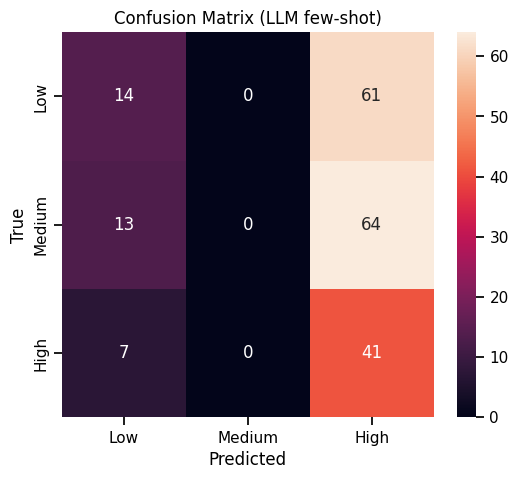

Price  Pred_Price Category NN_Category  \
60137   75.0   72.694870      Low         Low   
66787  155.0  264.338196   Medium        High   
28633  125.0  154.030685   Medium      Medium   
13528  160.0  133.499649   Medium      Medium   
71037  120.0   56.144936   Medium         Low   
42776  138.0  158.201187   Medium      Medium   
71384   31.0   51.491138      Low         Low   
61658  500.0  233.317032     High        High   

                                                             luxury_items  \
60137  Pool, Washer, Dryer, Parking, Air conditioning, Heating, Breakfast   
66787                                     Washer, Dryer, Parking, Heating   
28633                     Washer, Dryer, Parking, Patio, Balcony, Heating   
13528                                 Elevator, Air conditioning, Heating   
71037                   Washer, Dryer, Parking, Air conditioning, Heating   
42776                   Washer, Dryer, Parking, Air conditioning, Heating   
71384                            Washer, Dryer, Air conditioning, Heating   
61658                                        Pool, Washer, Dryer, Parking   

          city        room_type  property_type  accommodates  bedrooms  \
60137       LA     Private room          House             1       1.0   
66787       LA  Entire home/apt          House             5       2.0   
28633       SF     Private room          House             3       2.0   
13528      NYC  Entire home/apt      Apartment             2       1.0   
71037       LA     Private room          House             2       1.0   
42776       LA  Entire home/apt          House             7       2.0   
71384  Chicago     Private room      Apartment             1       1.0   
61658       LA  Entire home/apt  Vacation home             8       3.0   

       bathrooms  review_scores_rating  luxury_count  cleaning_fee  
60137        1.0                 100.0             7          True  
66787        1.0                  85.0             4         False  
28633        1.5                  98.0             6          True  
13528        1.0                   NaN             3          True  
71037        1.0                   NaN             5         False  
42776        1.0                 100.0             5          True  
71384        1.0                  94.0             4          True  
61658        2.0                   NaN             4          True

LLM_Reasons_for_Price
60137                                                                                              The house in Woodland Hills/Warner Center, LA has a moderate cancellation policy and a 7 star rating. It has a private room with a real bed, a washer, dryer, parking, air conditioning, heating and breakfast.
66787                                                                                                                                                                                 The house in Venice, LA has a moderate cancellation policy and a 4 star rating. It has a washer, dryer, parking and heating.
28633  The Duboce Triangle is a great place to stay. It has a great location, a great location, and a great price. The property is in a great neighborhood. The house is very clean and the amenities are great. The cancellation policy is strict. The house is in a great neighborhood. The price is reasonable.
13528                                                                                                                                   The apartment is in NYC and has a 1 star rating. It has a strict cancellation policy and a $160 cleaning fee. It has a real bed, air conditioning, heating and a real bed.
71037                                                                                                                                               The house in LA has a 5 star rating and is in the NAN neighborhood. It has a washer, dryer, parking, air conditioning and heating. The price is $56 per night.
42776                                                                                                                                                    The house in Long Beach, California is a house. It has 5 bedrooms, 2 bathrooms, and a real bed. It has a moderate cancellation policy and a cleaning fee.
71384                                                                                                 The apartment is in Little Village, Chicago. It has a private room, a washer, dryer, air conditioning and heating. It has a 94.0 rating and a strict cancellation policy. The apartment is instant bookable.
61658                                                                                                                                           The property is in the city of LA and has a price range of $500 per night. It has a nan rating and has a 4 star rating. It has a pool, washer, dryer, and parking.


✅ DONE: All requirements implemented.


In [ ]:


!pip -q install pandas numpy scikit-learn tensorflow matplotlib seaborn transformers accelerate sentencepiece

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, classification_report, accuracy_score
)

import tensorflow as tf

# LLM
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (12, 5)

# ============================================================
# 0) SETTINGS
# ============================================================
FILE_PATH = "/content/Airbnb_Data.csv"   # Upload CSV to Colab or change path
RANDOM_SEED = 42

TRAIN_FRAC, VAL_FRAC, TEST_FRAC = 0.70, 0.15, 0.15

# Choose LLM model (large is better but heavier)
LLM_MODEL_NAME = "google/flan-t5-large"   # or "google/flan-t5-base" if GPU memory low
LLM_EVAL_SAMPLES = 200                    # LLM evaluation size (increase if you want)

# Optional: stabilize extreme outliers (recommended)
MIN_PRICE, MAX_PRICE = 20, 1500

# ============================================================
# 1) LOAD DATA
# ============================================================
df = pd.read_csv(FILE_PATH)
print(" Loaded:", df.shape)
display(df.head())

# ============================================================
# 2) CREATE TARGET PRICE
# ============================================================
if "log_price" in df.columns:
    df["Price"] = np.exp(df["log_price"])
elif "price" in df.columns:
    df["Price"] = df["price"]
else:
    raise ValueError("Target not found: need 'log_price' or 'price' column")

df = df[df["Price"].between(MIN_PRICE, MAX_PRICE)].copy()
df.reset_index(drop=True, inplace=True)
print(" After price filtering:", df.shape)

# ============================================================
# 3) WHY THIS IS REGRESSION (NOT CLASSIFICATION)
# ============================================================
unique_prices = df["Price"].nunique()
print(f"Unique Price values: {unique_prices} out of {len(df)} rows.")
print(
    "\n Explanation (use in report):\n"
    "- Price is continuous numeric with many unique values → main task is REGRESSION.\n"
    "- Classification is only possible after binning prices into categories (Low/Medium/High).\n"
)

# ============================================================
# 4) CATEGORY LABELS (FOR CONFUSION MATRIX + LLM CLASSIFICATION)
# ============================================================
def get_price_category(p):
    if p < 90: return "Low"
    elif p < 180: return "Medium"
    else: return "High"

df["Category"] = df["Price"].apply(get_price_category)

print("\nCategory balance (%):")
display(df["Category"].value_counts(normalize=True).mul(100).round(2).to_frame("percent"))

# ============================================================
# 5) PART A: DEEP EDA (LOTS OF TABLES + GRAPHS)
# ============================================================
print("\n==================== EDA ====================")

# Missing values table
miss_cnt = df.isna().sum().sort_values(ascending=False)
miss_pct = (miss_cnt / len(df) * 100).round(2)
miss_table = pd.DataFrame({"missing_count": miss_cnt, "missing_%": miss_pct})
display(miss_table.head(30))

# Price distribution
plt.figure(figsize=(12,4))
sns.histplot(df["Price"], bins=60, kde=True)
plt.title("Price distribution (raw)")
plt.show()

plt.figure(figsize=(12,4))
sns.histplot(np.log1p(df["Price"]), bins=60, kde=True)
plt.title("log1p(Price) distribution")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x=df["Price"])
plt.title("Price boxplot (outliers visible)")
plt.show()

# Some categorical exploration if columns exist
cat_candidates = ["city","room_type","property_type","bed_type","cancellation_policy","cleaning_fee"]
cat_cols_eda = [c for c in cat_candidates if c in df.columns]

for c in cat_cols_eda:
    plt.figure(figsize=(12,4))
    sns.countplot(data=df, x=c, order=df[c].value_counts().head(10).index)
    plt.title(f"Top values of {c}")
    plt.xticks(rotation=25)
    plt.show()

# Numeric correlation
num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols_all].corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="viridis", center=0)
plt.title("Correlation heatmap (numeric)")
plt.show()

# Top correlations with Price
if "Price" in corr.columns:
    display(corr["Price"].sort_values(ascending=False).head(20).to_frame("corr_with_Price"))

# ============================================================
# 6) FEATURE ENGINEERING: luxury_count + luxury_items from amenities
# ============================================================
LUXURY_KEYWORDS = [
    "Pool","Hot tub","Gym","View","Doorman","Washer","Dryer","Parking",
    "Elevator","Patio","Balcony","Air conditioning","Heating","Breakfast"
]

def clean_amenities(s):
    if pd.isna(s):
        return ""
    s = str(s)
    return re.sub(r'[{}\[\]"]', "", s)

def count_luxury_items(s):
    s = s.lower()
    return sum(1 for k in LUXURY_KEYWORDS if k.lower() in s)

def list_luxury_items(s, topk=10):
    s = s.lower()
    found = [k for k in LUXURY_KEYWORDS if k.lower() in s]
    if not found:
        return "Standard features"
    return ", ".join(found[:topk])

if "amenities" in df.columns:
    df["amenities_clean"] = df["amenities"].apply(clean_amenities)
    df["luxury_count"] = df["amenities_clean"].apply(count_luxury_items)
    df["luxury_items"] = df["amenities_clean"].apply(list_luxury_items)
else:
    df["luxury_count"] = 0
    df["luxury_items"] = "Standard features"

# Visualize luxury_count
plt.figure(figsize=(12,4))
sns.histplot(df["luxury_count"], bins=30, kde=True)
plt.title("luxury_count distribution")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=df.sample(min(8000, len(df)), random_state=RANDOM_SEED),
                x="luxury_count", y="Price", alpha=0.25)
plt.title("Price vs luxury_count")
plt.yscale("log")
plt.show()

# ============================================================
# 7) SELECT FEATURES (ROBUST TO COLUMN AVAILABILITY)
# ============================================================
num_candidates = [
    "accommodates","bathrooms","bedrooms","beds","review_scores_rating",
    "number_of_reviews","latitude","longitude","luxury_count"
]
cat_candidates = [
    "city","room_type","property_type","bed_type","cancellation_policy",
    "cleaning_fee","instant_bookable","host_identity_verified","host_has_profile_pic",
    "neighbourhood","zipcode"
]

num_cols = [c for c in num_candidates if c in df.columns]
cat_cols = [c for c in cat_candidates if c in df.columns]

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

keep_cols = num_cols + cat_cols + ["Price","Category","luxury_items"]
df_model = df[keep_cols].copy()

# ============================================================
# 8) SPLIT: 70/15/15 (STRATIFY BY CATEGORY)
# ============================================================
train_df, temp_df = train_test_split(
    df_model, test_size=(1-TRAIN_FRAC), random_state=RANDOM_SEED, stratify=df_model["Category"]
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=RANDOM_SEED, stratify=temp_df["Category"]
)

print(f"\n Train: {train_df.shape}, Val: {val_df.shape}, Test: {test_df.shape}")

# ============================================================
# 9) PREPROCESSING:
# - Missing values (median numeric, most_frequent categorical)
# - OneHot for categorical
# - Normalize numeric using mean/std (StandardScaler)
# ============================================================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=True, with_std=True))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

# Fit ONLY on train
X_train = preprocess.fit_transform(train_df)
X_val   = preprocess.transform(val_df)
X_test  = preprocess.transform(test_df)

y_train = train_df["Price"].values.astype(np.float32)
y_val   = val_df["Price"].values.astype(np.float32)
y_test  = test_df["Price"].values.astype(np.float32)

y_cat_train = train_df["Category"].values
y_cat_val   = val_df["Category"].values
y_cat_test  = test_df["Category"].values

print(" Encoded shapes:", X_train.shape, X_val.shape, X_test.shape)

# Visualize normalized numeric (train)
n_num = len(num_cols)
if n_num > 0:
    train_num_scaled = X_train[:, :n_num]
    plt.figure(figsize=(12,4))
    for i in range(min(n_num, 6)):
        sns.kdeplot(train_num_scaled[:, i], label=num_cols[i])
    plt.title("Scaled numeric features (train) — should be ~ mean 0, std 1")
    plt.legend()
    plt.show()

# ============================================================
# 10) TF DATASETS
# ============================================================
BATCH_SIZE = 256

train_ds = tf.data.Dataset.from_tensor_slices((X_train.astype(np.float32), y_train)).shuffle(20000, seed=RANDOM_SEED).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val.astype(np.float32), y_val)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test.astype(np.float32), y_test)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# ============================================================
# 11) BEST DNN REGRESSION MODEL (FEEDFORWARD + BN + DROPOUT)
# ============================================================
tf.keras.utils.set_random_seed(RANDOM_SEED)

def acc_within_pct_np(y_true, y_pred, pct=0.10):
    rel_err = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), 1.0)
    return np.mean(rel_err <= pct)

def acc_within_pct_tf(y_true, y_pred, pct=0.10):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    rel_err = tf.abs(y_pred - y_true) / tf.maximum(tf.abs(y_true), 1.0)
    return tf.reduce_mean(tf.cast(rel_err <= pct, tf.float32))

class AccWithin10(tf.keras.metrics.Metric):
    def __init__(self, name="acc_within_10pct", **kwargs):
        super().__init__(name=name, **kwargs)
        self.total = self.add_weight(name="total", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        val = acc_within_pct_tf(y_true, y_pred, 0.10)
        self.total.assign_add(val)
        self.count.assign_add(1.0)
    def result(self):
        return tf.math.divide_no_nan(self.total, self.count)
    def reset_state(self):
        self.total.assign(0.0); self.count.assign(0.0)

class AccWithin20(tf.keras.metrics.Metric):
    def __init__(self, name="acc_within_20pct", **kwargs):
        super().__init__(name=name, **kwargs)
        self.total = self.add_weight(name="total", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        val = acc_within_pct_tf(y_true, y_pred, 0.20)
        self.total.assign_add(val)
        self.count.assign_add(1.0)
    def result(self):
        return tf.math.divide_no_nan(self.total, self.count)
    def reset_state(self):
        self.total.assign(0.0); self.count.assign(0.0)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.30),

    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.20),

    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

# Huber is often stronger than MAE alone, but still robust:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.Huber(delta=50.0),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        AccWithin10(),
        AccWithin20()
    ]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)
]

print("\n Training regression NN (verbose=1)...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=60,
    verbose=1,
    callbacks=callbacks
)

# ============================================================
# 12) TRAINING VISUALIZATION (LOSS + METRICS)
# ============================================================
hist = pd.DataFrame(history.history)

plt.figure(figsize=(12,4))
plt.plot(hist["loss"], label="train_loss(Huber)")
plt.plot(hist["val_loss"], label="val_loss(Huber)")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

for m in ["mae","mape","acc_within_10pct","acc_within_20pct"]:
    if m in hist.columns:
        plt.figure(figsize=(12,4))
        plt.plot(hist[m], label=f"train_{m}")
        plt.plot(hist[f"val_{m}"], label=f"val_{m}")
        plt.title(f"{m} vs Epochs")
        plt.xlabel("Epoch")
        plt.grid(True)
        plt.legend()
        plt.show()

# ============================================================
# 13) TEST EVALUATION (RMSE FIXED WITHOUT squared=False)
# ============================================================
y_pred = model.predict(X_test.astype(np.float32), batch_size=1024).flatten()

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_pred - y_test) / np.maximum(np.abs(y_test), 1))) * 100
acc10 = acc_within_pct_np(y_test, y_pred, 0.10) * 100
acc20 = acc_within_pct_np(y_test, y_pred, 0.20) * 100

print("\n================ TEST REGRESSION REPORT ================")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy@10%: {acc10:.2f}%")
print(f"Accuracy@20%: {acc20:.2f}%")
print("========================================================")

# ============================================================
# 14) REGRESSION GRAPHS (LOTS)
# ============================================================
# Pred vs True
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, s=10)
mn, mx = np.min(y_test), np.max(y_test)
plt.plot([mn, mx], [mn, mx], "r--", label="Perfect fit")
plt.title("Predicted vs True Price")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.legend()
plt.show()

# Residuals
residuals = y_pred - y_test

plt.figure(figsize=(12,4))
sns.histplot(residuals, bins=60, kde=True)
plt.title("Residuals distribution (Pred - True)")
plt.xlabel("Residual")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.scatter(y_test, residuals, alpha=0.25, s=10)
plt.axhline(0, linestyle="--")
plt.title("Residuals vs True Price")
plt.xlabel("True Price")
plt.ylabel("Residual (Pred-True)")
plt.grid(True)
plt.show()

abs_err = np.abs(residuals)
plt.figure(figsize=(12,4))
sns.histplot(abs_err, bins=60, kde=True)
plt.title("Absolute Error distribution")
plt.xlabel("|Pred-True|")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.scatter(y_test, abs_err, alpha=0.25, s=10)
plt.title("Absolute Error vs True Price")
plt.xlabel("True Price")
plt.ylabel("|Error|")
plt.grid(True)
plt.show()

# ============================================================
# 15) TEST CASES TABLE (TRUE vs PRED + ERROR)
# ============================================================
test_cases = test_df.copy()
test_cases["Pred_Price"] = y_pred
test_cases["Abs_Error"] = np.abs(test_cases["Pred_Price"] - test_cases["Price"])
test_cases["Pct_Error_%"] = (test_cases["Abs_Error"] / np.maximum(test_cases["Price"], 1) * 100)

display(
    test_cases[["Price","Pred_Price","Abs_Error","Pct_Error_%","Category","luxury_items"] +
               [c for c in ["city","room_type","property_type","accommodates","bedrooms","bathrooms","review_scores_rating","luxury_count"] if c in test_cases.columns]]
    .sort_values("Abs_Error", ascending=True)
    .head(25)
)

# ============================================================
# 16) CONFUSION MATRIX (PRICE -> CATEGORY)
# ============================================================
nn_pred_cat = np.array([get_price_category(p) for p in y_pred])

cm = confusion_matrix(y_cat_test, nn_pred_cat, labels=["Low","Medium","High"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"])
plt.title("Confusion Matrix (NN price→category)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification report (NN mapped categories):")
print(classification_report(y_cat_test, nn_pred_cat, digits=3))

nn_cat_acc = accuracy_score(y_cat_test, nn_pred_cat) * 100
print(f" NN category accuracy (from regression): {nn_cat_acc:.2f}%")

# ============================================================
# 17) LLM FEW-SHOT CLASSIFICATION (LOW/MED/HIGH)
# ============================================================
device = "cuda" if torch.cuda.is_available() else "cpu"
print("\n Loading LLM:", LLM_MODEL_NAME, "| device:", device)

tokenizer = AutoTokenizer.from_pretrained(LLM_MODEL_NAME)
llm = AutoModelForSeq2SeqLM.from_pretrained(LLM_MODEL_NAME).to(device)

few_shot = """
You are classifying Airbnb listings into price levels: Low, Medium, High.

Examples:
Example 1:
Input: city=NYC; room_type=Shared room; property_type=Apartment; accommodates=1; bedrooms=0; bathrooms=1; review_scores_rating=85; luxury_count=0; cleaning_fee=False
Label: Low

Example 2:
Input: city=LA; room_type=Entire home/apt; property_type=House; accommodates=4; bedrooms=2; bathrooms=2; review_scores_rating=93; luxury_count=3; cleaning_fee=True
Label: Medium

Example 3:
Input: city=DC; room_type=Entire home/apt; property_type=House; accommodates=8; bedrooms=4; bathrooms=3; review_scores_rating=98; luxury_count=6; cleaning_fee=True
Label: High

Now classify the next input. Answer with exactly one word: Low OR Medium OR High.
Input:
"""

def row_to_compact_features(row):
    parts = []
    for c in ["city","room_type","property_type","bed_type","cancellation_policy"]:
        if c in row.index:
            parts.append(f"{c}={str(row[c])}")
    for c in ["accommodates","bedrooms","bathrooms","beds","review_scores_rating","number_of_reviews","luxury_count"]:
        if c in row.index:
            parts.append(f"{c}={row[c]}")
    for c in ["cleaning_fee","instant_bookable","host_identity_verified","host_has_profile_pic"]:
        if c in row.index:
            parts.append(f"{c}={str(row[c])}")
    return "; ".join(parts)

def llm_classify(row):
    prompt = few_shot + row_to_compact_features(row) + "\nLabel:"
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to(device)
    out = llm.generate(**inputs, max_new_tokens=3, temperature=0.1)
    pred = tokenizer.decode(out[0], skip_special_tokens=True).strip().replace(".", "").strip()
    if pred.lower().startswith("low"): return "Low"
    if pred.lower().startswith("med"): return "Medium"
    if pred.lower().startswith("high"): return "High"
    return pred

eval_n = min(LLM_EVAL_SAMPLES, len(test_df))
eval_rows = test_df.sample(eval_n, random_state=RANDOM_SEED).copy()

llm_preds = []
for _, r in eval_rows.iterrows():
    llm_preds.append(llm_classify(r))

llm_acc = accuracy_score(eval_rows["Category"].values, llm_preds) * 100
print(f"\n LLM few-shot accuracy (on {eval_n} test rows): {llm_acc:.2f}%")
print(f" NN category accuracy (full test, from regression): {nn_cat_acc:.2f}%")

cm_llm = confusion_matrix(eval_rows["Category"].values, llm_preds, labels=["Low","Medium","High"])
plt.figure(figsize=(6,5))
sns.heatmap(cm_llm, annot=True, fmt="d", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"])
plt.title("Confusion Matrix (LLM few-shot)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ============================================================
# 18) LLM “CONVINCING” REASONS FOR PREDICTED PRICE requirement
# Uses important features and luxury_items
# ============================================================
def llm_reason_price(row, pred_price, true_price=None):
    feature_lines = []
    for c in (num_cols + cat_cols):
        if c in row.index:
            feature_lines.append(f"- {c}: {row[c]}")
    feature_lines.append(f"- luxury_items: {row.get('luxury_items','Standard features')}")
    feature_blob = "\n".join(feature_lines[:80])

    prompt = f"""
You are an expert Airbnb pricing analyst.
Your job: justify a predicted nightly price using the listing features.

Requirements:
- Be convincing and specific (not generic).
- Mention the most important features FIRST:
  city/location, room_type, property_type, accommodates, bedrooms, bathrooms,
  review_scores_rating, luxury_count/luxury_items, cancellation_policy, cleaning_fee.
- Use this structure:
  1) Predicted price: $X
  2) Top drivers (bullets)
  3) Secondary factors (bullets)
  4) Risk/uncertainty (bullets, 1-3 items)

Listing features:
{feature_blob}

Predicted price: ${pred_price:.0f}
"""
    if true_price is not None:
        prompt += f"\nTrue price (for evaluation only): ${true_price:.0f}\n"

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to(device)
    out = llm.generate(**inputs, max_new_tokens=240, temperature=0.35, repetition_penalty=1.15)
    return tokenizer.decode(out[0], skip_special_tokens=True).strip()

# Show a demo of 8 test rows with reasons
demo = test_df.copy()
demo["Pred_Price"] = y_pred
demo["NN_Category"] = nn_pred_cat

demo_samples = demo.sample(8, random_state=RANDOM_SEED).copy()
reasons = []
for idx, row in demo_samples.iterrows():
    reasons.append(llm_reason_price(row, row["Pred_Price"], true_price=row["Price"]))
demo_samples["LLM_Reasons_for_Price"] = reasons

cols_show = ["Price","Pred_Price","Category","NN_Category","luxury_items"] + \
            [c for c in ["city","room_type","property_type","accommodates","bedrooms","bathrooms","review_scores_rating","luxury_count","cleaning_fee"] if c in demo_samples.columns]

display(demo_samples[cols_show])
display(demo_samples[["LLM_Reasons_for_Price"]])


